fatal: destination path 'GCxGCSimbDL' already exists and is not an empty directory.


HTML(value='<style>.left-spacing-class {margin-left: 10px;}</style>')

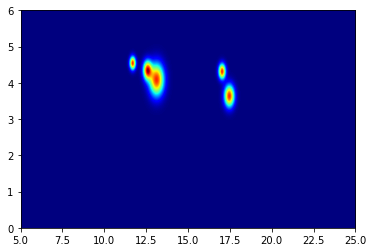

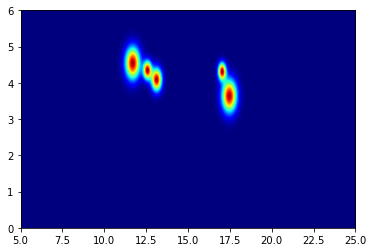

In [7]:
#@title

!git clone https://github.com/cavalcante-lucas/GCxGCSimbDL.git

import markdown
from ipywidgets import widgets, HBox, VBox, Dropdown, HTML
from IPython.display import display, clear_output
import pandas as pd
import sys
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
from numpy.linalg import norm
from scipy.spatial import ConvexHull
from tensorflow import keras


model_1d=keras.models.load_model('GCxGCSimbDL/modelo_rmsprop_09032-200ep-13-4-21')
model_2d=keras.models.load_model('GCxGCSimbDL/modelo_t2d_adam_swish07712-200ep-21-4-21')

#Global features
marker=1
con=False
pha_1='Helium (He)'
pha_2='Helium (He)'
pha_3='Helium (He)'
pha_4='Helium (He)'

out = widgets.Output()

# Upload buttons - selection
up1d = widgets.FileUpload(accept="", multiple=False,description='Upload 1D')
up2d = widgets.FileUpload(accept="", multiple=False,description='Upload 2D')

#Dropdown counter for number of analytes
option_list = (1,2,3,4,5,6,7,8,9,10)
    
number= Dropdown(
    options=option_list,
    value=1,
    description='Analyte No.:'
)

number.value = marker

def drop_number(change):
        global marker
        marker=change['new']

number.observe(drop_number, names='value')


#Checkbox for toggle same instrumental conditions

checkbox_cond=widgets.Checkbox(
    value=con,
    description='Toggle to same experimental conditions',
    disabled=False,
    indent=False
)

def conditions(cond):
        global con
        con=cond['new']

checkbox_cond.observe(conditions, names='value')

#Dummy Checkbox

checkbox_dummy=widgets.Checkbox(
    value=True,
    description='Toggle to same experimental conditions',
    disabled=True,
    indent=False
)


#####1#####

#Analytes
label=widgets.Text(description='Analyte label')
logp=widgets.Text(description='logKow')
bp=widgets.Text(description='Boiling p. (°C)')
mw=widgets.Text(description='Mol. w. (Da)')

#column and equipament configuration

#1D Column McReynold's indices
x1d = widgets.Text(description="x'")
y1d = widgets.Text(description="y'")
z1d = widgets.Text(description="z'")
u1d = widgets.Text(description="u'")
s1d = widgets.Text(description="s'")

#2D Column McReynold's indices
x2d = widgets.Text(description="x'")
y2d = widgets.Text(description="y'")
z2d = widgets.Text(description="z'")
u2d = widgets.Text(description="u'")
s2d = widgets.Text(description="s'")

d1mMW=widgets.Text(description='Monomer (Da)')
d2mMW=widgets.Text(description='Monomer (Da)')
pm=widgets.Text(description='Mod. period (s)')
l1d=widgets.Text(description='1D lenght (m)')
id1d=widgets.Text(description='1D ID (mm)')
pe1d=widgets.Text(description='1D phase (um)')
l2d=widgets.Text(description='2D lenght (m)')
id2d=widgets.Text(description='2D ID (mm)')
pe2d=widgets.Text(description='2D phase (um)')
flow=widgets.Text(description='Flow (mL/min)')

mob_phase=widgets.RadioButtons(
    options=['Helium (He)', 'Hydrogen (H)'],
    description='Mobile phase:',
    value='Helium (He)',
    disabled=False
)

#Mobile phase radio button function
def mobile_phase(phase):
        global pha_1
        pha_1=phase['new']

mob_phase.observe(mobile_phase, names='value')


#Oven configurations
t1d1=widgets.Text(description='1D T1 (°C)')
t1d2=widgets.Text(description='1D T2 (°C)')
t1d3=widgets.Text(description='1D T3 (°C)')
t1d4=widgets.Text(description='1D T4 (°C)')
t1d5=widgets.Text(description='1D T5 (°C)')
a1d1=widgets.Text(description='1D H1 (°C/min)')
a1d2=widgets.Text(description='1D H2 (°C/min)')
a1d3=widgets.Text(description='1D H3 (°C/min)')
a1d4=widgets.Text(description='1D H4 (°C/min)')
t2d1=widgets.Text(description='2D T1 (°C)')
t2d2=widgets.Text(description='2D T2 (°C)')
t2d3=widgets.Text(description='2D T3 (°C)')
t2d4=widgets.Text(description='2D T4 (°C)')
t2d5=widgets.Text(description='2D T5 (°C)')
a2d1=widgets.Text(description='2D H1 (°C/min)')
a2d2=widgets.Text(description='2D H2 (°C/min)')
a2d3=widgets.Text(description='2D H3 (°C/min)')
a2d4=widgets.Text(description='2D H4 (°C/min)')

#####1 END#####

#####2#####
#Analytes (2)
label_2=widgets.Text(description='Analyte label')
logp_2=widgets.Text(description='logKow')
bp_2=widgets.Text(description='Boiling p. (°C)')
mw_2=widgets.Text(description='Mol. w. (Da)')

#1D Column McReynold's indices (2)
x1d_2 = widgets.Text(description="x'")
y1d_2 = widgets.Text(description="y'")
z1d_2 = widgets.Text(description="z'")
u1d_2 = widgets.Text(description="u'")
s1d_2 = widgets.Text(description="s'")

#2D Column McReynold's indices (2)
x2d_2 = widgets.Text(description="x'")
y2d_2 = widgets.Text(description="y'")
z2d_2 = widgets.Text(description="z'")
u2d_2 = widgets.Text(description="u'")
s2d_2 = widgets.Text(description="s'")

#Other column params 
d1mMW_2=widgets.Text(description='Monomer (Da)')
d2mMW_2=widgets.Text(description='Monomer (Da)')
pm_2=widgets.Text(description='Mod. period (s)')
l1d_2=widgets.Text(description='1D lenght (m)')
id1d_2=widgets.Text(description='1D ID (mm)')
pe1d_2=widgets.Text(description='1D phase (um)')
l2d_2=widgets.Text(description='2D lenght (m)')
id2d_2=widgets.Text(description='2D ID (mm)')
pe2d_2=widgets.Text(description='2D phase (um)')
flow_2=widgets.Text(description='Flow (mL/min)')

mob_phase_2=widgets.RadioButtons(
    options=['Helium (He)', 'Hydrogen (H)'],
    description='Mobile phase:',
    value='Helium (He)',
    disabled=False
)

#Mobile phase radio button function (2)
def mobile_phase_2(phase_2):
        global pha_2
        pha_2=phase_2['new']

mob_phase_2.observe(mobile_phase_2, names='value')

#Oven configurations (2)
t1d1_2=widgets.Text(description='1D T1 (°C)')
t1d2_2=widgets.Text(description='1D T2 (°C)')
t1d3_2=widgets.Text(description='1D T3 (°C)')
t1d4_2=widgets.Text(description='1D T4 (°C)')
t1d5_2=widgets.Text(description='1D T5 (°C)')
a1d2_2=widgets.Text(description='1D H2 (°C/min)')
a1d3_2=widgets.Text(description='1D H3 (°C/min)')
a1d4_2=widgets.Text(description='1D H4 (°C/min)')
t2d1_2=widgets.Text(description='2D T1 (°C)')
t2d2_2=widgets.Text(description='2D T2 (°C)')
t2d3_2=widgets.Text(description='2D T3 (°C)')
t2d4_2=widgets.Text(description='2D T4 (°C)')
t2d5_2=widgets.Text(description='2D T5 (°C)')
a2d2_2=widgets.Text(description='2D H2 (°C/min)')
a2d3_2=widgets.Text(description='2D H3 (°C/min)')
a2d4_2=widgets.Text(description='2D H4 (°C/min)')

#####2 END#####

####3 Start####

#Analytes (3)
label_3=widgets.Text(description='Analyte label')
logp_3=widgets.Text(description='logKow')
bp_3=widgets.Text(description='Boiling p. (°C)')
mw_3=widgets.Text(description='Mol. w. (Da)')

#1D Column McReynold's indices (3)
x1d_3 = widgets.Text(description="x'")
y1d_3 = widgets.Text(description="y'")
z1d_3 = widgets.Text(description="z'")
u1d_3 = widgets.Text(description="u'")
s1d_3 = widgets.Text(description="s'")

#2D Column McReynold's indices (3)
x2d_3 = widgets.Text(description="x'")
y2d_3 = widgets.Text(description="y'")
z2d_3 = widgets.Text(description="z'")
u2d_3 = widgets.Text(description="u'")
s2d_3 = widgets.Text(description="s'")

#Other column params 
d1mMW_3=widgets.Text(description='Monomer (Da)')
d2mMW_3=widgets.Text(description='Monomer (Da)')
pm_3=widgets.Text(description='Mod. period (s)')
l1d_3=widgets.Text(description='1D lenght (m)')
id1d_3=widgets.Text(description='1D ID (mm)')
pe1d_3=widgets.Text(description='1D phase (um)')
l2d_3=widgets.Text(description='2D lenght (m)')
id2d_3=widgets.Text(description='2D ID (mm)')
pe2d_3=widgets.Text(description='2D phase (um)')
flow_3=widgets.Text(description='Flow (mL/min)')

mob_phase_3=widgets.RadioButtons(
    options=['Helium (He)', 'Hydrogen (H)'],
    description='Mobile phase:',
    value='Helium (He)',
    disabled=False
)

#Mobile phase radio button function (3)
def mobile_phase_3(phase_3):
        global pha_3
        pha_3=phase_3['new']

mob_phase_3.observe(mobile_phase_3, names='value')

#Oven configurations (3)
t1d1_3=widgets.Text(description='1D T1 (°C)')
t1d2_3=widgets.Text(description='1D T2 (°C)')
t1d3_3=widgets.Text(description='1D T3 (°C)')
t1d4_3=widgets.Text(description='1D T4 (°C)')
t1d5_3=widgets.Text(description='1D T5 (°C)')
a1d2_3=widgets.Text(description='1D H2 (°C/min)')
a1d3_3=widgets.Text(description='1D H3 (°C/min)')
a1d4_3=widgets.Text(description='1D H4 (°C/min)')
t2d1_3=widgets.Text(description='2D T1 (°C)')
t2d2_3=widgets.Text(description='2D T2 (°C)')
t2d3_3=widgets.Text(description='2D T3 (°C)')
t2d4_3=widgets.Text(description='2D T4 (°C)')
t2d5_3=widgets.Text(description='2D T5 (°C)')
a2d2_3=widgets.Text(description='2D H2 (°C/min)')
a2d3_3=widgets.Text(description='2D H3 (°C/min)')
a2d4_3=widgets.Text(description='2D H4 (°C/min)')


####3 END####

####4 Start####

#Analytes (4)
label_4=widgets.Text(description='Analyte label')
logp_4=widgets.Text(description='logKow')
bp_4=widgets.Text(description='Boiling p. (°C)')
mw_4=widgets.Text(description='Mol. w. (Da)')

#1D Column McReynold's indices (4)
x1d_4 = widgets.Text(description="x'")
y1d_4 = widgets.Text(description="y'")
z1d_4 = widgets.Text(description="z'")
u1d_4 = widgets.Text(description="u'")
s1d_4 = widgets.Text(description="s'")

#2D Column McReynold's indices (4)
x2d_4 = widgets.Text(description="x'")
y2d_4 = widgets.Text(description="y'")
z2d_4 = widgets.Text(description="z'")
u2d_4 = widgets.Text(description="u'")
s2d_4 = widgets.Text(description="s'")

#Other column params 
d1mMW_4=widgets.Text(description='Monomer (Da)')
d2mMW_4=widgets.Text(description='Monomer (Da)')
pm_4=widgets.Text(description='Mod. period (s)')
l1d_4=widgets.Text(description='1D lenght (m)')
id1d_4=widgets.Text(description='1D ID (mm)')
pe1d_4=widgets.Text(description='1D phase (um)')
l2d_4=widgets.Text(description='2D lenght (m)')
id2d_4=widgets.Text(description='2D ID (mm)')
pe2d_4=widgets.Text(description='2D phase (um)')
flow_4=widgets.Text(description='Flow (mL/min)')

mob_phase_4=widgets.RadioButtons(
    options=['Helium (He)', 'Hydrogen (H)'],
    description='Mobile phase:',
    value='Helium (He)',
    disabled=False
)

#Mobile phase radio button function (4)
def mobile_phase_4(phase_4):
        global pha_4
        pha_4=phase_4['new']

mob_phase_4.observe(mobile_phase_4, names='value')

#Oven configurations (4)
t1d1_4=widgets.Text(description='1D T1 (°C)')
t1d2_4=widgets.Text(description='1D T2 (°C)')
t1d3_4=widgets.Text(description='1D T3 (°C)')
t1d4_4=widgets.Text(description='1D T4 (°C)')
t1d5_4=widgets.Text(description='1D T5 (°C)')
a1d2_4=widgets.Text(description='1D H2 (°C/min)')
a1d3_4=widgets.Text(description='1D H3 (°C/min)')
a1d4_4=widgets.Text(description='1D H4 (°C/min)')
t2d1_4=widgets.Text(description='2D T1 (°C)')
t2d2_4=widgets.Text(description='2D T2 (°C)')
t2d3_4=widgets.Text(description='2D T3 (°C)')
t2d4_4=widgets.Text(description='2D T4 (°C)')
t2d5_4=widgets.Text(description='2D T5 (°C)')
a2d2_4=widgets.Text(description='2D H2 (°C/min)')
a2d3_4=widgets.Text(description='2D H3 (°C/min)')
a2d4_4=widgets.Text(description='2D H4 (°C/min)')


####4 END####

####5 Start####

#Analytes (5)
label_5=widgets.Text(description='Analyte label')
logp_5=widgets.Text(description='logKow')
bp_5=widgets.Text(description='Boiling p. (°C)')
mw_5=widgets.Text(description='Mol. w. (Da)')

####5 END####

####6 Start####

#Analytes (6)
label_6=widgets.Text(description='Analyte label')
logp_6=widgets.Text(description='logKow')
bp_6=widgets.Text(description='Boiling p. (°C)')
mw_6=widgets.Text(description='Mol. w. (Da)')

####6 END####

####7 Start####

#Analytes (7)
label_7=widgets.Text(description='Analyte label')
logp_7=widgets.Text(description='logKow')
bp_7=widgets.Text(description='Boiling p. (°C)')
mw_7=widgets.Text(description='Mol. w. (Da)')

####7 END####

####8 Start####

#Analytes (8)
label_8=widgets.Text(description='Analyte label')
logp_8=widgets.Text(description='logKow')
bp_8=widgets.Text(description='Boiling p. (°C)')
mw_8=widgets.Text(description='Mol. w. (Da)')

####8 END####

####9 Start####

#Analytes (9)
label_9=widgets.Text(description='Analyte label')
logp_9=widgets.Text(description='logKow')
bp_9=widgets.Text(description='Boiling p. (°C)')
mw_9=widgets.Text(description='Mol. w. (Da)')

####9 END####

####10 Start####

#Analytes (10)
label_10=widgets.Text(description='Analyte label')
logp_10=widgets.Text(description='logKow')
bp_10=widgets.Text(description='Boiling p. (°C)')
mw_10=widgets.Text(description='Mol. w. (Da)')

####10 END####


#Buttons refresh, generate, help, display,up, run and export_plot
botao = widgets.Button(description="Generate Matrices",icon='table')
botao.add_class("left-spacing-class")
display(HTML(
     "<style>.left-spacing-class {margin-left: 10px;}</style>"
))
botao_ref = widgets.Button(description="Refresh",icon='refresh')
botao_help = widgets.Button(
    description='Help',
    disabled=False,
    tooltip='Help',
    icon='question-circle-o'
)
botao_display = widgets.Button(description="Display Matrices",icon='television')
botao_exp = widgets.Button(description="Export CSV",icon='upload')
botao_run = widgets.Button(description="Run Simulation/Refresh plot",icon='play')



#markdowns
text_a = markdown.markdown("Mcreynolds Indices and monomer molecular weight for 1D column:&emsp;")
text_b = markdown.markdown("Mcreynolds Indices and monomer molecular weight for 2D column:")
spacer=markdown.markdown("<h3></h3>")

help_header = markdown.markdown("<h1>About Mcreynolds Indices</h1>")
help_text_1 = markdown.markdown("McReynolds values provide a systematic approach to ranking GC stationary phases by polarity and simplify the task of cross-comparing phases to determine whether they are equivalent. They also are useful for predicting elution orders among related analytes and resolution of analytes from differing chemical families. Values are obtained by measuring the degree to which a phase retains several probe compounds, relative to their retention by a nonpolar phase (squalane).")
help_text_2 = markdown.markdown("McReynolds analyzed 68 compounds on 25 columns and selected the 10 probes that best characterized the columns. The most informative of these, benzene, n-butanol, 2-pentanone, nitropropane, and pyridine (x', y', z', u' and s' respectively), are the same homologs of Rohrschneider’s probes.")
help_text_3 = markdown.markdown("<h3>Examples:</h3>")

table = """
Column Type&emsp;          | x'&emsp;  | y' &emsp;  | z'&emsp;   |u'&emsp;    |s'&emsp;    | Monomer molecular Weight (Da)|
---------------------|-----|------|------|------|------|------|
HP-1 or similars&emsp;     | 4   &emsp;| 58&emsp;   | 43&emsp;   | 56&emsp;   | 38&emsp;   | &emsp;&emsp;74&emsp; |
DB-5 or similars&emsp;     | 19 &emsp; | 74&emsp;   | 64&emsp;   | 93&emsp;   | 62&emsp;   |&emsp;&emsp;80.2&emsp; |
BPX5 or similars&emsp;     | 30  &emsp;| 72&emsp;   | 62&emsp;   | 96&emsp;   | 65&emsp;   |&emsp;&emsp;204.4&emsp; |
BPX50 or similars&emsp;    | 125 &emsp;| 175&emsp;  | 183&emsp;  | 268&emsp;  | 220&emsp;  |&emsp;&emsp;172&emsp; |
TRB-624 or similars&emsp;  | 40 &emsp; | 125&emsp;  | 106&emsp;  | 160&emsp;  | 96&emsp;   |&emsp;&emsp;80.9&emsp; |
BP-20 or similars&emsp;    | 305 &emsp;| 551&emsp;  | 360&emsp;  | 562&emsp;  | 484&emsp;  | &emsp;&emsp;44&emsp; |
Rtx-200 or similars&emsp;  | 154 &emsp;| 245&emsp;  | 376&emsp;  | 490&emsp;  | 331&emsp;  | &emsp;&emsp;156&emsp; |
SLB-IL 59&emsp;            | 352 &emsp;| 544&emsp;  | 554&emsp;  | 683&emsp;  | 627&emsp;  | &emsp;&emsp;1048&emsp;|

"""

tabela= markdown.markdown(table ,extensions=['tables'])

### Import tab widgets ###
# Delimitador
delim = widgets.RadioButtons(
    options=[';', ',', ' '],
    description='Delimiter: ',
    disabled=False)

# Separador Decimal 
decimal = widgets.RadioButtons(
    options=['.', ','],
    description='Decimal sep.: ',
    disabled=False)

# Index? 
ind = widgets.RadioButtons(
    options=['False', 'True'],
    description='Index? ',
    disabled=False)

#Pular linhas
rows = widgets.IntSlider(
    value=0,
    step=1,
    description='# of lines:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d')

# Botão upload 1D
button_upload_1d = widgets.Button(
    description='Import 1D',
    disabled=False,
    tooltip='Click to Upload',
    icon='check')

# Botão upload 2D
button_upload_2d = widgets.Button(
    description='Import 2D',
    disabled=False,
    tooltip='Click to Upload',
    icon='check')


# Botão preview
button_preview = widgets.Button(
    description='Preview',
    disabled=False,
    tooltip='Click to Preview',
    icon='search')

# Botões para visualização da matriz
toggle = widgets.ToggleButtons(
    options=['Info', 'Distribution'],
    description='Options',
    disabled=False,
    icons=['info-circle', 'sort-amount-desc'])

### Import tab widgets END###

###Plotter tab widgets start###

start_1d=widgets.Text(description='1D Start (min)')
end_1d=widgets.Text(description='1D End (min)')
label_1d=widgets.Text(description='1D label')
start_2d=widgets.Text(description='2D Start (s)')
end_2d=widgets.Text(description='2D End (s)')
label_2d=widgets.Text(description='2D label')

colormap=widgets.Dropdown(
    options=['jet','viridis','plasma','inferno','magma','cividis','Greys','Blues','Oranges','PuRd','YiGnBu',
              'binary','cool','hot','afmhot','PuOr','Spectral','seismic','twilight','hsv','ocean','gist_earth',
              'terrain','gist_stern','gnuplot','gnuplot2','cubehelix','nipy_spectral','gist_ncar'],
    description='Colormap',
    disabled=False)

colorpick=widgets.ColorPicker(
    concise=False,
    description='Fontcolor',
    disabled=False)

colorpick_2=widgets.ColorPicker(
    concise=False,
    description='Linecolor',
    disabled=False)

line_slider=widgets.FloatSlider(
    min=0.5,
    max=10.0,
    step=0.5,
    description='LineWidth (px)',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f')

chull_check=widgets.Checkbox(
    description='ConvexHull',
    disabled=False,
    indent=True)

export_box=widgets.Checkbox(
    description='Export graph',
    disabled=False,
    indent=True
)


###Plotter tab widgets END###

#positions (1)
s=HBox([number,botao_ref])
a = HBox([checkbox_cond])
a_dum = HBox([checkbox_dummy])
b=VBox([label,logp, bp, mw])
c=VBox([pm,l1d,id1d,pe1d,l2d,flow])
cb=VBox([mob_phase])
cd = VBox([HTML(text_a),HTML(spacer),x1d,y1d,z1d,u1d,s1d,d1mMW,botao_help])
ce = VBox([HTML(text_b),HTML(spacer),x2d,y2d,z2d,u2d,s2d,d2mMW])
d=VBox([t1d1,t1d2,t1d3,t1d4,t1d5])
e=VBox([a1d1,a1d2,a1d3,a1d4])
f=VBox([t2d1,t2d2,t2d3,t2d4,t2d5])
g=VBox([a2d1,a2d2,a2d3,a2d4])

inputs_a=HBox([c,cb])
inputs_b=HBox([d,e])
inputs_c=HBox([f,g])
inputs_d=HBox([cd,ce])

#Home page 
buttons=HBox([botao,botao_display,botao_exp])
home=VBox([s,a,buttons,out])

#Home page with dummy checkbox
home_dum=VBox([s,a_dum,buttons,out])


#Analyte #1 page
acc_1 = widgets.Accordion(children=[b, inputs_a,inputs_d,inputs_b,inputs_c])
                          
acc_1.set_title(0, 'Analyte properties')
acc_1.set_title(1, 'General parameters')
acc_1.set_title(2, 'Column characteristics')
acc_1.set_title(3, 'Primary oven conditions')
acc_1.set_title(4, 'Secondary oven conditions')

#General params tab
general = widgets.Accordion(children=[inputs_a,inputs_d,inputs_b,inputs_c])
                          
general.set_title(0, 'General parameters')
general.set_title(1, 'Column characteristics')
general.set_title(2, 'Primary oven conditions')
general.set_title(3, 'Secondary oven conditions')

#Plotter tab 
text_hull = markdown.markdown("Evaluation of effective chromatographic area:&emsp;")
column_1=VBox([colorpick,start_1d,end_1d,label_1d])
column_2=VBox([colormap,start_2d,end_2d,label_2d,HBox([botao_run,export_box])])
column_3=VBox([HTML(text_hull),VBox([chull_check,colorpick_2,line_slider])])
plotter_box=HBox([column_1,column_2,column_3])
plot_child=VBox([plotter_box,out])
plotter_acc=widgets.Accordion(children=[plot_child])
plotter_acc.set_title(0,'Prediction, Plots and QC')

#Set help page for McReynolds indices
help_page = VBox([HTML(help_header),HTML(help_text_1),HTML(help_text_2),
                  HTML(help_text_3),HTML(tabela)])

####Positions (1) END####


#positions (2)
b_2=VBox([label_2,logp_2, bp_2, mw_2])
c_2=VBox([pm_2,l1d_2,id1d_2,pe1d_2,l2d_2,flow_2])
cb_2=cb=VBox([mob_phase_2])
cd_2 = VBox([HTML(text_a),HTML(spacer),x1d_2,y1d_2,z1d_2,u1d_2,s1d_2,d1mMW_2,botao_help])
ce_2 = VBox([HTML(text_b),HTML(spacer),x2d_2,y2d_2,z2d_2,u2d_2,s2d_2,d2mMW_2])
d_2=VBox([t1d1_2,t1d2_2,t1d3_2,t1d4_2,t1d5_2])
e_2=VBox([a1d1,a1d2_2,a1d3_2,a1d4_2])
f_2=VBox([t2d1_2,t2d2_2,t2d3_2,t2d4_2,t2d5_2])
g_2=VBox([a2d1,a2d2_2,a2d3_2,a2d4_2])
inputsa_2=HBox([b_2,c_2,cb_2])
inputsb_2=HBox([b_2])
inputs_2=HBox([d_2,e_2,f_2,g_2])

inputs_a_2=HBox([c_2,cb_2])
inputs_b_2=HBox([d_2,e_2])
inputs_c_2=HBox([f_2,g_2])
inputs_d_2=HBox([cd_2,ce_2])

#page Analyte #2
acc_2 = widgets.Accordion(children=[b_2, inputs_a_2,inputs_d_2,inputs_b_2,inputs_c_2])

acc_2.set_title(0, 'Analyte properties')
acc_2.set_title(1, 'General parameters')
acc_2.set_title(2, 'Column characteristics')
acc_2.set_title(3, 'Primary oven conditions')
acc_2.set_title(4, 'Secondary oven conditions')


####Positions (2) END####

#positions (3)
b_3=VBox([label_3,logp_3, bp_3, mw_3])
c_3=VBox([pm_3,l1d_3,id1d_3,pe1d_3,l2d_3,flow_3])
cb_3=VBox([mob_phase_3])
cd_3 = VBox([HTML(text_a),HTML(spacer),x1d_3,y1d_3,z1d_3,u1d_3,s1d_3,d1mMW_3,botao_help])
ce_3 = VBox([HTML(text_b),HTML(spacer),x2d_3,y2d_3,z2d_3,u2d_3,s2d_3,d2mMW_3])
d_3=VBox([t1d1_3,t1d2_3,t1d3_3,t1d4_3,t1d5_3])
e_3=VBox([a1d1,a1d2_3,a1d3_3,a1d4_3])
f_3=VBox([t2d1_3,t2d2_3,t2d3_3,t2d4_3,t2d5_3])
g_3=VBox([a2d1,a2d2_3,a2d3_3,a2d4_3])
inputsa_3=HBox([b_3,c_3,cb_3])
inputsb_3=HBox([b_3])
inputs_3=HBox([d_3,e_3,f_3,g_3])

inputs_a_3=HBox([c_3,cb_3])
inputs_b_3=HBox([d_3,e_3])
inputs_c_3=HBox([f_3,g_3])
inputs_d_3=HBox([cd_3,ce_3])

#page Analyte #3
acc_3 = widgets.Accordion(children=[b_3, inputs_a_3,inputs_d_3,inputs_b_3,inputs_c_3])

acc_3.set_title(0, 'Analyte properties')
acc_3.set_title(1, 'General parameters')
acc_3.set_title(2, 'Column characteristics')
acc_3.set_title(3, 'Primary oven conditions')
acc_3.set_title(4, 'Secondary oven conditions')

####Positions (3) END####

#positions (4)
b_4=VBox([label_4,logp_4, bp_4, mw_4])
c_4=VBox([pm_4,l1d_4,id1d_4,pe1d_4,l2d_4,flow_4])
cb_4=VBox([mob_phase_4])
cd_4 = VBox([HTML(text_a),HTML(spacer),x1d_4,y1d_4,z1d_4,u1d_4,s1d_4,d1mMW_4,botao_help])
ce_4 = VBox([HTML(text_b),HTML(spacer),x2d_4,y2d_4,z2d_4,u2d_4,s2d_4,d2mMW_4])
d_4=VBox([t1d1_4,t1d2_4,t1d3_4,t1d4_4,t1d5_4])
e_4=VBox([a1d1,a1d2_4,a1d3_4,a1d4_4])
f_4=VBox([t2d1_4,t2d2_4,t2d3_4,t2d4_4,t2d5_4])
g_4=VBox([a2d1,a2d2_4,a2d3_4,a2d4_4])
inputsa_4=HBox([b_4,c_4,cb_4])
inputsb_4=HBox([b_4])
inputs_4=HBox([d_4,e_4,f_4,g_4])

inputs_a_4=HBox([c_4,cb_4])
inputs_b_4=HBox([d_4,e_4])
inputs_c_4=HBox([f_4,g_4])
inputs_d_4=HBox([cd_4,ce_4])

#page Analyte #4
acc_4 = widgets.Accordion(children=[b_4, inputs_a_4,inputs_d_4,inputs_b_4,inputs_c_4])

acc_4.set_title(0, 'Analyte properties')
acc_4.set_title(1, 'General parameters')
acc_4.set_title(2, 'Column characteristics')
acc_4.set_title(3, 'Primary oven conditions')
acc_4.set_title(4, 'Secondary oven conditions')

####Positions (4) END####

#positions (5)
b_5=VBox([label_5,logp_5, bp_5, mw_5])

#positions (6)
b_6=VBox([label_6,logp_6, bp_6, mw_6])

#positions (7)
b_7=VBox([label_7,logp_7, bp_7, mw_7])

#positions (8)
b_8=VBox([label_8,logp_8, bp_8, mw_8])

#positions (9)
b_9=VBox([label_9,logp_9, bp_9, mw_9])

#positions (10)
b_10=VBox([label_10,logp_10, bp_10, mw_10])

#Accordion import tab
acc_imp = widgets.Accordion(children=[HBox([up1d,up2d]), widgets.VBox([delim,decimal,ind]), rows,toggle])
acc_imp.set_title(0, 'File Selection')
acc_imp.set_title(1, 'Table Elements')
acc_imp.set_title(2, 'Skip Rows')
acc_imp.set_title(3, 'Info & Descriptive analysis')
acc_imp_box = widgets.VBox([acc_imp, widgets.HBox([button_preview, button_upload_1d,button_upload_2d]),out])

###Dataframe Column names###

col1D = ['logP', 'BP', 'MW', '1DmMW', '1Dx', '1Dy','1Dz', '1Du', '1Ds','L1D','1DRatio', 
         'Flow','GV1DT1','GV1DT2','GV1DT3','GV1DT4','GV1DT5','GV1DRT', 'A1D2', 'A1D3', 'A1D4']

col2D =['logP', 'BP', 'MW', '2DmMW', '2Dx', '2Dy','2Dz','2Du','2Ds','PM','L2D','Flow',
          'GV2DT1','GV2DT2','GV2DT3','GV2DT4','GV2DT5','GV2DRT','A2D2','A2D3','A2D4'] 



#global functions

#### Gas viscosities ####

def viscosity_He(temperature_a):
    TK_a = temperature_a + 273.15
    NHe = (((-2.01786*10**-10)*(TK_a**2))+(((5.88964*10**-7)*TK_a)+4.13*10**-5))
    return NHe

def viscosity_H(temperature_b):
    TK_b = temperature_b + 273.15
    NH = (((-1.08929*10**-10)*(TK_b**2))+(((2.77964*10**-7)*TK_b)+1.59*10**-5))
    return NH

#### Mean temperature ####

def temp_mean(t1,t2):
    mean=(t1+t2)/2
    return mean

#### Column Ratio ####

def column_ratio(idd,pe):
    ratio = (idd/(4*pe*0.001))
    return ratio

### Import functions start###

# Função upload (1)
def content_parser():
    if up1d.value == {}:
        with out:
            print('No CSV loaded')    
    else:
        typ, content = "", ""
        up_value = up1d.value
        for i in up_value.keys():
            typ = up_value[i]["metadata"]["type"]
            if typ == "text/csv":
              content = up_value[i]["content"]
              content_str = str(content, 'utf-8')
            if content_str != "":
                str_io = StringIO(content_str) 
                return str_io

# Função upload (2)
def content_parser_2():
    if up2d.value == {}:
        with out:
            print('No CSV loaded')    
    else:
        typ2, content2 = "", ""
        up_value2 = up2d.value
        for i in up_value2.keys():
            typ2 = up_value2[i]["metadata"]["type"]
            if typ2 == "text/csv":
              content2 = up_value2[i]["content"]
              content_str2 = str(content2, 'utf-8')
            if content_str2 != "":
                str_io2 = StringIO(content_str2) 
                return str_io2


# Função definição de dataframe(1)
def df_converter():
    content = content_parser()
    if content is not None:
        global matrix_1D
        if ind.value == 'False':
          matrix_1D = pd.read_csv(content, sep=delim.value, decimal=decimal.value,index_col=False, skiprows=rows.value) 
        else:
          matrix_1D = pd.read_csv(content, sep=delim.value, decimal=decimal.value,index_col=0, skiprows=rows.value) 
        return matrix_1D
    else:
        return None

# Função definição de dataframe(2)
def df_converter_2():
    content2 = content_parser_2()
    if content2 is not None:
        global matrix_2D
        if ind.value == 'False':
          matrix_2D = pd.read_csv(content2, sep=delim.value, decimal=decimal.value,index_col=False, skiprows=rows.value)
        else:
           matrix_2D = pd.read_csv(content2, sep=delim.value, decimal=decimal.value,index_col=0, skiprows=rows.value)
        return matrix_2D
    else:
        return None


#Função preview
def preview():
    matrix_1D = df_converter()
    matrix_2D = df_converter_2()
    with out:
        out.clear_output()
        print('\n VIWER  \n')
        if matrix_1D is not None and matrix_2D is None:
            print('First dimension Matrix (10 first cases):\n')
            print(matrix_1D.head(10))
            print('Warning: Matrix 2D is missing.\n')
        elif matrix_2D is not None and matrix_1D is None:
            print('Warning: Matrix 1D is missing.\n')
            print('\n Second dimension Matrix (10 first cases):\n')
            print(matrix_2D.head(10))
        elif matrix_1D is not None and matrix_2D is not None:
            print('First dimension Matrix (10 first cases):\n')
            print(matrix_1D.head(10))
            print('\n Second dimension Matrix (10 first cases):\n')
            print(matrix_2D.head(10))
        else:
            print('Warning: Something is wrong or missing.')

# Função import final(1)
def upload():
    matrix_1D = df_converter()
    with out:
        out.clear_output()
        print('\n First dimension matrix: \n')
        if matrix_1D is not None:
            print(matrix_1D)
        else:
            print('Some configuration is wrong or missing. Check the uploaded files and reboot the program.')

# Função import final(2)
def upload2():
    matrix_2D = df_converter_2()
    with out:
        out.clear_output()
        print('\n Second dimension matrix: \n')
        if matrix_2D is not None:
            print(matrix_2D)
        else:
            print('Some configuration is wrong or missing. Check the uploaded files and reboot the program.')


def desc():
    info_level = toggle.value
    if info_level != {}:
        matrix_1D = df_converter()
        matrix_2D = df_converter_2()
        with out:
            out.clear_output()
            print('\n SELECTED: {}\n'.format(
                info_level))
            if matrix_1D is not None and matrix_2D is not None:
                if info_level == 'Info':
                    print('\n Matrix 1D info: \n')
                    print(matrix_1D.info(verbose=True))
                    print('\n Matrix 2D info: \n')
                    print(matrix_2D.info(verbose=True))
                elif info_level == 'Distribution':
                    print('\n Matrix 1D discriptive parameters: \n')
                    print(matrix_1D.describe())
                    print('\n Matrix 2D discriptive parameters: \n')
                    print(matrix_2D.describe())
                else:
                    print('Some configuration is wrong or missing. Please check the uploaded files.')

#Função export CSV
def export(a):
  try:
    matrix_2D 
  except NameError:
    print('One or more matrices are not defined.')
  else:
  
    if matrix_1D is not None and matrix_2D is not None:
      print('Exported!')
      matrix_1D.to_csv('matrix_1D.csv', index=0)
      matrix_2D.to_csv('matrix_2D.csv', index=0)
      files.download('matrix_1D.csv')
      files.download('matrix_2D.csv')
    else:
      print('Something is wrong or missing. Please check the uploaded/generated matrices.')

#Preview matrices in home tab
def display_mats(a):
  print('\n VIWER  \n')
  if matrix_1D is not None and matrix_2D is None:
    print('First dimension Matrix (10 first cases):\n')
    print(matrix_1D.head(10))
    print('Warning: Matrix 2D is missing.\n')
  elif matrix_2D is not None and matrix_1D is None:
    print('Warning: Matrix 1D is missing.\n')
    print('\n Second dimension Matrix (10 first cases):\n')
    print(matrix_2D.head(10))
  elif matrix_1D is not None and matrix_2D is not None:
    print('First dimension Matrix (10 first cases):\n')
    print(matrix_1D.head(10))
    print('\n Second dimension Matrix (10 first cases):\n')
    print(matrix_2D.head(10))
  else:
    print('Warning: Something is wrong or missing.')


def preview_clicked(b):
    preview()

def upload_clicked(b):
    upload()

def upload_clicked2(b):
    upload2()    

def desc_clicked(b):
    desc()
                    
###Import functions END###


#### Start Sender ####

def simulador(sender):
    
    global matrix_1D
    global matrix_2D
    global labels
    
    if marker == 1 and pha_1 == 'Helium (He)':
                       
        
###Matrix (1,0,-) START###
        labels = [[str(label.value if label.value else 'Substance_1')]]
                
        matrix_1D={'logP':[float(logp.value if logp.value else 0)], 
                'BP':[float(bp.value if bp.value else 0)], 
                'MW':[float(mw.value if mw.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1))],
                'Flow':[float(flow.value if flow.value else 0)], 
                'GV1DT1':[viscosity_He(float(t1d1.value if t1d1.value else 0))], 
                'GV1DT2':[viscosity_He(float(t1d2.value if t1d2.value else 0))], 
                'GV1DT3':[viscosity_He(float(t1d3.value if t1d3.value else 0))], 
                'GV1DT4':[viscosity_He(float(t1d4.value if t1d4.value else 0))], 
                'GV1DT5':[viscosity_He(float(t1d5.value if t1d5.value else 0))],
                'GV1DRT':[viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0)], 
                'BP':[float(bp.value if bp.value else 0)], 
                'MW':[float(mw.value if mw.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0)],
                'PM':[float(pm.value if pm.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0)],
                'Flow':[float(flow.value if flow.value else 0)],
                'GV2DT1':[viscosity_He(float(t2d1.value if t2d1.value else 0))], 
                'GV2DT2':[viscosity_He(float(t2d2.value if t2d2.value else 0))], 
                'GV2DT3':[viscosity_He(float(t2d3.value if t2d3.value else 0))], 
                'GV2DT4':[viscosity_He(float(t2d4.value if t2d4.value else 0))], 
                'GV2DT5':[viscosity_He(float(t2d5.value if t2d5.value else 0))],
                'GV2DRT':[viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)
        
    
        
        
##Matrix (1,0,-) END##
    
    
##Matrix (1,1,-) Start##
        
    elif marker == 1 and pha_1 == 'Hydrogen (H)':
        
        labels = [[str(label.value if label.value else 'Substance_1')]] 
        
        matrix_1D={'logP':[float(logp.value if logp.value else 0)], 
                'BP':[float(bp.value if bp.value else 0)], 
                'MW':[float(mw.value if mw.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1))],
                'Flow':[float(flow.value if flow.value else 0)], 
                'GV1DT1':[viscosity_H(float(t1d1.value if t1d1.value else 0))], 
                'GV1DT2':[viscosity_H(float(t1d2.value if t1d2.value else 0))], 
                'GV1DT3':[viscosity_H(float(t1d3.value if t1d3.value else 0))], 
                'GV1DT4':[viscosity_H(float(t1d4.value if t1d4.value else 0))], 
                'GV1DT5':[viscosity_H(float(t1d5.value if t1d5.value else 0))],
                'GV1DRT':[viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0)], 
                'BP':[float(bp.value if bp.value else 0)], 
                'MW':[float(mw.value if mw.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0)],
                'PM':[float(pm.value if pm.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0)],
                'Flow':[float(flow.value if flow.value else 0)],
                'GV2DT1':[viscosity_H(float(t2d1.value if t2d1.value else 0))], 
                'GV2DT2':[viscosity_H(float(t2d2.value if t2d2.value else 0))], 
                'GV2DT3':[viscosity_H(float(t2d3.value if t2d3.value else 0))], 
                'GV2DT4':[viscosity_H(float(t2d4.value if t2d4.value else 0))], 
                'GV2DT5':[viscosity_H(float(t2d5.value if t2d5.value else 0))],
                'GV2DRT':[viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)
        
        
        
##Matrix (1,1,-) END##
        
##Matrix (2,0,-,1) Start##
        
    elif marker == 2 and pha_1 == 'Helium (He)' and con == True:
            
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)], 
                'GV1DT1':[viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0))], 
                'GV1DT2':[viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0))], 
                'GV1DT3':[viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0))], 
                'GV1DT4':[viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0))], 
                'GV1DT5':[viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0))],
                'GV1DRT':[viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)],
                'GV2DT1':[viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0))], 
                'GV2DT2':[viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0))], 
                'GV2DT3':[viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0))], 
                'GV2DT4':[viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0))], 
                'GV2DT5':[viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0))],
                'GV2DRT':[viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)
        
        
##Matrix (2,0,-,1) END##
        
##Matrix (2,1,-,1) Start##

    elif marker == 2 and pha_1 == 'Hydrogen (H)' and con == True:
                
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)], 
                'GV1DT1':[viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0))], 
                'GV1DT2':[viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0))], 
                'GV1DT3':[viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0))], 
                'GV1DT4':[viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0))], 
                'GV1DT5':[viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0))],
                'GV1DRT':[viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)],
                'GV2DT1':[viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0))], 
                'GV2DT2':[viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0))], 
                'GV2DT3':[viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0))], 
                'GV2DT4':[viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0))], 
                'GV2DT5':[viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0))],
                'GV2DRT':[viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)
        
##Matrix (2,1,1) END##

##Matrix (2,0,0,0) Start##

    elif marker == 2 and pha_1 == 'Helium (He)' and pha_2 == 'Helium (He)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0)], 
                'GV1DT1':[viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1_2.value if t1d1_2.value else 0))], 
                'GV1DT2':[viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2_2.value if t1d2_2.value else 0))], 
                'GV1DT3':[viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3_2.value if t1d3_2.value else 0))], 
                'GV1DT4':[viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4_2.value if t1d4_2.value else 0))], 
                'GV1DT5':[viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5_2.value if t1d5_2.value else 0))],
                'GV1DRT':[viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0)],
                'GV2DT1':[viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1_2.value if t2d1_2.value else 0))], 
                'GV2DT2':[viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2_2.value if t2d2_2.value else 0))], 
                'GV2DT3':[viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3_2.value if t2d3_2.value else 0))], 
                'GV2DT4':[viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4_2.value if t2d4_2.value else 0))], 
                'GV2DT5':[viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5_2.value if t2d5_2.value else 0))],
                'GV2DRT':[viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)


##Matrix (2,0,0,0) END##        

##Matrix (2,1,0,0) Start##        
        
    elif marker == 2 and pha_1 == 'Hydrogen (H)' and pha_2 == 'Helium (He)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2')
                  ]] 
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0)], 
                'GV1DT1':[viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1_2.value if t1d1_2.value else 0))], 
                'GV1DT2':[viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2_2.value if t1d2_2.value else 0))], 
                'GV1DT3':[viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3_2.value if t1d3_2.value else 0))], 
                'GV1DT4':[viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4_2.value if t1d4_2.value else 0))], 
                'GV1DT5':[viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5_2.value if t1d5_2.value else 0))],
                'GV1DRT':[viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0)],
                'GV2DT1':[viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1_2.value if t2d1_2.value else 0))], 
                'GV2DT2':[viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2_2.value if t2d2_2.value else 0))], 
                'GV2DT3':[viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3_2.value if t2d3_2.value else 0))], 
                'GV2DT4':[viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4_2.value if t2d4_2.value else 0))], 
                'GV2DT5':[viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5_2.value if t2d5_2.value else 0))],
                'GV2DRT':[viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)

        
##Matrix (2,1,0,0) END##  

##Matrix (2,0,1,0) Start##       
        
    elif marker == 2 and pha_1 == 'Helium (He)' and pha_2 == 'Hydrogen (H)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2')
                  ]]
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0)], 
                'GV1DT1':[viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1_2.value if t1d1_2.value else 0))], 
                'GV1DT2':[viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2_2.value if t1d2_2.value else 0))], 
                'GV1DT3':[viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3_2.value if t1d3_2.value else 0))], 
                'GV1DT4':[viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4_2.value if t1d4_2.value else 0))], 
                'GV1DT5':[viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5_2.value if t1d5_2.value else 0))],
                'GV1DRT':[viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0)],
                'GV2DT1':[viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1_2.value if t2d1_2.value else 0))], 
                'GV2DT2':[viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2_2.value if t2d2_2.value else 0))], 
                'GV2DT3':[viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3_2.value if t2d3_2.value else 0))], 
                'GV2DT4':[viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4_2.value if t2d4_2.value else 0))], 
                'GV2DT5':[viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5_2.value if t2d5_2.value else 0))],
                'GV2DRT':[viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)

##Matrix (2,0,1,0) END##    

##Matrix (2,1,1,0) Start##    

    elif marker == 2 and pha_1 == 'Hydrogen (H)' and pha_2 == 'Hydrogen (H)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2')
                  ]]
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0)], 
                'GV1DT1':[viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1_2.value if t1d1_2.value else 0))], 
                'GV1DT2':[viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2_2.value if t1d2_2.value else 0))], 
                'GV1DT3':[viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3_2.value if t1d3_2.value else 0))], 
                'GV1DT4':[viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4_2.value if t1d4_2.value else 0))], 
                'GV1DT5':[viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5_2.value if t1d5_2.value else 0))],
                'GV1DRT':[viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0)],
                'GV2DT1':[viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1_2.value if t2d1_2.value else 0))], 
                'GV2DT2':[viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2_2.value if t2d2_2.value else 0))], 
                'GV2DT3':[viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3_2.value if t2d3_2.value else 0))], 
                'GV2DT4':[viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4_2.value if t2d4_2.value else 0))], 
                'GV2DT5':[viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5_2.value if t2d5_2.value else 0))],
                'GV2DRT':[viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)

        
##Matrix (2,1,1,0) END##            


##Matrix (3,0,-,-,1) Start##

    elif marker == 3 and pha_1 == 'Helium (He)' and con == True:
            
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)], 
                'GV1DT1':[viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0))], 
                'GV1DT2':[viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0))], 
                'GV1DT3':[viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0))], 
                'GV1DT4':[viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0))], 
                'GV1DT5':[viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0))],
                'GV1DRT':[viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)],
                'GV2DT1':[viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0))], 
                'GV2DT2':[viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0))], 
                'GV2DT3':[viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0))], 
                'GV2DT4':[viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0))], 
                'GV2DT5':[viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0))],
                'GV2DRT':[viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)
        
        
##Matrix (3,0,-,-,1) END## 


##Matrix (3,1,-,-,1) Start## 

    elif marker == 3 and pha_1 == 'Hydrogen (H)' and con == True:
            
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)], 
                'GV1DT1':[viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0))], 
                'GV1DT2':[viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0))], 
                'GV1DT3':[viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0))], 
                'GV1DT4':[viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0))], 
                'GV1DT5':[viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0))],
                'GV1DRT':[viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)],
                'GV2DT1':[viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0))], 
                'GV2DT2':[viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0))], 
                'GV2DT3':[viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0))], 
                'GV2DT4':[viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0))], 
                'GV2DT5':[viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0))],
                'GV2DRT':[viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)
        
##Matrix (3,1,-,-,1) END## 

##Matrix (3,0,0,0,0) Start## 

    elif marker == 3 and pha_1 == 'Helium (He)' and pha_2 == 'Helium (He)' and pha_3 == 'Helium (He)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0),
                         float(d1mMW_3.value if d1mMW_3.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0),
                       float(x1d_3.value if x1d_3.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0),
                       float(y1d_3.value if y1d_3.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0),
                       float(z1d_3.value if z1d_3.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0),
                       float(u1d_3.value if u1d_3.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0),
                       float(s1d_3.value if s1d_3.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0),
                       float(l1d_3.value if l1d_3.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1)),
                           column_ratio(float(id1d_3.value if id1d_3.value else 0),float(pe1d_3.value if pe1d_3.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0)], 
                'GV1DT1':[viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1_2.value if t1d1_2.value else 0)),
                          viscosity_He(float(t1d1_3.value if t1d1_3.value else 0))], 
                'GV1DT2':[viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2_2.value if t1d2_2.value else 0)),
                          viscosity_He(float(t1d2_3.value if t1d2_3.value else 0))], 
                'GV1DT3':[viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3_2.value if t1d3_2.value else 0)),
                          viscosity_He(float(t1d3_3.value if t1d3_3.value else 0))], 
                'GV1DT4':[viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4_2.value if t1d4_2.value else 0)),
                          viscosity_He(float(t1d4_3.value if t1d4_3.value else 0))], 
                'GV1DT5':[viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5_2.value if t1d5_2.value else 0)),
                          viscosity_He(float(t1d5_3.value if t1d5_3.value else 0))],
                'GV1DRT':[viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_3.value if t1d1_3.value else 0),
                                                 float(t1d5_3.value if t1d5_3.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0),
                        float(a1d2_3.value if a1d2_3.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0),
                        float(a1d3_3.value if a1d3_3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0),
                        float(a1d4_3.value if a1d4_3.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0),
                         float(d2mMW_3.value if d2mMW_3.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0),
                       float(x2d_3.value if x2d_3.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0),
                       float(y2d_3.value if y2d_3.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0),
                       float(z2d_3.value if z2d_3.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0),
                       float(u2d_3.value if u2d_3.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0),
                       float(s2d_3.value if s2d_3.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0),
                      float(pm_3.value if pm_3.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0),
                       float(l2d_3.value if l2d_3.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0)],
                'GV2DT1':[viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1_2.value if t2d1_2.value else 0)),
                          viscosity_He(float(t2d1_3.value if t2d1_3.value else 0))], 
                'GV2DT2':[viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2_2.value if t2d2_2.value else 0)),
                          viscosity_He(float(t2d2_3.value if t2d2_3.value else 0))], 
                'GV2DT3':[viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3_2.value if t2d3_2.value else 0)),
                          viscosity_He(float(t2d3_3.value if t2d3_3.value else 0))], 
                'GV2DT4':[viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4_2.value if t2d4_2.value else 0)),
                          viscosity_He(float(t2d4_3.value if t2d4_3.value else 0))], 
                'GV2DT5':[viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5_2.value if t2d5_2.value else 0)),
                          viscosity_He(float(t2d5_3.value if t2d5_3.value else 0))],
                'GV2DRT':[viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_3.value if t2d1_3.value else 0),
                                                 float(t2d5_3.value if t2d5_3.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0),
                        float(a2d2_3.value if a2d2_3.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0),
                        float(a2d3_3.value if a2d3_3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0),
                        float(a2d4_3.value if a2d4_3.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)


##Matrix (3,0,0,0,0) END## 

##Matrix (3,1,0,0,0) Start## 

    elif marker == 3 and pha_1 == 'Hydrogen (H)' and pha_2 == 'Helium (He)' and pha_3 == 'Helium (He)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0),
                         float(d1mMW_3.value if d1mMW_3.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0),
                       float(x1d_3.value if x1d_3.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0),
                       float(y1d_3.value if y1d_3.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0),
                       float(z1d_3.value if z1d_3.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0),
                       float(u1d_3.value if u1d_3.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0),
                       float(s1d_3.value if s1d_3.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0),
                       float(l1d_3.value if l1d_3.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1)),
                           column_ratio(float(id1d_3.value if id1d_3.value else 0),float(pe1d_3.value if pe1d_3.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0)], 
                'GV1DT1':[viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1_2.value if t1d1_2.value else 0)),
                          viscosity_He(float(t1d1_3.value if t1d1_3.value else 0))], 
                'GV1DT2':[viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2_2.value if t1d2_2.value else 0)),
                          viscosity_He(float(t1d2_3.value if t1d2_3.value else 0))], 
                'GV1DT3':[viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3_2.value if t1d3_2.value else 0)),
                          viscosity_He(float(t1d3_3.value if t1d3_3.value else 0))], 
                'GV1DT4':[viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4_2.value if t1d4_2.value else 0)),
                          viscosity_He(float(t1d4_3.value if t1d4_3.value else 0))], 
                'GV1DT5':[viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5_2.value if t1d5_2.value else 0)),
                          viscosity_He(float(t1d5_3.value if t1d5_3.value else 0))],
                'GV1DRT':[viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_3.value if t1d1_3.value else 0),
                                                 float(t1d5_3.value if t1d5_3.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0),
                        float(a1d2_3.value if a1d2_3.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0),
                        float(a1d3_3.value if a1d3_3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0),
                        float(a1d4_3.value if a1d4_3.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0),
                         float(d2mMW_3.value if d2mMW_3.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0),
                       float(x2d_3.value if x2d_3.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0),
                       float(y2d_3.value if y2d_3.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0),
                       float(z2d_3.value if z2d_3.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0),
                       float(u2d_3.value if u2d_3.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0),
                       float(s2d_3.value if s2d_3.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0),
                      float(pm_3.value if pm_3.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0),
                       float(l2d_3.value if l2d_3.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0)],
                'GV2DT1':[viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1_2.value if t2d1_2.value else 0)),
                          viscosity_He(float(t2d1_3.value if t2d1_3.value else 0))], 
                'GV2DT2':[viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2_2.value if t2d2_2.value else 0)),
                          viscosity_He(float(t2d2_3.value if t2d2_3.value else 0))], 
                'GV2DT3':[viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3_2.value if t2d3_2.value else 0)),
                          viscosity_He(float(t2d3_3.value if t2d3_3.value else 0))], 
                'GV2DT4':[viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4_2.value if t2d4_2.value else 0)),
                          viscosity_He(float(t2d4_3.value if t2d4_3.value else 0))], 
                'GV2DT5':[viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5_2.value if t2d5_2.value else 0)),
                          viscosity_He(float(t2d5_3.value if t2d5_3.value else 0))],
                'GV2DRT':[viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_3.value if t2d1_3.value else 0),
                                                 float(t2d5_3.value if t2d5_3.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0),
                        float(a2d2_3.value if a2d2_3.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0),
                        float(a2d3_3.value if a2d3_3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0),
                        float(a2d4_3.value if a2d4_3.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)


##Matrix (3,1,0,0,0) END## 


##Matrix (3,0,1,0,0) Start## 

    elif marker == 3 and pha_1 == 'Helium (He)' and pha_2 == 'Hydrogen (H)' and pha_3 == 'Helium (He)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0),
                         float(d1mMW_3.value if d1mMW_3.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0),
                       float(x1d_3.value if x1d_3.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0),
                       float(y1d_3.value if y1d_3.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0),
                       float(z1d_3.value if z1d_3.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0),
                       float(u1d_3.value if u1d_3.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0),
                       float(s1d_3.value if s1d_3.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0),
                       float(l1d_3.value if l1d_3.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1)),
                           column_ratio(float(id1d_3.value if id1d_3.value else 0),float(pe1d_3.value if pe1d_3.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0)], 
                'GV1DT1':[viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1_2.value if t1d1_2.value else 0)),
                          viscosity_He(float(t1d1_3.value if t1d1_3.value else 0))], 
                'GV1DT2':[viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2_2.value if t1d2_2.value else 0)),
                          viscosity_He(float(t1d2_3.value if t1d2_3.value else 0))], 
                'GV1DT3':[viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3_2.value if t1d3_2.value else 0)),
                          viscosity_He(float(t1d3_3.value if t1d3_3.value else 0))], 
                'GV1DT4':[viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4_2.value if t1d4_2.value else 0)),
                          viscosity_He(float(t1d4_3.value if t1d4_3.value else 0))], 
                'GV1DT5':[viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5_2.value if t1d5_2.value else 0)),
                          viscosity_He(float(t1d5_3.value if t1d5_3.value else 0))],
                'GV1DRT':[viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_3.value if t1d1_3.value else 0),
                                                 float(t1d5_3.value if t1d5_3.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0),
                        float(a1d2_3.value if a1d2_3.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0),
                        float(a1d3_3.value if a1d3_3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0),
                        float(a1d4_3.value if a1d4_3.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0),
                         float(d2mMW_3.value if d2mMW_3.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0),
                       float(x2d_3.value if x2d_3.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0),
                       float(y2d_3.value if y2d_3.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0),
                       float(z2d_3.value if z2d_3.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0),
                       float(u2d_3.value if u2d_3.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0),
                       float(s2d_3.value if s2d_3.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0),
                      float(pm_3.value if pm_3.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0),
                       float(l2d_3.value if l2d_3.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0)],
                'GV2DT1':[viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1_2.value if t2d1_2.value else 0)),
                          viscosity_He(float(t2d1_3.value if t2d1_3.value else 0))], 
                'GV2DT2':[viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2_2.value if t2d2_2.value else 0)),
                          viscosity_He(float(t2d2_3.value if t2d2_3.value else 0))], 
                'GV2DT3':[viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3_2.value if t2d3_2.value else 0)),
                          viscosity_He(float(t2d3_3.value if t2d3_3.value else 0))], 
                'GV2DT4':[viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4_2.value if t2d4_2.value else 0)),
                          viscosity_He(float(t2d4_3.value if t2d4_3.value else 0))], 
                'GV2DT5':[viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5_2.value if t2d5_2.value else 0)),
                          viscosity_He(float(t2d5_3.value if t2d5_3.value else 0))],
                'GV2DRT':[viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_3.value if t2d1_3.value else 0),
                                                 float(t2d5_3.value if t2d5_3.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0),
                        float(a2d2_3.value if a2d2_3.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0),
                        float(a2d3_3.value if a2d3_3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0),
                        float(a2d4_3.value if a2d4_3.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)


##Matrix (3,0,1,0,0) END## 

##Matrix (3,0,0,1,0) Start## 

    elif marker == 3 and pha_1 == 'Helium (He)' and pha_2 == 'Helium (He)' and pha_3 == 'Hydrogen (H)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0),
                         float(d1mMW_3.value if d1mMW_3.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0),
                       float(x1d_3.value if x1d_3.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0),
                       float(y1d_3.value if y1d_3.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0),
                       float(z1d_3.value if z1d_3.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0),
                       float(u1d_3.value if u1d_3.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0),
                       float(s1d_3.value if s1d_3.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0),
                       float(l1d_3.value if l1d_3.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1)),
                           column_ratio(float(id1d_3.value if id1d_3.value else 0),float(pe1d_3.value if pe1d_3.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0)], 
                'GV1DT1':[viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1_2.value if t1d1_2.value else 0)),
                          viscosity_H(float(t1d1_3.value if t1d1_3.value else 0))], 
                'GV1DT2':[viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2_2.value if t1d2_2.value else 0)),
                          viscosity_H(float(t1d2_3.value if t1d2_3.value else 0))], 
                'GV1DT3':[viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3_2.value if t1d3_2.value else 0)),
                          viscosity_H(float(t1d3_3.value if t1d3_3.value else 0))], 
                'GV1DT4':[viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4_2.value if t1d4_2.value else 0)),
                          viscosity_H(float(t1d4_3.value if t1d4_3.value else 0))], 
                'GV1DT5':[viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5_2.value if t1d5_2.value else 0)),
                          viscosity_H(float(t1d5_3.value if t1d5_3.value else 0))],
                'GV1DRT':[viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_3.value if t1d1_3.value else 0),
                                                 float(t1d5_3.value if t1d5_3.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0),
                        float(a1d2_3.value if a1d2_3.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0),
                        float(a1d3_3.value if a1d3_3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0),
                        float(a1d4_3.value if a1d4_3.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0),
                         float(d2mMW_3.value if d2mMW_3.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0),
                       float(x2d_3.value if x2d_3.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0),
                       float(y2d_3.value if y2d_3.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0),
                       float(z2d_3.value if z2d_3.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0),
                       float(u2d_3.value if u2d_3.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0),
                       float(s2d_3.value if s2d_3.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0),
                      float(pm_3.value if pm_3.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0),
                       float(l2d_3.value if l2d_3.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0)],
                'GV2DT1':[viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1_2.value if t2d1_2.value else 0)),
                          viscosity_H(float(t2d1_3.value if t2d1_3.value else 0))], 
                'GV2DT2':[viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2_2.value if t2d2_2.value else 0)),
                          viscosity_H(float(t2d2_3.value if t2d2_3.value else 0))], 
                'GV2DT3':[viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3_2.value if t2d3_2.value else 0)),
                          viscosity_H(float(t2d3_3.value if t2d3_3.value else 0))], 
                'GV2DT4':[viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4_2.value if t2d4_2.value else 0)),
                          viscosity_H(float(t2d4_3.value if t2d4_3.value else 0))], 
                'GV2DT5':[viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5_2.value if t2d5_2.value else 0)),
                          viscosity_H(float(t2d5_3.value if t2d5_3.value else 0))],
                'GV2DRT':[viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_3.value if t2d1_3.value else 0),
                                                 float(t2d5_3.value if t2d5_3.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0),
                        float(a2d2_3.value if a2d2_3.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0),
                        float(a2d3_3.value if a2d3_3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0),
                        float(a2d4_3.value if a2d4_3.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)


##Matrix (3,0,0,1,0) END##

##Matrix (3,1,1,0,0) Start##

    elif marker == 3 and pha_1 == 'Hydrogen (H)' and pha_2 == 'Hydrogen (H)' and pha_3 == 'Helium (He)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0),
                         float(d1mMW_3.value if d1mMW_3.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0),
                       float(x1d_3.value if x1d_3.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0),
                       float(y1d_3.value if y1d_3.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0),
                       float(z1d_3.value if z1d_3.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0),
                       float(u1d_3.value if u1d_3.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0),
                       float(s1d_3.value if s1d_3.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0),
                       float(l1d_3.value if l1d_3.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1)),
                           column_ratio(float(id1d_3.value if id1d_3.value else 0),float(pe1d_3.value if pe1d_3.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0)], 
                'GV1DT1':[viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1_2.value if t1d1_2.value else 0)),
                          viscosity_He(float(t1d1_3.value if t1d1_3.value else 0))], 
                'GV1DT2':[viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2_2.value if t1d2_2.value else 0)),
                          viscosity_He(float(t1d2_3.value if t1d2_3.value else 0))], 
                'GV1DT3':[viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3_2.value if t1d3_2.value else 0)),
                          viscosity_He(float(t1d3_3.value if t1d3_3.value else 0))], 
                'GV1DT4':[viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4_2.value if t1d4_2.value else 0)),
                          viscosity_He(float(t1d4_3.value if t1d4_3.value else 0))], 
                'GV1DT5':[viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5_2.value if t1d5_2.value else 0)),
                          viscosity_He(float(t1d5_3.value if t1d5_3.value else 0))],
                'GV1DRT':[viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_3.value if t1d1_3.value else 0),
                                                 float(t1d5_3.value if t1d5_3.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0),
                        float(a1d2_3.value if a1d2_3.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0),
                        float(a1d3_3.value if a1d3_3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0),
                        float(a1d4_3.value if a1d4_3.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0),
                         float(d2mMW_3.value if d2mMW_3.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0),
                       float(x2d_3.value if x2d_3.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0),
                       float(y2d_3.value if y2d_3.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0),
                       float(z2d_3.value if z2d_3.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0),
                       float(u2d_3.value if u2d_3.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0),
                       float(s2d_3.value if s2d_3.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0),
                      float(pm_3.value if pm_3.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0),
                       float(l2d_3.value if l2d_3.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0)],
                'GV2DT1':[viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1_2.value if t2d1_2.value else 0)),
                          viscosity_He(float(t2d1_3.value if t2d1_3.value else 0))], 
                'GV2DT2':[viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2_2.value if t2d2_2.value else 0)),
                          viscosity_He(float(t2d2_3.value if t2d2_3.value else 0))], 
                'GV2DT3':[viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3_2.value if t2d3_2.value else 0)),
                          viscosity_He(float(t2d3_3.value if t2d3_3.value else 0))], 
                'GV2DT4':[viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4_2.value if t2d4_2.value else 0)),
                          viscosity_He(float(t2d4_3.value if t2d4_3.value else 0))], 
                'GV2DT5':[viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5_2.value if t2d5_2.value else 0)),
                          viscosity_He(float(t2d5_3.value if t2d5_3.value else 0))],
                'GV2DRT':[viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_3.value if t2d1_3.value else 0),
                                                 float(t2d5_3.value if t2d5_3.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0),
                        float(a2d2_3.value if a2d2_3.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0),
                        float(a2d3_3.value if a2d3_3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0),
                        float(a2d4_3.value if a2d4_3.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)


##Matrix (3,1,1,0,0) END##

##Matrix (3,1,0,1,0) Start##

    elif marker == 3 and pha_1 == 'Hydrogen (H)' and pha_2 == 'Helium (He)' and pha_3 == 'Hydrogen (H)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0),
                         float(d1mMW_3.value if d1mMW_3.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0),
                       float(x1d_3.value if x1d_3.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0),
                       float(y1d_3.value if y1d_3.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0),
                       float(z1d_3.value if z1d_3.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0),
                       float(u1d_3.value if u1d_3.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0),
                       float(s1d_3.value if s1d_3.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0),
                       float(l1d_3.value if l1d_3.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1)),
                           column_ratio(float(id1d_3.value if id1d_3.value else 0),float(pe1d_3.value if pe1d_3.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0)], 
                'GV1DT1':[viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1_2.value if t1d1_2.value else 0)),
                          viscosity_H(float(t1d1_3.value if t1d1_3.value else 0))], 
                'GV1DT2':[viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2_2.value if t1d2_2.value else 0)),
                          viscosity_H(float(t1d2_3.value if t1d2_3.value else 0))], 
                'GV1DT3':[viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3_2.value if t1d3_2.value else 0)),
                          viscosity_H(float(t1d3_3.value if t1d3_3.value else 0))], 
                'GV1DT4':[viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4_2.value if t1d4_2.value else 0)),
                          viscosity_H(float(t1d4_3.value if t1d4_3.value else 0))], 
                'GV1DT5':[viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5_2.value if t1d5_2.value else 0)),
                          viscosity_H(float(t1d5_3.value if t1d5_3.value else 0))],
                'GV1DRT':[viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_3.value if t1d1_3.value else 0),
                                                 float(t1d5_3.value if t1d5_3.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0),
                        float(a1d2_3.value if a1d2_3.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0),
                        float(a1d3_3.value if a1d3_3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0),
                        float(a1d4_3.value if a1d4_3.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0),
                         float(d2mMW_3.value if d2mMW_3.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0),
                       float(x2d_3.value if x2d_3.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0),
                       float(y2d_3.value if y2d_3.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0),
                       float(z2d_3.value if z2d_3.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0),
                       float(u2d_3.value if u2d_3.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0),
                       float(s2d_3.value if s2d_3.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0),
                      float(pm_3.value if pm_3.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0),
                       float(l2d_3.value if l2d_3.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0)],
                'GV2DT1':[viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1_2.value if t2d1_2.value else 0)),
                          viscosity_H(float(t2d1_3.value if t2d1_3.value else 0))], 
                'GV2DT2':[viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2_2.value if t2d2_2.value else 0)),
                          viscosity_H(float(t2d2_3.value if t2d2_3.value else 0))], 
                'GV2DT3':[viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3_2.value if t2d3_2.value else 0)),
                          viscosity_H(float(t2d3_3.value if t2d3_3.value else 0))], 
                'GV2DT4':[viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4_2.value if t2d4_2.value else 0)),
                          viscosity_H(float(t2d4_3.value if t2d4_3.value else 0))], 
                'GV2DT5':[viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5_2.value if t2d5_2.value else 0)),
                          viscosity_H(float(t2d5_3.value if t2d5_3.value else 0))],
                'GV2DRT':[viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_3.value if t2d1_3.value else 0),
                                                 float(t2d5_3.value if t2d5_3.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0),
                        float(a2d2_3.value if a2d2_3.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0),
                        float(a2d3_3.value if a2d3_3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0),
                        float(a2d4_3.value if a2d4_3.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)


##Matrix (3,1,0,1,0) END##

##Matrix (3,0,1,1,0) Start##

    elif marker == 3 and pha_1 == 'Helium (He)' and pha_2 == 'Hydrogen (H)' and pha_3 == 'Hydrogen (H)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0),
                         float(d1mMW_3.value if d1mMW_3.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0),
                       float(x1d_3.value if x1d_3.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0),
                       float(y1d_3.value if y1d_3.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0),
                       float(z1d_3.value if z1d_3.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0),
                       float(u1d_3.value if u1d_3.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0),
                       float(s1d_3.value if s1d_3.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0),
                       float(l1d_3.value if l1d_3.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1)),
                           column_ratio(float(id1d_3.value if id1d_3.value else 0),float(pe1d_3.value if pe1d_3.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0)], 
                'GV1DT1':[viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1_2.value if t1d1_2.value else 0)),
                          viscosity_H(float(t1d1_3.value if t1d1_3.value else 0))], 
                'GV1DT2':[viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2_2.value if t1d2_2.value else 0)),
                          viscosity_H(float(t1d2_3.value if t1d2_3.value else 0))], 
                'GV1DT3':[viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3_2.value if t1d3_2.value else 0)),
                          viscosity_H(float(t1d3_3.value if t1d3_3.value else 0))], 
                'GV1DT4':[viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4_2.value if t1d4_2.value else 0)),
                          viscosity_H(float(t1d4_3.value if t1d4_3.value else 0))], 
                'GV1DT5':[viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5_2.value if t1d5_2.value else 0)),
                          viscosity_H(float(t1d5_3.value if t1d5_3.value else 0))],
                'GV1DRT':[viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_3.value if t1d1_3.value else 0),
                                                 float(t1d5_3.value if t1d5_3.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0),
                        float(a1d2_3.value if a1d2_3.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0),
                        float(a1d3_3.value if a1d3_3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0),
                        float(a1d4_3.value if a1d4_3.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0),
                         float(d2mMW_3.value if d2mMW_3.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0),
                       float(x2d_3.value if x2d_3.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0),
                       float(y2d_3.value if y2d_3.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0),
                       float(z2d_3.value if z2d_3.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0),
                       float(u2d_3.value if u2d_3.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0),
                       float(s2d_3.value if s2d_3.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0),
                      float(pm_3.value if pm_3.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0),
                       float(l2d_3.value if l2d_3.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0)],
                'GV2DT1':[viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1_2.value if t2d1_2.value else 0)),
                          viscosity_H(float(t2d1_3.value if t2d1_3.value else 0))], 
                'GV2DT2':[viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2_2.value if t2d2_2.value else 0)),
                          viscosity_H(float(t2d2_3.value if t2d2_3.value else 0))], 
                'GV2DT3':[viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3_2.value if t2d3_2.value else 0)),
                          viscosity_H(float(t2d3_3.value if t2d3_3.value else 0))], 
                'GV2DT4':[viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4_2.value if t2d4_2.value else 0)),
                          viscosity_H(float(t2d4_3.value if t2d4_3.value else 0))], 
                'GV2DT5':[viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5_2.value if t2d5_2.value else 0)),
                          viscosity_H(float(t2d5_3.value if t2d5_3.value else 0))],
                'GV2DRT':[viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_3.value if t2d1_3.value else 0),
                                                 float(t2d5_3.value if t2d5_3.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0),
                        float(a2d2_3.value if a2d2_3.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0),
                        float(a2d3_3.value if a2d3_3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0),
                        float(a2d4_3.value if a2d4_3.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)


##Matrix (3,0,1,1,0) END##


##Matrix (3,1,1,1,0) Start##

    elif marker == 3 and pha_1 == 'Hydrogen (H)' and pha_2 == 'Hydrogen (H)' and pha_3 == 'Hydrogen (H)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0),
                         float(d1mMW_3.value if d1mMW_3.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0),
                       float(x1d_3.value if x1d_3.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0),
                       float(y1d_3.value if y1d_3.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0),
                       float(z1d_3.value if z1d_3.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0),
                       float(u1d_3.value if u1d_3.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0),
                       float(s1d_3.value if s1d_3.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0),
                       float(l1d_3.value if l1d_3.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1)),
                           column_ratio(float(id1d_3.value if id1d_3.value else 0),float(pe1d_3.value if pe1d_3.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0)], 
                'GV1DT1':[viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1_2.value if t1d1_2.value else 0)),
                          viscosity_H(float(t1d1_3.value if t1d1_3.value else 0))], 
                'GV1DT2':[viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2_2.value if t1d2_2.value else 0)),
                          viscosity_H(float(t1d2_3.value if t1d2_3.value else 0))], 
                'GV1DT3':[viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3_2.value if t1d3_2.value else 0)),
                          viscosity_H(float(t1d3_3.value if t1d3_3.value else 0))], 
                'GV1DT4':[viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4_2.value if t1d4_2.value else 0)),
                          viscosity_H(float(t1d4_3.value if t1d4_3.value else 0))], 
                'GV1DT5':[viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5_2.value if t1d5_2.value else 0)),
                          viscosity_H(float(t1d5_3.value if t1d5_3.value else 0))],
                'GV1DRT':[viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_3.value if t1d1_3.value else 0),
                                                 float(t1d5_3.value if t1d5_3.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0),
                        float(a1d2_3.value if a1d2_3.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0),
                        float(a1d3_3.value if a1d3_3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0),
                        float(a1d4_3.value if a1d4_3.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0),
                         float(d2mMW_3.value if d2mMW_3.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0),
                       float(x2d_3.value if x2d_3.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0),
                       float(y2d_3.value if y2d_3.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0),
                       float(z2d_3.value if z2d_3.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0),
                       float(u2d_3.value if u2d_3.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0),
                       float(s2d_3.value if s2d_3.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0),
                      float(pm_3.value if pm_3.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0),
                       float(l2d_3.value if l2d_3.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0)],
                'GV2DT1':[viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1_2.value if t2d1_2.value else 0)),
                          viscosity_H(float(t2d1_3.value if t2d1_3.value else 0))], 
                'GV2DT2':[viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2_2.value if t2d2_2.value else 0)),
                          viscosity_H(float(t2d2_3.value if t2d2_3.value else 0))], 
                'GV2DT3':[viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3_2.value if t2d3_2.value else 0)),
                          viscosity_H(float(t2d3_3.value if t2d3_3.value else 0))], 
                'GV2DT4':[viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4_2.value if t2d4_2.value else 0)),
                          viscosity_H(float(t2d4_3.value if t2d4_3.value else 0))], 
                'GV2DT5':[viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5_2.value if t2d5_2.value else 0)),
                          viscosity_H(float(t2d5_3.value if t2d5_3.value else 0))],
                'GV2DRT':[viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_3.value if t2d1_3.value else 0),
                                                 float(t2d5_3.value if t2d5_3.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0),
                        float(a2d2_3.value if a2d2_3.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0),
                        float(a2d3_3.value if a2d3_3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0),
                        float(a2d4_3.value if a2d4_3.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)


##Matrix (3,1,1,1,0) END##

##Matrix (4,0,-,-,-,1) Start##

    elif marker == 4 and pha_1 == 'Helium (He)' and con == True:
            
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)], 
                'GV1DT1':[viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0))], 
                'GV1DT2':[viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0))], 
                'GV1DT3':[viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0))], 
                'GV1DT4':[viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0))], 
                'GV1DT5':[viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0))],
                'GV1DRT':[viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)],
                'GV2DT1':[viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0))], 
                'GV2DT2':[viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0))], 
                'GV2DT3':[viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0))], 
                'GV2DT4':[viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0))], 
                'GV2DT5':[viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0))],
                'GV2DRT':[viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)
       


##Matrix (4,0,-,-,-,1) END##

##Matrix (4,1,-,-,-,1) Start##

    elif marker == 4 and pha_1 == 'Hydrogen (H)' and con == True:
            
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)], 
                'GV1DT1':[viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0))], 
                'GV1DT2':[viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0))], 
                'GV1DT3':[viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0))], 
                'GV1DT4':[viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0))], 
                'GV1DT5':[viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0))],
                'GV1DRT':[viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)],
                'GV2DT1':[viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0))], 
                'GV2DT2':[viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0))], 
                'GV2DT3':[viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0))], 
                'GV2DT4':[viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0))], 
                'GV2DT5':[viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0))],
                'GV2DRT':[viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)
       

##Matrix (4,1,-,-,-,1) END##

##Matrix (4,0,0,0,0,0) Start##

    elif marker == 4 and pha_1 == 'Helium (He)' and pha_2 == 'Helium (He)' and pha_3 == 'Helium (He)' and pha_4 == 'Helium (He)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0),
                         float(d1mMW_3.value if d1mMW_3.value else 0),
                         float(d1mMW_4.value if d1mMW_4.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0),
                       float(x1d_3.value if x1d_3.value else 0),
                       float(x1d_4.value if x1d_4.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0),
                       float(y1d_3.value if y1d_3.value else 0),
                       float(y1d_4.value if y1d_4.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0),
                       float(z1d_3.value if z1d_3.value else 0),
                       float(z1d_4.value if z1d_4.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0),
                       float(u1d_3.value if u1d_3.value else 0),
                       float(u1d_4.value if u1d_4.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0),
                       float(s1d_3.value if s1d_3.value else 0),
                       float(s1d_4.value if s1d_4.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0),
                       float(l1d_3.value if l1d_3.value else 0),
                       float(l1d_4.value if l1d_4.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1)),
                           column_ratio(float(id1d_3.value if id1d_3.value else 0),float(pe1d_3.value if pe1d_3.value else 1)),
                           column_ratio(float(id1d_4.value if id1d_4.value else 0),float(pe1d_4.value if pe1d_4.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)], 
                'GV1DT1':[viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1_2.value if t1d1_2.value else 0)),
                          viscosity_He(float(t1d1_3.value if t1d1_3.value else 0)),
                          viscosity_He(float(t1d1_4.value if t1d1_4.value else 0))], 
                'GV1DT2':[viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2_2.value if t1d2_2.value else 0)),
                          viscosity_He(float(t1d2_3.value if t1d2_3.value else 0)),
                          viscosity_He(float(t1d2_4.value if t1d2_4.value else 0))], 
                'GV1DT3':[viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3_2.value if t1d3_2.value else 0)),
                          viscosity_He(float(t1d3_3.value if t1d3_3.value else 0)),
                          viscosity_He(float(t1d3_4.value if t1d3_4.value else 0))], 
                'GV1DT4':[viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4_2.value if t1d4_2.value else 0)),
                          viscosity_He(float(t1d4_3.value if t1d4_3.value else 0)),
                          viscosity_He(float(t1d4_4.value if t1d4_4.value else 0))], 
                'GV1DT5':[viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5_2.value if t1d5_2.value else 0)),
                          viscosity_He(float(t1d5_3.value if t1d5_3.value else 0)),
                          viscosity_He(float(t1d5_4.value if t1d5_4.value else 0))],
                'GV1DRT':[viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_3.value if t1d1_3.value else 0),
                                                 float(t1d5_3.value if t1d5_3.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_4.value if t1d1_4.value else 0),
                                                 float(t1d5_4.value if t1d5_4.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0),
                        float(a1d2_3.value if a1d2_3.value else 0),
                        float(a1d2_4.value if a1d2_4.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0),
                        float(a1d3_3.value if a1d3_3.value else 0),
                        float(a1d3_4.value if a1d3_4.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0),
                        float(a1d4_3.value if a1d4_3.value else 0),
                        float(a1d4_4.value if a1d4_4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0),
                         float(d2mMW_3.value if d2mMW_3.value else 0),
                         float(d2mMW_4.value if d2mMW_4.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0),
                       float(x2d_3.value if x2d_3.value else 0),
                       float(x2d_4.value if x2d_4.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0),
                       float(y2d_3.value if y2d_3.value else 0),
                       float(y2d_4.value if y2d_4.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0),
                       float(z2d_3.value if z2d_3.value else 0),
                       float(z2d_4.value if z2d_4.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0),
                       float(u2d_3.value if u2d_3.value else 0),
                       float(u2d_4.value if u2d_4.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0),
                       float(s2d_3.value if s2d_3.value else 0),
                       float(s2d_4.value if s2d_4.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0),
                      float(pm_3.value if pm_3.value else 0),
                      float(pm_4.value if pm_4.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0),
                       float(l2d_3.value if l2d_3.value else 0),
                       float(l2d_4.value if l2d_4.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)],
                'GV2DT1':[viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1_2.value if t2d1_2.value else 0)),
                          viscosity_He(float(t2d1_3.value if t2d1_3.value else 0)),
                          viscosity_He(float(t2d1_4.value if t2d1_4.value else 0))], 
                'GV2DT2':[viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2_2.value if t2d2_2.value else 0)),
                          viscosity_He(float(t2d2_3.value if t2d2_3.value else 0)),
                          viscosity_He(float(t2d2_4.value if t2d2_4.value else 0))], 
                'GV2DT3':[viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3_2.value if t2d3_2.value else 0)),
                          viscosity_He(float(t2d3_3.value if t2d3_3.value else 0)),
                          viscosity_He(float(t2d3_4.value if t2d3_4.value else 0))], 
                'GV2DT4':[viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4_2.value if t2d4_2.value else 0)),
                          viscosity_He(float(t2d4_3.value if t2d4_3.value else 0)),
                          viscosity_He(float(t2d4_4.value if t2d4_4.value else 0))], 
                'GV2DT5':[viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5_2.value if t2d5_2.value else 0)),
                          viscosity_He(float(t2d5_3.value if t2d5_3.value else 0)),
                          viscosity_He(float(t2d5_4.value if t2d5_4.value else 0))],
                'GV2DRT':[viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_3.value if t2d1_3.value else 0),
                                                 float(t2d5_3.value if t2d5_3.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_4.value if t2d1_4.value else 0),
                                                 float(t2d5_4.value if t2d5_4.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0),
                        float(a2d2_3.value if a2d2_3.value else 0),
                        float(a2d2_4.value if a2d2_4.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0),
                        float(a2d3_3.value if a2d3_3.value else 0),
                        float(a2d3_4.value if a2d3_4.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0),
                        float(a2d4_3.value if a2d4_3.value else 0),
                        float(a2d4_4.value if a2d4_4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)


##Matrix (4,0,0,0,0,0) END##

##Matrix (4,1,0,0,0,0) Start##

    elif marker == 4 and pha_1 == 'Hydrogen (H)' and pha_2 == 'Helium (He)' and pha_3 == 'Helium (He)' and pha_4 == 'Helium (He)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0),
                         float(d1mMW_3.value if d1mMW_3.value else 0),
                         float(d1mMW_4.value if d1mMW_4.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0),
                       float(x1d_3.value if x1d_3.value else 0),
                       float(x1d_4.value if x1d_4.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0),
                       float(y1d_3.value if y1d_3.value else 0),
                       float(y1d_4.value if y1d_4.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0),
                       float(z1d_3.value if z1d_3.value else 0),
                       float(z1d_4.value if z1d_4.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0),
                       float(u1d_3.value if u1d_3.value else 0),
                       float(u1d_4.value if u1d_4.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0),
                       float(s1d_3.value if s1d_3.value else 0),
                       float(s1d_4.value if s1d_4.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0),
                       float(l1d_3.value if l1d_3.value else 0),
                       float(l1d_4.value if l1d_4.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1)),
                           column_ratio(float(id1d_3.value if id1d_3.value else 0),float(pe1d_3.value if pe1d_3.value else 1)),
                           column_ratio(float(id1d_4.value if id1d_4.value else 0),float(pe1d_4.value if pe1d_4.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)], 
                'GV1DT1':[viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1_2.value if t1d1_2.value else 0)),
                          viscosity_He(float(t1d1_3.value if t1d1_3.value else 0)),
                          viscosity_He(float(t1d1_4.value if t1d1_4.value else 0))], 
                'GV1DT2':[viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2_2.value if t1d2_2.value else 0)),
                          viscosity_He(float(t1d2_3.value if t1d2_3.value else 0)),
                          viscosity_He(float(t1d2_4.value if t1d2_4.value else 0))], 
                'GV1DT3':[viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3_2.value if t1d3_2.value else 0)),
                          viscosity_He(float(t1d3_3.value if t1d3_3.value else 0)),
                          viscosity_He(float(t1d3_4.value if t1d3_4.value else 0))], 
                'GV1DT4':[viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4_2.value if t1d4_2.value else 0)),
                          viscosity_He(float(t1d4_3.value if t1d4_3.value else 0)),
                          viscosity_He(float(t1d4_4.value if t1d4_4.value else 0))], 
                'GV1DT5':[viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5_2.value if t1d5_2.value else 0)),
                          viscosity_He(float(t1d5_3.value if t1d5_3.value else 0)),
                          viscosity_He(float(t1d5_4.value if t1d5_4.value else 0))],
                'GV1DRT':[viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_3.value if t1d1_3.value else 0),
                                                 float(t1d5_3.value if t1d5_3.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_4.value if t1d1_4.value else 0),
                                                 float(t1d5_4.value if t1d5_4.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0),
                        float(a1d2_3.value if a1d2_3.value else 0),
                        float(a1d2_4.value if a1d2_4.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0),
                        float(a1d3_3.value if a1d3_3.value else 0),
                        float(a1d3_4.value if a1d3_4.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0),
                        float(a1d4_3.value if a1d4_3.value else 0),
                        float(a1d4_4.value if a1d4_4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0),
                         float(d2mMW_3.value if d2mMW_3.value else 0),
                         float(d2mMW_4.value if d2mMW_4.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0),
                       float(x2d_3.value if x2d_3.value else 0),
                       float(x2d_4.value if x2d_4.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0),
                       float(y2d_3.value if y2d_3.value else 0),
                       float(y2d_4.value if y2d_4.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0),
                       float(z2d_3.value if z2d_3.value else 0),
                       float(z2d_4.value if z2d_4.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0),
                       float(u2d_3.value if u2d_3.value else 0),
                       float(u2d_4.value if u2d_4.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0),
                       float(s2d_3.value if s2d_3.value else 0),
                       float(s2d_4.value if s2d_4.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0),
                      float(pm_3.value if pm_3.value else 0),
                      float(pm_4.value if pm_4.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0),
                       float(l2d_3.value if l2d_3.value else 0),
                       float(l2d_4.value if l2d_4.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)],
                'GV2DT1':[viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1_2.value if t2d1_2.value else 0)),
                          viscosity_He(float(t2d1_3.value if t2d1_3.value else 0)),
                          viscosity_He(float(t2d1_4.value if t2d1_4.value else 0))], 
                'GV2DT2':[viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2_2.value if t2d2_2.value else 0)),
                          viscosity_He(float(t2d2_3.value if t2d2_3.value else 0)),
                          viscosity_He(float(t2d2_4.value if t2d2_4.value else 0))], 
                'GV2DT3':[viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3_2.value if t2d3_2.value else 0)),
                          viscosity_He(float(t2d3_3.value if t2d3_3.value else 0)),
                          viscosity_He(float(t2d3_4.value if t2d3_4.value else 0))], 
                'GV2DT4':[viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4_2.value if t2d4_2.value else 0)),
                          viscosity_He(float(t2d4_3.value if t2d4_3.value else 0)),
                          viscosity_He(float(t2d4_4.value if t2d4_4.value else 0))], 
                'GV2DT5':[viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5_2.value if t2d5_2.value else 0)),
                          viscosity_He(float(t2d5_3.value if t2d5_3.value else 0)),
                          viscosity_He(float(t2d5_4.value if t2d5_4.value else 0))],
                'GV2DRT':[viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_3.value if t2d1_3.value else 0),
                                                 float(t2d5_3.value if t2d5_3.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_4.value if t2d1_4.value else 0),
                                                 float(t2d5_4.value if t2d5_4.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0),
                        float(a2d2_3.value if a2d2_3.value else 0),
                        float(a2d2_4.value if a2d2_4.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0),
                        float(a2d3_3.value if a2d3_3.value else 0),
                        float(a2d3_4.value if a2d3_4.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0),
                        float(a2d4_3.value if a2d4_3.value else 0),
                        float(a2d4_4.value if a2d4_4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)


##Matrix (4,1,0,0,0,0) END##

##Matrix (4,0,1,0,0,0) Start##

    elif marker == 4 and pha_1 == 'Helium (He)' and pha_2 == 'Hydrogen (H)' and pha_3 == 'Helium (He)' and pha_4 == 'Helium (He)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0),
                         float(d1mMW_3.value if d1mMW_3.value else 0),
                         float(d1mMW_4.value if d1mMW_4.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0),
                       float(x1d_3.value if x1d_3.value else 0),
                       float(x1d_4.value if x1d_4.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0),
                       float(y1d_3.value if y1d_3.value else 0),
                       float(y1d_4.value if y1d_4.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0),
                       float(z1d_3.value if z1d_3.value else 0),
                       float(z1d_4.value if z1d_4.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0),
                       float(u1d_3.value if u1d_3.value else 0),
                       float(u1d_4.value if u1d_4.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0),
                       float(s1d_3.value if s1d_3.value else 0),
                       float(s1d_4.value if s1d_4.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0),
                       float(l1d_3.value if l1d_3.value else 0),
                       float(l1d_4.value if l1d_4.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1)),
                           column_ratio(float(id1d_3.value if id1d_3.value else 0),float(pe1d_3.value if pe1d_3.value else 1)),
                           column_ratio(float(id1d_4.value if id1d_4.value else 0),float(pe1d_4.value if pe1d_4.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)], 
                'GV1DT1':[viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1_2.value if t1d1_2.value else 0)),
                          viscosity_He(float(t1d1_3.value if t1d1_3.value else 0)),
                          viscosity_He(float(t1d1_4.value if t1d1_4.value else 0))], 
                'GV1DT2':[viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2_2.value if t1d2_2.value else 0)),
                          viscosity_He(float(t1d2_3.value if t1d2_3.value else 0)),
                          viscosity_He(float(t1d2_4.value if t1d2_4.value else 0))], 
                'GV1DT3':[viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3_2.value if t1d3_2.value else 0)),
                          viscosity_He(float(t1d3_3.value if t1d3_3.value else 0)),
                          viscosity_He(float(t1d3_4.value if t1d3_4.value else 0))], 
                'GV1DT4':[viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4_2.value if t1d4_2.value else 0)),
                          viscosity_He(float(t1d4_3.value if t1d4_3.value else 0)),
                          viscosity_He(float(t1d4_4.value if t1d4_4.value else 0))], 
                'GV1DT5':[viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5_2.value if t1d5_2.value else 0)),
                          viscosity_He(float(t1d5_3.value if t1d5_3.value else 0)),
                          viscosity_He(float(t1d5_4.value if t1d5_4.value else 0))],
                'GV1DRT':[viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_3.value if t1d1_3.value else 0),
                                                 float(t1d5_3.value if t1d5_3.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_4.value if t1d1_4.value else 0),
                                                 float(t1d5_4.value if t1d5_4.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0),
                        float(a1d2_3.value if a1d2_3.value else 0),
                        float(a1d2_4.value if a1d2_4.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0),
                        float(a1d3_3.value if a1d3_3.value else 0),
                        float(a1d3_4.value if a1d3_4.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0),
                        float(a1d4_3.value if a1d4_3.value else 0),
                        float(a1d4_4.value if a1d4_4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0),
                         float(d2mMW_3.value if d2mMW_3.value else 0),
                         float(d2mMW_4.value if d2mMW_4.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0),
                       float(x2d_3.value if x2d_3.value else 0),
                       float(x2d_4.value if x2d_4.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0),
                       float(y2d_3.value if y2d_3.value else 0),
                       float(y2d_4.value if y2d_4.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0),
                       float(z2d_3.value if z2d_3.value else 0),
                       float(z2d_4.value if z2d_4.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0),
                       float(u2d_3.value if u2d_3.value else 0),
                       float(u2d_4.value if u2d_4.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0),
                       float(s2d_3.value if s2d_3.value else 0),
                       float(s2d_4.value if s2d_4.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0),
                      float(pm_3.value if pm_3.value else 0),
                      float(pm_4.value if pm_4.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0),
                       float(l2d_3.value if l2d_3.value else 0),
                       float(l2d_4.value if l2d_4.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)],
                'GV2DT1':[viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1_2.value if t2d1_2.value else 0)),
                          viscosity_He(float(t2d1_3.value if t2d1_3.value else 0)),
                          viscosity_He(float(t2d1_4.value if t2d1_4.value else 0))], 
                'GV2DT2':[viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2_2.value if t2d2_2.value else 0)),
                          viscosity_He(float(t2d2_3.value if t2d2_3.value else 0)),
                          viscosity_He(float(t2d2_4.value if t2d2_4.value else 0))], 
                'GV2DT3':[viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3_2.value if t2d3_2.value else 0)),
                          viscosity_He(float(t2d3_3.value if t2d3_3.value else 0)),
                          viscosity_He(float(t2d3_4.value if t2d3_4.value else 0))], 
                'GV2DT4':[viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4_2.value if t2d4_2.value else 0)),
                          viscosity_He(float(t2d4_3.value if t2d4_3.value else 0)),
                          viscosity_He(float(t2d4_4.value if t2d4_4.value else 0))], 
                'GV2DT5':[viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5_2.value if t2d5_2.value else 0)),
                          viscosity_He(float(t2d5_3.value if t2d5_3.value else 0)),
                          viscosity_He(float(t2d5_4.value if t2d5_4.value else 0))],
                'GV2DRT':[viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_3.value if t2d1_3.value else 0),
                                                 float(t2d5_3.value if t2d5_3.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_4.value if t2d1_4.value else 0),
                                                 float(t2d5_4.value if t2d5_4.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0),
                        float(a2d2_3.value if a2d2_3.value else 0),
                        float(a2d2_4.value if a2d2_4.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0),
                        float(a2d3_3.value if a2d3_3.value else 0),
                        float(a2d3_4.value if a2d3_4.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0),
                        float(a2d4_3.value if a2d4_3.value else 0),
                        float(a2d4_4.value if a2d4_4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)


##Matrix (4,0,1,0,0,0) END##

##Matrix (4,0,0,1,0,0) Start##

    elif marker == 4 and pha_1 == 'Helium (He)' and pha_2 == 'Helium (He)' and pha_3 == 'Hydrogen (H)' and pha_4 == 'Helium (He)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0),
                         float(d1mMW_3.value if d1mMW_3.value else 0),
                         float(d1mMW_4.value if d1mMW_4.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0),
                       float(x1d_3.value if x1d_3.value else 0),
                       float(x1d_4.value if x1d_4.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0),
                       float(y1d_3.value if y1d_3.value else 0),
                       float(y1d_4.value if y1d_4.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0),
                       float(z1d_3.value if z1d_3.value else 0),
                       float(z1d_4.value if z1d_4.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0),
                       float(u1d_3.value if u1d_3.value else 0),
                       float(u1d_4.value if u1d_4.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0),
                       float(s1d_3.value if s1d_3.value else 0),
                       float(s1d_4.value if s1d_4.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0),
                       float(l1d_3.value if l1d_3.value else 0),
                       float(l1d_4.value if l1d_4.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1)),
                           column_ratio(float(id1d_3.value if id1d_3.value else 0),float(pe1d_3.value if pe1d_3.value else 1)),
                           column_ratio(float(id1d_4.value if id1d_4.value else 0),float(pe1d_4.value if pe1d_4.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)], 
                'GV1DT1':[viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1_2.value if t1d1_2.value else 0)),
                          viscosity_H(float(t1d1_3.value if t1d1_3.value else 0)),
                          viscosity_He(float(t1d1_4.value if t1d1_4.value else 0))], 
                'GV1DT2':[viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2_2.value if t1d2_2.value else 0)),
                          viscosity_H(float(t1d2_3.value if t1d2_3.value else 0)),
                          viscosity_He(float(t1d2_4.value if t1d2_4.value else 0))], 
                'GV1DT3':[viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3_2.value if t1d3_2.value else 0)),
                          viscosity_H(float(t1d3_3.value if t1d3_3.value else 0)),
                          viscosity_He(float(t1d3_4.value if t1d3_4.value else 0))], 
                'GV1DT4':[viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4_2.value if t1d4_2.value else 0)),
                          viscosity_H(float(t1d4_3.value if t1d4_3.value else 0)),
                          viscosity_He(float(t1d4_4.value if t1d4_4.value else 0))], 
                'GV1DT5':[viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5_2.value if t1d5_2.value else 0)),
                          viscosity_H(float(t1d5_3.value if t1d5_3.value else 0)),
                          viscosity_He(float(t1d5_4.value if t1d5_4.value else 0))],
                'GV1DRT':[viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_3.value if t1d1_3.value else 0),
                                                 float(t1d5_3.value if t1d5_3.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_4.value if t1d1_4.value else 0),
                                                 float(t1d5_4.value if t1d5_4.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0),
                        float(a1d2_3.value if a1d2_3.value else 0),
                        float(a1d2_4.value if a1d2_4.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0),
                        float(a1d3_3.value if a1d3_3.value else 0),
                        float(a1d3_4.value if a1d3_4.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0),
                        float(a1d4_3.value if a1d4_3.value else 0),
                        float(a1d4_4.value if a1d4_4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0),
                         float(d2mMW_3.value if d2mMW_3.value else 0),
                         float(d2mMW_4.value if d2mMW_4.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0),
                       float(x2d_3.value if x2d_3.value else 0),
                       float(x2d_4.value if x2d_4.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0),
                       float(y2d_3.value if y2d_3.value else 0),
                       float(y2d_4.value if y2d_4.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0),
                       float(z2d_3.value if z2d_3.value else 0),
                       float(z2d_4.value if z2d_4.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0),
                       float(u2d_3.value if u2d_3.value else 0),
                       float(u2d_4.value if u2d_4.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0),
                       float(s2d_3.value if s2d_3.value else 0),
                       float(s2d_4.value if s2d_4.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0),
                      float(pm_3.value if pm_3.value else 0),
                      float(pm_4.value if pm_4.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0),
                       float(l2d_3.value if l2d_3.value else 0),
                       float(l2d_4.value if l2d_4.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)],
                'GV2DT1':[viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1_2.value if t2d1_2.value else 0)),
                          viscosity_H(float(t2d1_3.value if t2d1_3.value else 0)),
                          viscosity_He(float(t2d1_4.value if t2d1_4.value else 0))], 
                'GV2DT2':[viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2_2.value if t2d2_2.value else 0)),
                          viscosity_H(float(t2d2_3.value if t2d2_3.value else 0)),
                          viscosity_He(float(t2d2_4.value if t2d2_4.value else 0))], 
                'GV2DT3':[viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3_2.value if t2d3_2.value else 0)),
                          viscosity_H(float(t2d3_3.value if t2d3_3.value else 0)),
                          viscosity_He(float(t2d3_4.value if t2d3_4.value else 0))], 
                'GV2DT4':[viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4_2.value if t2d4_2.value else 0)),
                          viscosity_H(float(t2d4_3.value if t2d4_3.value else 0)),
                          viscosity_He(float(t2d4_4.value if t2d4_4.value else 0))], 
                'GV2DT5':[viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5_2.value if t2d5_2.value else 0)),
                          viscosity_H(float(t2d5_3.value if t2d5_3.value else 0)),
                          viscosity_He(float(t2d5_4.value if t2d5_4.value else 0))],
                'GV2DRT':[viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_3.value if t2d1_3.value else 0),
                                                 float(t2d5_3.value if t2d5_3.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_4.value if t2d1_4.value else 0),
                                                 float(t2d5_4.value if t2d5_4.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0),
                        float(a2d2_3.value if a2d2_3.value else 0),
                        float(a2d2_4.value if a2d2_4.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0),
                        float(a2d3_3.value if a2d3_3.value else 0),
                        float(a2d3_4.value if a2d3_4.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0),
                        float(a2d4_3.value if a2d4_3.value else 0),
                        float(a2d4_4.value if a2d4_4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)


##Matrix (4,0,0,1,0,0) END##

##Matrix (4,0,0,0,1,0) Start##

    elif marker == 4 and pha_1 == 'Helium (He)' and pha_2 == 'Helium (He)' and pha_3 == 'Helium (He)' and pha_4 == 'Hydrogen (H)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0),
                         float(d1mMW_3.value if d1mMW_3.value else 0),
                         float(d1mMW_4.value if d1mMW_4.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0),
                       float(x1d_3.value if x1d_3.value else 0),
                       float(x1d_4.value if x1d_4.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0),
                       float(y1d_3.value if y1d_3.value else 0),
                       float(y1d_4.value if y1d_4.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0),
                       float(z1d_3.value if z1d_3.value else 0),
                       float(z1d_4.value if z1d_4.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0),
                       float(u1d_3.value if u1d_3.value else 0),
                       float(u1d_4.value if u1d_4.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0),
                       float(s1d_3.value if s1d_3.value else 0),
                       float(s1d_4.value if s1d_4.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0),
                       float(l1d_3.value if l1d_3.value else 0),
                       float(l1d_4.value if l1d_4.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1)),
                           column_ratio(float(id1d_3.value if id1d_3.value else 0),float(pe1d_3.value if pe1d_3.value else 1)),
                           column_ratio(float(id1d_4.value if id1d_4.value else 0),float(pe1d_4.value if pe1d_4.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)], 
                'GV1DT1':[viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1_2.value if t1d1_2.value else 0)),
                          viscosity_He(float(t1d1_3.value if t1d1_3.value else 0)),
                          viscosity_H(float(t1d1_4.value if t1d1_4.value else 0))], 
                'GV1DT2':[viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2_2.value if t1d2_2.value else 0)),
                          viscosity_He(float(t1d2_3.value if t1d2_3.value else 0)),
                          viscosity_H(float(t1d2_4.value if t1d2_4.value else 0))], 
                'GV1DT3':[viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3_2.value if t1d3_2.value else 0)),
                          viscosity_He(float(t1d3_3.value if t1d3_3.value else 0)),
                          viscosity_H(float(t1d3_4.value if t1d3_4.value else 0))], 
                'GV1DT4':[viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4_2.value if t1d4_2.value else 0)),
                          viscosity_He(float(t1d4_3.value if t1d4_3.value else 0)),
                          viscosity_H(float(t1d4_4.value if t1d4_4.value else 0))], 
                'GV1DT5':[viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5_2.value if t1d5_2.value else 0)),
                          viscosity_He(float(t1d5_3.value if t1d5_3.value else 0)),
                          viscosity_H(float(t1d5_4.value if t1d5_4.value else 0))],
                'GV1DRT':[viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_3.value if t1d1_3.value else 0),
                                                 float(t1d5_3.value if t1d5_3.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_4.value if t1d1_4.value else 0),
                                                 float(t1d5_4.value if t1d5_4.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0),
                        float(a1d2_3.value if a1d2_3.value else 0),
                        float(a1d2_4.value if a1d2_4.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0),
                        float(a1d3_3.value if a1d3_3.value else 0),
                        float(a1d3_4.value if a1d3_4.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0),
                        float(a1d4_3.value if a1d4_3.value else 0),
                        float(a1d4_4.value if a1d4_4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0),
                         float(d2mMW_3.value if d2mMW_3.value else 0),
                         float(d2mMW_4.value if d2mMW_4.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0),
                       float(x2d_3.value if x2d_3.value else 0),
                       float(x2d_4.value if x2d_4.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0),
                       float(y2d_3.value if y2d_3.value else 0),
                       float(y2d_4.value if y2d_4.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0),
                       float(z2d_3.value if z2d_3.value else 0),
                       float(z2d_4.value if z2d_4.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0),
                       float(u2d_3.value if u2d_3.value else 0),
                       float(u2d_4.value if u2d_4.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0),
                       float(s2d_3.value if s2d_3.value else 0),
                       float(s2d_4.value if s2d_4.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0),
                      float(pm_3.value if pm_3.value else 0),
                      float(pm_4.value if pm_4.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0),
                       float(l2d_3.value if l2d_3.value else 0),
                       float(l2d_4.value if l2d_4.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)],
                'GV2DT1':[viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1_2.value if t2d1_2.value else 0)),
                          viscosity_He(float(t2d1_3.value if t2d1_3.value else 0)),
                          viscosity_H(float(t2d1_4.value if t2d1_4.value else 0))], 
                'GV2DT2':[viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2_2.value if t2d2_2.value else 0)),
                          viscosity_He(float(t2d2_3.value if t2d2_3.value else 0)),
                          viscosity_H(float(t2d2_4.value if t2d2_4.value else 0))], 
                'GV2DT3':[viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3_2.value if t2d3_2.value else 0)),
                          viscosity_He(float(t2d3_3.value if t2d3_3.value else 0)),
                          viscosity_H(float(t2d3_4.value if t2d3_4.value else 0))], 
                'GV2DT4':[viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4_2.value if t2d4_2.value else 0)),
                          viscosity_He(float(t2d4_3.value if t2d4_3.value else 0)),
                          viscosity_H(float(t2d4_4.value if t2d4_4.value else 0))], 
                'GV2DT5':[viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5_2.value if t2d5_2.value else 0)),
                          viscosity_He(float(t2d5_3.value if t2d5_3.value else 0)),
                          viscosity_H(float(t2d5_4.value if t2d5_4.value else 0))],
                'GV2DRT':[viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_3.value if t2d1_3.value else 0),
                                                 float(t2d5_3.value if t2d5_3.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_4.value if t2d1_4.value else 0),
                                                 float(t2d5_4.value if t2d5_4.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0),
                        float(a2d2_3.value if a2d2_3.value else 0),
                        float(a2d2_4.value if a2d2_4.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0),
                        float(a2d3_3.value if a2d3_3.value else 0),
                        float(a2d3_4.value if a2d3_4.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0),
                        float(a2d4_3.value if a2d4_3.value else 0),
                        float(a2d4_4.value if a2d4_4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)


##Matrix (4,0,0,0,1,0) END##

##Matrix (4,1,1,0,0,0) Start##

    elif marker == 4 and pha_1 == 'Hydrogen (H)' and pha_2 == 'Hydrogen (H)' and pha_3 == 'Helium (He)' and pha_4 == 'Helium (He)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0),
                         float(d1mMW_3.value if d1mMW_3.value else 0),
                         float(d1mMW_4.value if d1mMW_4.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0),
                       float(x1d_3.value if x1d_3.value else 0),
                       float(x1d_4.value if x1d_4.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0),
                       float(y1d_3.value if y1d_3.value else 0),
                       float(y1d_4.value if y1d_4.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0),
                       float(z1d_3.value if z1d_3.value else 0),
                       float(z1d_4.value if z1d_4.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0),
                       float(u1d_3.value if u1d_3.value else 0),
                       float(u1d_4.value if u1d_4.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0),
                       float(s1d_3.value if s1d_3.value else 0),
                       float(s1d_4.value if s1d_4.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0),
                       float(l1d_3.value if l1d_3.value else 0),
                       float(l1d_4.value if l1d_4.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1)),
                           column_ratio(float(id1d_3.value if id1d_3.value else 0),float(pe1d_3.value if pe1d_3.value else 1)),
                           column_ratio(float(id1d_4.value if id1d_4.value else 0),float(pe1d_4.value if pe1d_4.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)], 
                'GV1DT1':[viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1_2.value if t1d1_2.value else 0)),
                          viscosity_He(float(t1d1_3.value if t1d1_3.value else 0)),
                          viscosity_He(float(t1d1_4.value if t1d1_4.value else 0))], 
                'GV1DT2':[viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2_2.value if t1d2_2.value else 0)),
                          viscosity_He(float(t1d2_3.value if t1d2_3.value else 0)),
                          viscosity_He(float(t1d2_4.value if t1d2_4.value else 0))], 
                'GV1DT3':[viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3_2.value if t1d3_2.value else 0)),
                          viscosity_He(float(t1d3_3.value if t1d3_3.value else 0)),
                          viscosity_He(float(t1d3_4.value if t1d3_4.value else 0))], 
                'GV1DT4':[viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4_2.value if t1d4_2.value else 0)),
                          viscosity_He(float(t1d4_3.value if t1d4_3.value else 0)),
                          viscosity_He(float(t1d4_4.value if t1d4_4.value else 0))], 
                'GV1DT5':[viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5_2.value if t1d5_2.value else 0)),
                          viscosity_He(float(t1d5_3.value if t1d5_3.value else 0)),
                          viscosity_He(float(t1d5_4.value if t1d5_4.value else 0))],
                'GV1DRT':[viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_3.value if t1d1_3.value else 0),
                                                 float(t1d5_3.value if t1d5_3.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_4.value if t1d1_4.value else 0),
                                                 float(t1d5_4.value if t1d5_4.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0),
                        float(a1d2_3.value if a1d2_3.value else 0),
                        float(a1d2_4.value if a1d2_4.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0),
                        float(a1d3_3.value if a1d3_3.value else 0),
                        float(a1d3_4.value if a1d3_4.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0),
                        float(a1d4_3.value if a1d4_3.value else 0),
                        float(a1d4_4.value if a1d4_4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0),
                         float(d2mMW_3.value if d2mMW_3.value else 0),
                         float(d2mMW_4.value if d2mMW_4.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0),
                       float(x2d_3.value if x2d_3.value else 0),
                       float(x2d_4.value if x2d_4.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0),
                       float(y2d_3.value if y2d_3.value else 0),
                       float(y2d_4.value if y2d_4.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0),
                       float(z2d_3.value if z2d_3.value else 0),
                       float(z2d_4.value if z2d_4.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0),
                       float(u2d_3.value if u2d_3.value else 0),
                       float(u2d_4.value if u2d_4.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0),
                       float(s2d_3.value if s2d_3.value else 0),
                       float(s2d_4.value if s2d_4.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0),
                      float(pm_3.value if pm_3.value else 0),
                      float(pm_4.value if pm_4.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0),
                       float(l2d_3.value if l2d_3.value else 0),
                       float(l2d_4.value if l2d_4.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)],
                'GV2DT1':[viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1_2.value if t2d1_2.value else 0)),
                          viscosity_He(float(t2d1_3.value if t2d1_3.value else 0)),
                          viscosity_He(float(t2d1_4.value if t2d1_4.value else 0))], 
                'GV2DT2':[viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2_2.value if t2d2_2.value else 0)),
                          viscosity_He(float(t2d2_3.value if t2d2_3.value else 0)),
                          viscosity_He(float(t2d2_4.value if t2d2_4.value else 0))], 
                'GV2DT3':[viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3_2.value if t2d3_2.value else 0)),
                          viscosity_He(float(t2d3_3.value if t2d3_3.value else 0)),
                          viscosity_He(float(t2d3_4.value if t2d3_4.value else 0))], 
                'GV2DT4':[viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4_2.value if t2d4_2.value else 0)),
                          viscosity_He(float(t2d4_3.value if t2d4_3.value else 0)),
                          viscosity_He(float(t2d4_4.value if t2d4_4.value else 0))], 
                'GV2DT5':[viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5_2.value if t2d5_2.value else 0)),
                          viscosity_He(float(t2d5_3.value if t2d5_3.value else 0)),
                          viscosity_He(float(t2d5_4.value if t2d5_4.value else 0))],
                'GV2DRT':[viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_3.value if t2d1_3.value else 0),
                                                 float(t2d5_3.value if t2d5_3.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_4.value if t2d1_4.value else 0),
                                                 float(t2d5_4.value if t2d5_4.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0),
                        float(a2d2_3.value if a2d2_3.value else 0),
                        float(a2d2_4.value if a2d2_4.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0),
                        float(a2d3_3.value if a2d3_3.value else 0),
                        float(a2d3_4.value if a2d3_4.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0),
                        float(a2d4_3.value if a2d4_3.value else 0),
                        float(a2d4_4.value if a2d4_4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)

        
##Matrix (4,1,1,0,0,0) END##

##Matrix (4,1,0,1,0,0) Start##

    elif marker == 4 and pha_1 == 'Hydrogen (H)' and pha_2 == 'Helium (He)' and pha_3 == 'Hydrogen (H)' and pha_4 == 'Helium (He)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0),
                         float(d1mMW_3.value if d1mMW_3.value else 0),
                         float(d1mMW_4.value if d1mMW_4.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0),
                       float(x1d_3.value if x1d_3.value else 0),
                       float(x1d_4.value if x1d_4.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0),
                       float(y1d_3.value if y1d_3.value else 0),
                       float(y1d_4.value if y1d_4.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0),
                       float(z1d_3.value if z1d_3.value else 0),
                       float(z1d_4.value if z1d_4.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0),
                       float(u1d_3.value if u1d_3.value else 0),
                       float(u1d_4.value if u1d_4.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0),
                       float(s1d_3.value if s1d_3.value else 0),
                       float(s1d_4.value if s1d_4.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0),
                       float(l1d_3.value if l1d_3.value else 0),
                       float(l1d_4.value if l1d_4.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1)),
                           column_ratio(float(id1d_3.value if id1d_3.value else 0),float(pe1d_3.value if pe1d_3.value else 1)),
                           column_ratio(float(id1d_4.value if id1d_4.value else 0),float(pe1d_4.value if pe1d_4.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)], 
                'GV1DT1':[viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1_2.value if t1d1_2.value else 0)),
                          viscosity_H(float(t1d1_3.value if t1d1_3.value else 0)),
                          viscosity_He(float(t1d1_4.value if t1d1_4.value else 0))], 
                'GV1DT2':[viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2_2.value if t1d2_2.value else 0)),
                          viscosity_H(float(t1d2_3.value if t1d2_3.value else 0)),
                          viscosity_He(float(t1d2_4.value if t1d2_4.value else 0))], 
                'GV1DT3':[viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3_2.value if t1d3_2.value else 0)),
                          viscosity_H(float(t1d3_3.value if t1d3_3.value else 0)),
                          viscosity_He(float(t1d3_4.value if t1d3_4.value else 0))], 
                'GV1DT4':[viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4_2.value if t1d4_2.value else 0)),
                          viscosity_H(float(t1d4_3.value if t1d4_3.value else 0)),
                          viscosity_He(float(t1d4_4.value if t1d4_4.value else 0))], 
                'GV1DT5':[viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5_2.value if t1d5_2.value else 0)),
                          viscosity_H(float(t1d5_3.value if t1d5_3.value else 0)),
                          viscosity_He(float(t1d5_4.value if t1d5_4.value else 0))],
                'GV1DRT':[viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_3.value if t1d1_3.value else 0),
                                                 float(t1d5_3.value if t1d5_3.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_4.value if t1d1_4.value else 0),
                                                 float(t1d5_4.value if t1d5_4.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0),
                        float(a1d2_3.value if a1d2_3.value else 0),
                        float(a1d2_4.value if a1d2_4.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0),
                        float(a1d3_3.value if a1d3_3.value else 0),
                        float(a1d3_4.value if a1d3_4.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0),
                        float(a1d4_3.value if a1d4_3.value else 0),
                        float(a1d4_4.value if a1d4_4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0),
                         float(d2mMW_3.value if d2mMW_3.value else 0),
                         float(d2mMW_4.value if d2mMW_4.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0),
                       float(x2d_3.value if x2d_3.value else 0),
                       float(x2d_4.value if x2d_4.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0),
                       float(y2d_3.value if y2d_3.value else 0),
                       float(y2d_4.value if y2d_4.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0),
                       float(z2d_3.value if z2d_3.value else 0),
                       float(z2d_4.value if z2d_4.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0),
                       float(u2d_3.value if u2d_3.value else 0),
                       float(u2d_4.value if u2d_4.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0),
                       float(s2d_3.value if s2d_3.value else 0),
                       float(s2d_4.value if s2d_4.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0),
                      float(pm_3.value if pm_3.value else 0),
                      float(pm_4.value if pm_4.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0),
                       float(l2d_3.value if l2d_3.value else 0),
                       float(l2d_4.value if l2d_4.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)],
                'GV2DT1':[viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1_2.value if t2d1_2.value else 0)),
                          viscosity_H(float(t2d1_3.value if t2d1_3.value else 0)),
                          viscosity_He(float(t2d1_4.value if t2d1_4.value else 0))], 
                'GV2DT2':[viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2_2.value if t2d2_2.value else 0)),
                          viscosity_H(float(t2d2_3.value if t2d2_3.value else 0)),
                          viscosity_He(float(t2d2_4.value if t2d2_4.value else 0))], 
                'GV2DT3':[viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3_2.value if t2d3_2.value else 0)),
                          viscosity_H(float(t2d3_3.value if t2d3_3.value else 0)),
                          viscosity_He(float(t2d3_4.value if t2d3_4.value else 0))], 
                'GV2DT4':[viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4_2.value if t2d4_2.value else 0)),
                          viscosity_H(float(t2d4_3.value if t2d4_3.value else 0)),
                          viscosity_He(float(t2d4_4.value if t2d4_4.value else 0))], 
                'GV2DT5':[viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5_2.value if t2d5_2.value else 0)),
                          viscosity_H(float(t2d5_3.value if t2d5_3.value else 0)),
                          viscosity_He(float(t2d5_4.value if t2d5_4.value else 0))],
                'GV2DRT':[viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_3.value if t2d1_3.value else 0),
                                                 float(t2d5_3.value if t2d5_3.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_4.value if t2d1_4.value else 0),
                                                 float(t2d5_4.value if t2d5_4.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0),
                        float(a2d2_3.value if a2d2_3.value else 0),
                        float(a2d2_4.value if a2d2_4.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0),
                        float(a2d3_3.value if a2d3_3.value else 0),
                        float(a2d3_4.value if a2d3_4.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0),
                        float(a2d4_3.value if a2d4_3.value else 0),
                        float(a2d4_4.value if a2d4_4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)


##Matrix (4,1,0,1,0,0) END##

##Matrix (4,1,0,0,1,0) Start##

    elif marker == 4 and pha_1 == 'Hydrogen (H)' and pha_2 == 'Helium (He)' and pha_3 == 'Helium (He)' and pha_4 == 'Hydrogen (H)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0),
                         float(d1mMW_3.value if d1mMW_3.value else 0),
                         float(d1mMW_4.value if d1mMW_4.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0),
                       float(x1d_3.value if x1d_3.value else 0),
                       float(x1d_4.value if x1d_4.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0),
                       float(y1d_3.value if y1d_3.value else 0),
                       float(y1d_4.value if y1d_4.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0),
                       float(z1d_3.value if z1d_3.value else 0),
                       float(z1d_4.value if z1d_4.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0),
                       float(u1d_3.value if u1d_3.value else 0),
                       float(u1d_4.value if u1d_4.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0),
                       float(s1d_3.value if s1d_3.value else 0),
                       float(s1d_4.value if s1d_4.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0),
                       float(l1d_3.value if l1d_3.value else 0),
                       float(l1d_4.value if l1d_4.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1)),
                           column_ratio(float(id1d_3.value if id1d_3.value else 0),float(pe1d_3.value if pe1d_3.value else 1)),
                           column_ratio(float(id1d_4.value if id1d_4.value else 0),float(pe1d_4.value if pe1d_4.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)], 
                'GV1DT1':[viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1_2.value if t1d1_2.value else 0)),
                          viscosity_He(float(t1d1_3.value if t1d1_3.value else 0)),
                          viscosity_H(float(t1d1_4.value if t1d1_4.value else 0))], 
                'GV1DT2':[viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2_2.value if t1d2_2.value else 0)),
                          viscosity_He(float(t1d2_3.value if t1d2_3.value else 0)),
                          viscosity_H(float(t1d2_4.value if t1d2_4.value else 0))], 
                'GV1DT3':[viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3_2.value if t1d3_2.value else 0)),
                          viscosity_He(float(t1d3_3.value if t1d3_3.value else 0)),
                          viscosity_H(float(t1d3_4.value if t1d3_4.value else 0))], 
                'GV1DT4':[viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4_2.value if t1d4_2.value else 0)),
                          viscosity_He(float(t1d4_3.value if t1d4_3.value else 0)),
                          viscosity_H(float(t1d4_4.value if t1d4_4.value else 0))], 
                'GV1DT5':[viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5_2.value if t1d5_2.value else 0)),
                          viscosity_He(float(t1d5_3.value if t1d5_3.value else 0)),
                          viscosity_H(float(t1d5_4.value if t1d5_4.value else 0))],
                'GV1DRT':[viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_3.value if t1d1_3.value else 0),
                                                 float(t1d5_3.value if t1d5_3.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_4.value if t1d1_4.value else 0),
                                                 float(t1d5_4.value if t1d5_4.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0),
                        float(a1d2_3.value if a1d2_3.value else 0),
                        float(a1d2_4.value if a1d2_4.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0),
                        float(a1d3_3.value if a1d3_3.value else 0),
                        float(a1d3_4.value if a1d3_4.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0),
                        float(a1d4_3.value if a1d4_3.value else 0),
                        float(a1d4_4.value if a1d4_4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0),
                         float(d2mMW_3.value if d2mMW_3.value else 0),
                         float(d2mMW_4.value if d2mMW_4.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0),
                       float(x2d_3.value if x2d_3.value else 0),
                       float(x2d_4.value if x2d_4.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0),
                       float(y2d_3.value if y2d_3.value else 0),
                       float(y2d_4.value if y2d_4.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0),
                       float(z2d_3.value if z2d_3.value else 0),
                       float(z2d_4.value if z2d_4.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0),
                       float(u2d_3.value if u2d_3.value else 0),
                       float(u2d_4.value if u2d_4.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0),
                       float(s2d_3.value if s2d_3.value else 0),
                       float(s2d_4.value if s2d_4.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0),
                      float(pm_3.value if pm_3.value else 0),
                      float(pm_4.value if pm_4.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0),
                       float(l2d_3.value if l2d_3.value else 0),
                       float(l2d_4.value if l2d_4.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)],
                'GV2DT1':[viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1_2.value if t2d1_2.value else 0)),
                          viscosity_He(float(t2d1_3.value if t2d1_3.value else 0)),
                          viscosity_H(float(t2d1_4.value if t2d1_4.value else 0))], 
                'GV2DT2':[viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2_2.value if t2d2_2.value else 0)),
                          viscosity_He(float(t2d2_3.value if t2d2_3.value else 0)),
                          viscosity_H(float(t2d2_4.value if t2d2_4.value else 0))], 
                'GV2DT3':[viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3_2.value if t2d3_2.value else 0)),
                          viscosity_He(float(t2d3_3.value if t2d3_3.value else 0)),
                          viscosity_H(float(t2d3_4.value if t2d3_4.value else 0))], 
                'GV2DT4':[viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4_2.value if t2d4_2.value else 0)),
                          viscosity_He(float(t2d4_3.value if t2d4_3.value else 0)),
                          viscosity_H(float(t2d4_4.value if t2d4_4.value else 0))], 
                'GV2DT5':[viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5_2.value if t2d5_2.value else 0)),
                          viscosity_He(float(t2d5_3.value if t2d5_3.value else 0)),
                          viscosity_H(float(t2d5_4.value if t2d5_4.value else 0))],
                'GV2DRT':[viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_3.value if t2d1_3.value else 0),
                                                 float(t2d5_3.value if t2d5_3.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_4.value if t2d1_4.value else 0),
                                                 float(t2d5_4.value if t2d5_4.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0),
                        float(a2d2_3.value if a2d2_3.value else 0),
                        float(a2d2_4.value if a2d2_4.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0),
                        float(a2d3_3.value if a2d3_3.value else 0),
                        float(a2d3_4.value if a2d3_4.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0),
                        float(a2d4_3.value if a2d4_3.value else 0),
                        float(a2d4_4.value if a2d4_4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)


##Matrix (4,1,0,0,1,0) END##

##Matrix (4,0,1,1,0,0) Start##

    elif marker == 4 and pha_1 == 'Helium (He)' and pha_2 == 'Hydrogen (H)' and pha_3 == 'Hydrogen (H)' and pha_4 == 'Helium (He)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0),
                         float(d1mMW_3.value if d1mMW_3.value else 0),
                         float(d1mMW_4.value if d1mMW_4.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0),
                       float(x1d_3.value if x1d_3.value else 0),
                       float(x1d_4.value if x1d_4.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0),
                       float(y1d_3.value if y1d_3.value else 0),
                       float(y1d_4.value if y1d_4.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0),
                       float(z1d_3.value if z1d_3.value else 0),
                       float(z1d_4.value if z1d_4.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0),
                       float(u1d_3.value if u1d_3.value else 0),
                       float(u1d_4.value if u1d_4.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0),
                       float(s1d_3.value if s1d_3.value else 0),
                       float(s1d_4.value if s1d_4.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0),
                       float(l1d_3.value if l1d_3.value else 0),
                       float(l1d_4.value if l1d_4.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1)),
                           column_ratio(float(id1d_3.value if id1d_3.value else 0),float(pe1d_3.value if pe1d_3.value else 1)),
                           column_ratio(float(id1d_4.value if id1d_4.value else 0),float(pe1d_4.value if pe1d_4.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)], 
                'GV1DT1':[viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1_2.value if t1d1_2.value else 0)),
                          viscosity_H(float(t1d1_3.value if t1d1_3.value else 0)),
                          viscosity_He(float(t1d1_4.value if t1d1_4.value else 0))], 
                'GV1DT2':[viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2_2.value if t1d2_2.value else 0)),
                          viscosity_H(float(t1d2_3.value if t1d2_3.value else 0)),
                          viscosity_He(float(t1d2_4.value if t1d2_4.value else 0))], 
                'GV1DT3':[viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3_2.value if t1d3_2.value else 0)),
                          viscosity_H(float(t1d3_3.value if t1d3_3.value else 0)),
                          viscosity_He(float(t1d3_4.value if t1d3_4.value else 0))], 
                'GV1DT4':[viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4_2.value if t1d4_2.value else 0)),
                          viscosity_H(float(t1d4_3.value if t1d4_3.value else 0)),
                          viscosity_He(float(t1d4_4.value if t1d4_4.value else 0))], 
                'GV1DT5':[viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5_2.value if t1d5_2.value else 0)),
                          viscosity_H(float(t1d5_3.value if t1d5_3.value else 0)),
                          viscosity_He(float(t1d5_4.value if t1d5_4.value else 0))],
                'GV1DRT':[viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_3.value if t1d1_3.value else 0),
                                                 float(t1d5_3.value if t1d5_3.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_4.value if t1d1_4.value else 0),
                                                 float(t1d5_4.value if t1d5_4.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0),
                        float(a1d2_3.value if a1d2_3.value else 0),
                        float(a1d2_4.value if a1d2_4.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0),
                        float(a1d3_3.value if a1d3_3.value else 0),
                        float(a1d3_4.value if a1d3_4.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0),
                        float(a1d4_3.value if a1d4_3.value else 0),
                        float(a1d4_4.value if a1d4_4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0),
                         float(d2mMW_3.value if d2mMW_3.value else 0),
                         float(d2mMW_4.value if d2mMW_4.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0),
                       float(x2d_3.value if x2d_3.value else 0),
                       float(x2d_4.value if x2d_4.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0),
                       float(y2d_3.value if y2d_3.value else 0),
                       float(y2d_4.value if y2d_4.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0),
                       float(z2d_3.value if z2d_3.value else 0),
                       float(z2d_4.value if z2d_4.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0),
                       float(u2d_3.value if u2d_3.value else 0),
                       float(u2d_4.value if u2d_4.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0),
                       float(s2d_3.value if s2d_3.value else 0),
                       float(s2d_4.value if s2d_4.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0),
                      float(pm_3.value if pm_3.value else 0),
                      float(pm_4.value if pm_4.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0),
                       float(l2d_3.value if l2d_3.value else 0),
                       float(l2d_4.value if l2d_4.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)],
                'GV2DT1':[viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1_2.value if t2d1_2.value else 0)),
                          viscosity_H(float(t2d1_3.value if t2d1_3.value else 0)),
                          viscosity_He(float(t2d1_4.value if t2d1_4.value else 0))], 
                'GV2DT2':[viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2_2.value if t2d2_2.value else 0)),
                          viscosity_H(float(t2d2_3.value if t2d2_3.value else 0)),
                          viscosity_He(float(t2d2_4.value if t2d2_4.value else 0))], 
                'GV2DT3':[viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3_2.value if t2d3_2.value else 0)),
                          viscosity_H(float(t2d3_3.value if t2d3_3.value else 0)),
                          viscosity_He(float(t2d3_4.value if t2d3_4.value else 0))], 
                'GV2DT4':[viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4_2.value if t2d4_2.value else 0)),
                          viscosity_H(float(t2d4_3.value if t2d4_3.value else 0)),
                          viscosity_He(float(t2d4_4.value if t2d4_4.value else 0))], 
                'GV2DT5':[viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5_2.value if t2d5_2.value else 0)),
                          viscosity_H(float(t2d5_3.value if t2d5_3.value else 0)),
                          viscosity_He(float(t2d5_4.value if t2d5_4.value else 0))],
                'GV2DRT':[viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_3.value if t2d1_3.value else 0),
                                                 float(t2d5_3.value if t2d5_3.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_4.value if t2d1_4.value else 0),
                                                 float(t2d5_4.value if t2d5_4.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0),
                        float(a2d2_3.value if a2d2_3.value else 0),
                        float(a2d2_4.value if a2d2_4.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0),
                        float(a2d3_3.value if a2d3_3.value else 0),
                        float(a2d3_4.value if a2d3_4.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0),
                        float(a2d4_3.value if a2d4_3.value else 0),
                        float(a2d4_4.value if a2d4_4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)

        
##Matrix (4,0,1,1,0,0) END##

##Matrix (4,0,1,0,1,0) Start##

    elif marker == 4 and pha_1 == 'Helium (He)' and pha_2 == 'Hydrogen (H)' and pha_3 == 'Helium (He)' and pha_4 == 'Hydrogen (H)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0),
                         float(d1mMW_3.value if d1mMW_3.value else 0),
                         float(d1mMW_4.value if d1mMW_4.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0),
                       float(x1d_3.value if x1d_3.value else 0),
                       float(x1d_4.value if x1d_4.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0),
                       float(y1d_3.value if y1d_3.value else 0),
                       float(y1d_4.value if y1d_4.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0),
                       float(z1d_3.value if z1d_3.value else 0),
                       float(z1d_4.value if z1d_4.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0),
                       float(u1d_3.value if u1d_3.value else 0),
                       float(u1d_4.value if u1d_4.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0),
                       float(s1d_3.value if s1d_3.value else 0),
                       float(s1d_4.value if s1d_4.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0),
                       float(l1d_3.value if l1d_3.value else 0),
                       float(l1d_4.value if l1d_4.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1)),
                           column_ratio(float(id1d_3.value if id1d_3.value else 0),float(pe1d_3.value if pe1d_3.value else 1)),
                           column_ratio(float(id1d_4.value if id1d_4.value else 0),float(pe1d_4.value if pe1d_4.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)], 
                'GV1DT1':[viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1_2.value if t1d1_2.value else 0)),
                          viscosity_He(float(t1d1_3.value if t1d1_3.value else 0)),
                          viscosity_H(float(t1d1_4.value if t1d1_4.value else 0))], 
                'GV1DT2':[viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2_2.value if t1d2_2.value else 0)),
                          viscosity_He(float(t1d2_3.value if t1d2_3.value else 0)),
                          viscosity_H(float(t1d2_4.value if t1d2_4.value else 0))], 
                'GV1DT3':[viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3_2.value if t1d3_2.value else 0)),
                          viscosity_He(float(t1d3_3.value if t1d3_3.value else 0)),
                          viscosity_H(float(t1d3_4.value if t1d3_4.value else 0))], 
                'GV1DT4':[viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4_2.value if t1d4_2.value else 0)),
                          viscosity_He(float(t1d4_3.value if t1d4_3.value else 0)),
                          viscosity_H(float(t1d4_4.value if t1d4_4.value else 0))], 
                'GV1DT5':[viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5_2.value if t1d5_2.value else 0)),
                          viscosity_He(float(t1d5_3.value if t1d5_3.value else 0)),
                          viscosity_H(float(t1d5_4.value if t1d5_4.value else 0))],
                'GV1DRT':[viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_3.value if t1d1_3.value else 0),
                                                 float(t1d5_3.value if t1d5_3.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_4.value if t1d1_4.value else 0),
                                                 float(t1d5_4.value if t1d5_4.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0),
                        float(a1d2_3.value if a1d2_3.value else 0),
                        float(a1d2_4.value if a1d2_4.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0),
                        float(a1d3_3.value if a1d3_3.value else 0),
                        float(a1d3_4.value if a1d3_4.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0),
                        float(a1d4_3.value if a1d4_3.value else 0),
                        float(a1d4_4.value if a1d4_4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0),
                         float(d2mMW_3.value if d2mMW_3.value else 0),
                         float(d2mMW_4.value if d2mMW_4.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0),
                       float(x2d_3.value if x2d_3.value else 0),
                       float(x2d_4.value if x2d_4.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0),
                       float(y2d_3.value if y2d_3.value else 0),
                       float(y2d_4.value if y2d_4.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0),
                       float(z2d_3.value if z2d_3.value else 0),
                       float(z2d_4.value if z2d_4.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0),
                       float(u2d_3.value if u2d_3.value else 0),
                       float(u2d_4.value if u2d_4.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0),
                       float(s2d_3.value if s2d_3.value else 0),
                       float(s2d_4.value if s2d_4.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0),
                      float(pm_3.value if pm_3.value else 0),
                      float(pm_4.value if pm_4.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0),
                       float(l2d_3.value if l2d_3.value else 0),
                       float(l2d_4.value if l2d_4.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)],
                'GV2DT1':[viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1_2.value if t2d1_2.value else 0)),
                          viscosity_He(float(t2d1_3.value if t2d1_3.value else 0)),
                          viscosity_H(float(t2d1_4.value if t2d1_4.value else 0))], 
                'GV2DT2':[viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2_2.value if t2d2_2.value else 0)),
                          viscosity_He(float(t2d2_3.value if t2d2_3.value else 0)),
                          viscosity_H(float(t2d2_4.value if t2d2_4.value else 0))], 
                'GV2DT3':[viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3_2.value if t2d3_2.value else 0)),
                          viscosity_He(float(t2d3_3.value if t2d3_3.value else 0)),
                          viscosity_H(float(t2d3_4.value if t2d3_4.value else 0))], 
                'GV2DT4':[viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4_2.value if t2d4_2.value else 0)),
                          viscosity_He(float(t2d4_3.value if t2d4_3.value else 0)),
                          viscosity_H(float(t2d4_4.value if t2d4_4.value else 0))], 
                'GV2DT5':[viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5_2.value if t2d5_2.value else 0)),
                          viscosity_He(float(t2d5_3.value if t2d5_3.value else 0)),
                          viscosity_H(float(t2d5_4.value if t2d5_4.value else 0))],
                'GV2DRT':[viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_3.value if t2d1_3.value else 0),
                                                 float(t2d5_3.value if t2d5_3.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_4.value if t2d1_4.value else 0),
                                                 float(t2d5_4.value if t2d5_4.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0),
                        float(a2d2_3.value if a2d2_3.value else 0),
                        float(a2d2_4.value if a2d2_4.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0),
                        float(a2d3_3.value if a2d3_3.value else 0),
                        float(a2d3_4.value if a2d3_4.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0),
                        float(a2d4_3.value if a2d4_3.value else 0),
                        float(a2d4_4.value if a2d4_4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)


##Matrix (4,0,1,0,1,0) END##

##Matrix (4,0,0,1,1,0) Start##

    elif marker == 4 and pha_1 == 'Helium (He)' and pha_2 == 'Helium (He)' and pha_3 == 'Hydrogen (H)' and pha_4 == 'Hydrogen (H)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0),
                         float(d1mMW_3.value if d1mMW_3.value else 0),
                         float(d1mMW_4.value if d1mMW_4.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0),
                       float(x1d_3.value if x1d_3.value else 0),
                       float(x1d_4.value if x1d_4.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0),
                       float(y1d_3.value if y1d_3.value else 0),
                       float(y1d_4.value if y1d_4.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0),
                       float(z1d_3.value if z1d_3.value else 0),
                       float(z1d_4.value if z1d_4.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0),
                       float(u1d_3.value if u1d_3.value else 0),
                       float(u1d_4.value if u1d_4.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0),
                       float(s1d_3.value if s1d_3.value else 0),
                       float(s1d_4.value if s1d_4.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0),
                       float(l1d_3.value if l1d_3.value else 0),
                       float(l1d_4.value if l1d_4.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1)),
                           column_ratio(float(id1d_3.value if id1d_3.value else 0),float(pe1d_3.value if pe1d_3.value else 1)),
                           column_ratio(float(id1d_4.value if id1d_4.value else 0),float(pe1d_4.value if pe1d_4.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)], 
                'GV1DT1':[viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1_2.value if t1d1_2.value else 0)),
                          viscosity_H(float(t1d1_3.value if t1d1_3.value else 0)),
                          viscosity_H(float(t1d1_4.value if t1d1_4.value else 0))], 
                'GV1DT2':[viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2_2.value if t1d2_2.value else 0)),
                          viscosity_H(float(t1d2_3.value if t1d2_3.value else 0)),
                          viscosity_H(float(t1d2_4.value if t1d2_4.value else 0))], 
                'GV1DT3':[viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3_2.value if t1d3_2.value else 0)),
                          viscosity_H(float(t1d3_3.value if t1d3_3.value else 0)),
                          viscosity_H(float(t1d3_4.value if t1d3_4.value else 0))], 
                'GV1DT4':[viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4_2.value if t1d4_2.value else 0)),
                          viscosity_H(float(t1d4_3.value if t1d4_3.value else 0)),
                          viscosity_H(float(t1d4_4.value if t1d4_4.value else 0))], 
                'GV1DT5':[viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5_2.value if t1d5_2.value else 0)),
                          viscosity_H(float(t1d5_3.value if t1d5_3.value else 0)),
                          viscosity_H(float(t1d5_4.value if t1d5_4.value else 0))],
                'GV1DRT':[viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_3.value if t1d1_3.value else 0),
                                                 float(t1d5_3.value if t1d5_3.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_4.value if t1d1_4.value else 0),
                                                 float(t1d5_4.value if t1d5_4.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0),
                        float(a1d2_3.value if a1d2_3.value else 0),
                        float(a1d2_4.value if a1d2_4.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0),
                        float(a1d3_3.value if a1d3_3.value else 0),
                        float(a1d3_4.value if a1d3_4.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0),
                        float(a1d4_3.value if a1d4_3.value else 0),
                        float(a1d4_4.value if a1d4_4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0),
                         float(d2mMW_3.value if d2mMW_3.value else 0),
                         float(d2mMW_4.value if d2mMW_4.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0),
                       float(x2d_3.value if x2d_3.value else 0),
                       float(x2d_4.value if x2d_4.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0),
                       float(y2d_3.value if y2d_3.value else 0),
                       float(y2d_4.value if y2d_4.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0),
                       float(z2d_3.value if z2d_3.value else 0),
                       float(z2d_4.value if z2d_4.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0),
                       float(u2d_3.value if u2d_3.value else 0),
                       float(u2d_4.value if u2d_4.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0),
                       float(s2d_3.value if s2d_3.value else 0),
                       float(s2d_4.value if s2d_4.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0),
                      float(pm_3.value if pm_3.value else 0),
                      float(pm_4.value if pm_4.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0),
                       float(l2d_3.value if l2d_3.value else 0),
                       float(l2d_4.value if l2d_4.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)],
                'GV2DT1':[viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1_2.value if t2d1_2.value else 0)),
                          viscosity_H(float(t2d1_3.value if t2d1_3.value else 0)),
                          viscosity_H(float(t2d1_4.value if t2d1_4.value else 0))], 
                'GV2DT2':[viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2_2.value if t2d2_2.value else 0)),
                          viscosity_H(float(t2d2_3.value if t2d2_3.value else 0)),
                          viscosity_H(float(t2d2_4.value if t2d2_4.value else 0))], 
                'GV2DT3':[viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3_2.value if t2d3_2.value else 0)),
                          viscosity_H(float(t2d3_3.value if t2d3_3.value else 0)),
                          viscosity_H(float(t2d3_4.value if t2d3_4.value else 0))], 
                'GV2DT4':[viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4_2.value if t2d4_2.value else 0)),
                          viscosity_H(float(t2d4_3.value if t2d4_3.value else 0)),
                          viscosity_H(float(t2d4_4.value if t2d4_4.value else 0))], 
                'GV2DT5':[viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5_2.value if t2d5_2.value else 0)),
                          viscosity_H(float(t2d5_3.value if t2d5_3.value else 0)),
                          viscosity_H(float(t2d5_4.value if t2d5_4.value else 0))],
                'GV2DRT':[viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_3.value if t2d1_3.value else 0),
                                                 float(t2d5_3.value if t2d5_3.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_4.value if t2d1_4.value else 0),
                                                 float(t2d5_4.value if t2d5_4.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0),
                        float(a2d2_3.value if a2d2_3.value else 0),
                        float(a2d2_4.value if a2d2_4.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0),
                        float(a2d3_3.value if a2d3_3.value else 0),
                        float(a2d3_4.value if a2d3_4.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0),
                        float(a2d4_3.value if a2d4_3.value else 0),
                        float(a2d4_4.value if a2d4_4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)

        
##Matrix (4,0,0,1,1,0) END##

##Matrix (4,1,1,1,0,0) Start##

    elif marker == 4 and pha_1 == 'Hydrogen (H)' and pha_2 == 'Hydrogen (H)' and pha_3 == 'Hydrogen (H)' and pha_4 == 'Helium (He)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0),
                         float(d1mMW_3.value if d1mMW_3.value else 0),
                         float(d1mMW_4.value if d1mMW_4.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0),
                       float(x1d_3.value if x1d_3.value else 0),
                       float(x1d_4.value if x1d_4.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0),
                       float(y1d_3.value if y1d_3.value else 0),
                       float(y1d_4.value if y1d_4.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0),
                       float(z1d_3.value if z1d_3.value else 0),
                       float(z1d_4.value if z1d_4.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0),
                       float(u1d_3.value if u1d_3.value else 0),
                       float(u1d_4.value if u1d_4.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0),
                       float(s1d_3.value if s1d_3.value else 0),
                       float(s1d_4.value if s1d_4.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0),
                       float(l1d_3.value if l1d_3.value else 0),
                       float(l1d_4.value if l1d_4.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1)),
                           column_ratio(float(id1d_3.value if id1d_3.value else 0),float(pe1d_3.value if pe1d_3.value else 1)),
                           column_ratio(float(id1d_4.value if id1d_4.value else 0),float(pe1d_4.value if pe1d_4.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)], 
                'GV1DT1':[viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1_2.value if t1d1_2.value else 0)),
                          viscosity_H(float(t1d1_3.value if t1d1_3.value else 0)),
                          viscosity_He(float(t1d1_4.value if t1d1_4.value else 0))], 
                'GV1DT2':[viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2_2.value if t1d2_2.value else 0)),
                          viscosity_H(float(t1d2_3.value if t1d2_3.value else 0)),
                          viscosity_He(float(t1d2_4.value if t1d2_4.value else 0))], 
                'GV1DT3':[viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3_2.value if t1d3_2.value else 0)),
                          viscosity_H(float(t1d3_3.value if t1d3_3.value else 0)),
                          viscosity_He(float(t1d3_4.value if t1d3_4.value else 0))], 
                'GV1DT4':[viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4_2.value if t1d4_2.value else 0)),
                          viscosity_H(float(t1d4_3.value if t1d4_3.value else 0)),
                          viscosity_He(float(t1d4_4.value if t1d4_4.value else 0))], 
                'GV1DT5':[viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5_2.value if t1d5_2.value else 0)),
                          viscosity_H(float(t1d5_3.value if t1d5_3.value else 0)),
                          viscosity_He(float(t1d5_4.value if t1d5_4.value else 0))],
                'GV1DRT':[viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_3.value if t1d1_3.value else 0),
                                                 float(t1d5_3.value if t1d5_3.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_4.value if t1d1_4.value else 0),
                                                 float(t1d5_4.value if t1d5_4.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0),
                        float(a1d2_3.value if a1d2_3.value else 0),
                        float(a1d2_4.value if a1d2_4.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0),
                        float(a1d3_3.value if a1d3_3.value else 0),
                        float(a1d3_4.value if a1d3_4.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0),
                        float(a1d4_3.value if a1d4_3.value else 0),
                        float(a1d4_4.value if a1d4_4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0),
                         float(d2mMW_3.value if d2mMW_3.value else 0),
                         float(d2mMW_4.value if d2mMW_4.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0),
                       float(x2d_3.value if x2d_3.value else 0),
                       float(x2d_4.value if x2d_4.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0),
                       float(y2d_3.value if y2d_3.value else 0),
                       float(y2d_4.value if y2d_4.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0),
                       float(z2d_3.value if z2d_3.value else 0),
                       float(z2d_4.value if z2d_4.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0),
                       float(u2d_3.value if u2d_3.value else 0),
                       float(u2d_4.value if u2d_4.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0),
                       float(s2d_3.value if s2d_3.value else 0),
                       float(s2d_4.value if s2d_4.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0),
                      float(pm_3.value if pm_3.value else 0),
                      float(pm_4.value if pm_4.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0),
                       float(l2d_3.value if l2d_3.value else 0),
                       float(l2d_4.value if l2d_4.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)],
                'GV2DT1':[viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1_2.value if t2d1_2.value else 0)),
                          viscosity_H(float(t2d1_3.value if t2d1_3.value else 0)),
                          viscosity_He(float(t2d1_4.value if t2d1_4.value else 0))], 
                'GV2DT2':[viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2_2.value if t2d2_2.value else 0)),
                          viscosity_H(float(t2d2_3.value if t2d2_3.value else 0)),
                          viscosity_He(float(t2d2_4.value if t2d2_4.value else 0))], 
                'GV2DT3':[viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3_2.value if t2d3_2.value else 0)),
                          viscosity_H(float(t2d3_3.value if t2d3_3.value else 0)),
                          viscosity_He(float(t2d3_4.value if t2d3_4.value else 0))], 
                'GV2DT4':[viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4_2.value if t2d4_2.value else 0)),
                          viscosity_H(float(t2d4_3.value if t2d4_3.value else 0)),
                          viscosity_He(float(t2d4_4.value if t2d4_4.value else 0))], 
                'GV2DT5':[viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5_2.value if t2d5_2.value else 0)),
                          viscosity_H(float(t2d5_3.value if t2d5_3.value else 0)),
                          viscosity_He(float(t2d5_4.value if t2d5_4.value else 0))],
                'GV2DRT':[viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_3.value if t2d1_3.value else 0),
                                                 float(t2d5_3.value if t2d5_3.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_4.value if t2d1_4.value else 0),
                                                 float(t2d5_4.value if t2d5_4.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0),
                        float(a2d2_3.value if a2d2_3.value else 0),
                        float(a2d2_4.value if a2d2_4.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0),
                        float(a2d3_3.value if a2d3_3.value else 0),
                        float(a2d3_4.value if a2d3_4.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0),
                        float(a2d4_3.value if a2d4_3.value else 0),
                        float(a2d4_4.value if a2d4_4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)

        
##Matrix (4,1,1,1,0,0) END##

##Matrix (4,1,1,0,1,0) Start##

    elif marker == 4 and pha_1 == 'Hydrogen (H)' and pha_2 == 'Hydrogen (H)' and pha_3 == 'Helium (He)' and pha_4 == 'Hydrogen (H)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0),
                         float(d1mMW_3.value if d1mMW_3.value else 0),
                         float(d1mMW_4.value if d1mMW_4.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0),
                       float(x1d_3.value if x1d_3.value else 0),
                       float(x1d_4.value if x1d_4.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0),
                       float(y1d_3.value if y1d_3.value else 0),
                       float(y1d_4.value if y1d_4.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0),
                       float(z1d_3.value if z1d_3.value else 0),
                       float(z1d_4.value if z1d_4.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0),
                       float(u1d_3.value if u1d_3.value else 0),
                       float(u1d_4.value if u1d_4.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0),
                       float(s1d_3.value if s1d_3.value else 0),
                       float(s1d_4.value if s1d_4.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0),
                       float(l1d_3.value if l1d_3.value else 0),
                       float(l1d_4.value if l1d_4.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1)),
                           column_ratio(float(id1d_3.value if id1d_3.value else 0),float(pe1d_3.value if pe1d_3.value else 1)),
                           column_ratio(float(id1d_4.value if id1d_4.value else 0),float(pe1d_4.value if pe1d_4.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)], 
                'GV1DT1':[viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1_2.value if t1d1_2.value else 0)),
                          viscosity_He(float(t1d1_3.value if t1d1_3.value else 0)),
                          viscosity_H(float(t1d1_4.value if t1d1_4.value else 0))], 
                'GV1DT2':[viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2_2.value if t1d2_2.value else 0)),
                          viscosity_He(float(t1d2_3.value if t1d2_3.value else 0)),
                          viscosity_H(float(t1d2_4.value if t1d2_4.value else 0))], 
                'GV1DT3':[viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3_2.value if t1d3_2.value else 0)),
                          viscosity_He(float(t1d3_3.value if t1d3_3.value else 0)),
                          viscosity_H(float(t1d3_4.value if t1d3_4.value else 0))], 
                'GV1DT4':[viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4_2.value if t1d4_2.value else 0)),
                          viscosity_He(float(t1d4_3.value if t1d4_3.value else 0)),
                          viscosity_H(float(t1d4_4.value if t1d4_4.value else 0))], 
                'GV1DT5':[viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5_2.value if t1d5_2.value else 0)),
                          viscosity_He(float(t1d5_3.value if t1d5_3.value else 0)),
                          viscosity_H(float(t1d5_4.value if t1d5_4.value else 0))],
                'GV1DRT':[viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_3.value if t1d1_3.value else 0),
                                                 float(t1d5_3.value if t1d5_3.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_4.value if t1d1_4.value else 0),
                                                 float(t1d5_4.value if t1d5_4.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0),
                        float(a1d2_3.value if a1d2_3.value else 0),
                        float(a1d2_4.value if a1d2_4.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0),
                        float(a1d3_3.value if a1d3_3.value else 0),
                        float(a1d3_4.value if a1d3_4.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0),
                        float(a1d4_3.value if a1d4_3.value else 0),
                        float(a1d4_4.value if a1d4_4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0),
                         float(d2mMW_3.value if d2mMW_3.value else 0),
                         float(d2mMW_4.value if d2mMW_4.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0),
                       float(x2d_3.value if x2d_3.value else 0),
                       float(x2d_4.value if x2d_4.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0),
                       float(y2d_3.value if y2d_3.value else 0),
                       float(y2d_4.value if y2d_4.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0),
                       float(z2d_3.value if z2d_3.value else 0),
                       float(z2d_4.value if z2d_4.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0),
                       float(u2d_3.value if u2d_3.value else 0),
                       float(u2d_4.value if u2d_4.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0),
                       float(s2d_3.value if s2d_3.value else 0),
                       float(s2d_4.value if s2d_4.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0),
                      float(pm_3.value if pm_3.value else 0),
                      float(pm_4.value if pm_4.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0),
                       float(l2d_3.value if l2d_3.value else 0),
                       float(l2d_4.value if l2d_4.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)],
                'GV2DT1':[viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1_2.value if t2d1_2.value else 0)),
                          viscosity_He(float(t2d1_3.value if t2d1_3.value else 0)),
                          viscosity_H(float(t2d1_4.value if t2d1_4.value else 0))], 
                'GV2DT2':[viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2_2.value if t2d2_2.value else 0)),
                          viscosity_He(float(t2d2_3.value if t2d2_3.value else 0)),
                          viscosity_H(float(t2d2_4.value if t2d2_4.value else 0))], 
                'GV2DT3':[viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3_2.value if t2d3_2.value else 0)),
                          viscosity_He(float(t2d3_3.value if t2d3_3.value else 0)),
                          viscosity_H(float(t2d3_4.value if t2d3_4.value else 0))], 
                'GV2DT4':[viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4_2.value if t2d4_2.value else 0)),
                          viscosity_He(float(t2d4_3.value if t2d4_3.value else 0)),
                          viscosity_H(float(t2d4_4.value if t2d4_4.value else 0))], 
                'GV2DT5':[viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5_2.value if t2d5_2.value else 0)),
                          viscosity_He(float(t2d5_3.value if t2d5_3.value else 0)),
                          viscosity_H(float(t2d5_4.value if t2d5_4.value else 0))],
                'GV2DRT':[viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_3.value if t2d1_3.value else 0),
                                                 float(t2d5_3.value if t2d5_3.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_4.value if t2d1_4.value else 0),
                                                 float(t2d5_4.value if t2d5_4.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0),
                        float(a2d2_3.value if a2d2_3.value else 0),
                        float(a2d2_4.value if a2d2_4.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0),
                        float(a2d3_3.value if a2d3_3.value else 0),
                        float(a2d3_4.value if a2d3_4.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0),
                        float(a2d4_3.value if a2d4_3.value else 0),
                        float(a2d4_4.value if a2d4_4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)

        
##Matrix (4,1,1,0,1,0) END##

##Matrix (4,1,0,1,1,0) Start##

    elif marker == 4 and pha_1 == 'Hydrogen (H)' and pha_2 == 'Helium (He)' and pha_3 == 'Hydrogen (H)' and pha_4 == 'Hydrogen (H)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0),
                         float(d1mMW_3.value if d1mMW_3.value else 0),
                         float(d1mMW_4.value if d1mMW_4.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0),
                       float(x1d_3.value if x1d_3.value else 0),
                       float(x1d_4.value if x1d_4.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0),
                       float(y1d_3.value if y1d_3.value else 0),
                       float(y1d_4.value if y1d_4.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0),
                       float(z1d_3.value if z1d_3.value else 0),
                       float(z1d_4.value if z1d_4.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0),
                       float(u1d_3.value if u1d_3.value else 0),
                       float(u1d_4.value if u1d_4.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0),
                       float(s1d_3.value if s1d_3.value else 0),
                       float(s1d_4.value if s1d_4.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0),
                       float(l1d_3.value if l1d_3.value else 0),
                       float(l1d_4.value if l1d_4.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1)),
                           column_ratio(float(id1d_3.value if id1d_3.value else 0),float(pe1d_3.value if pe1d_3.value else 1)),
                           column_ratio(float(id1d_4.value if id1d_4.value else 0),float(pe1d_4.value if pe1d_4.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)], 
                'GV1DT1':[viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1_2.value if t1d1_2.value else 0)),
                          viscosity_H(float(t1d1_3.value if t1d1_3.value else 0)),
                          viscosity_H(float(t1d1_4.value if t1d1_4.value else 0))], 
                'GV1DT2':[viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2_2.value if t1d2_2.value else 0)),
                          viscosity_H(float(t1d2_3.value if t1d2_3.value else 0)),
                          viscosity_H(float(t1d2_4.value if t1d2_4.value else 0))], 
                'GV1DT3':[viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3_2.value if t1d3_2.value else 0)),
                          viscosity_H(float(t1d3_3.value if t1d3_3.value else 0)),
                          viscosity_H(float(t1d3_4.value if t1d3_4.value else 0))], 
                'GV1DT4':[viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4_2.value if t1d4_2.value else 0)),
                          viscosity_H(float(t1d4_3.value if t1d4_3.value else 0)),
                          viscosity_H(float(t1d4_4.value if t1d4_4.value else 0))], 
                'GV1DT5':[viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5_2.value if t1d5_2.value else 0)),
                          viscosity_H(float(t1d5_3.value if t1d5_3.value else 0)),
                          viscosity_H(float(t1d5_4.value if t1d5_4.value else 0))],
                'GV1DRT':[viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_3.value if t1d1_3.value else 0),
                                                 float(t1d5_3.value if t1d5_3.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_4.value if t1d1_4.value else 0),
                                                 float(t1d5_4.value if t1d5_4.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0),
                        float(a1d2_3.value if a1d2_3.value else 0),
                        float(a1d2_4.value if a1d2_4.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0),
                        float(a1d3_3.value if a1d3_3.value else 0),
                        float(a1d3_4.value if a1d3_4.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0),
                        float(a1d4_3.value if a1d4_3.value else 0),
                        float(a1d4_4.value if a1d4_4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0),
                         float(d2mMW_3.value if d2mMW_3.value else 0),
                         float(d2mMW_4.value if d2mMW_4.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0),
                       float(x2d_3.value if x2d_3.value else 0),
                       float(x2d_4.value if x2d_4.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0),
                       float(y2d_3.value if y2d_3.value else 0),
                       float(y2d_4.value if y2d_4.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0),
                       float(z2d_3.value if z2d_3.value else 0),
                       float(z2d_4.value if z2d_4.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0),
                       float(u2d_3.value if u2d_3.value else 0),
                       float(u2d_4.value if u2d_4.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0),
                       float(s2d_3.value if s2d_3.value else 0),
                       float(s2d_4.value if s2d_4.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0),
                      float(pm_3.value if pm_3.value else 0),
                      float(pm_4.value if pm_4.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0),
                       float(l2d_3.value if l2d_3.value else 0),
                       float(l2d_4.value if l2d_4.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)],
                'GV2DT1':[viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1_2.value if t2d1_2.value else 0)),
                          viscosity_H(float(t2d1_3.value if t2d1_3.value else 0)),
                          viscosity_H(float(t2d1_4.value if t2d1_4.value else 0))], 
                'GV2DT2':[viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2_2.value if t2d2_2.value else 0)),
                          viscosity_H(float(t2d2_3.value if t2d2_3.value else 0)),
                          viscosity_H(float(t2d2_4.value if t2d2_4.value else 0))], 
                'GV2DT3':[viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3_2.value if t2d3_2.value else 0)),
                          viscosity_H(float(t2d3_3.value if t2d3_3.value else 0)),
                          viscosity_H(float(t2d3_4.value if t2d3_4.value else 0))], 
                'GV2DT4':[viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4_2.value if t2d4_2.value else 0)),
                          viscosity_H(float(t2d4_3.value if t2d4_3.value else 0)),
                          viscosity_H(float(t2d4_4.value if t2d4_4.value else 0))], 
                'GV2DT5':[viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5_2.value if t2d5_2.value else 0)),
                          viscosity_H(float(t2d5_3.value if t2d5_3.value else 0)),
                          viscosity_H(float(t2d5_4.value if t2d5_4.value else 0))],
                'GV2DRT':[viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_3.value if t2d1_3.value else 0),
                                                 float(t2d5_3.value if t2d5_3.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_4.value if t2d1_4.value else 0),
                                                 float(t2d5_4.value if t2d5_4.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0),
                        float(a2d2_3.value if a2d2_3.value else 0),
                        float(a2d2_4.value if a2d2_4.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0),
                        float(a2d3_3.value if a2d3_3.value else 0),
                        float(a2d3_4.value if a2d3_4.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0),
                        float(a2d4_3.value if a2d4_3.value else 0),
                        float(a2d4_4.value if a2d4_4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)

        
##Matrix (4,1,0,1,1,0) END##

##Matrix (4,0,1,1,1,0) Start##

    elif marker == 4 and pha_1 == 'Helium (He)' and pha_2 == 'Hydrogen (H)' and pha_3 == 'Hydrogen (H)' and pha_4 == 'Hydrogen (H)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0),
                         float(d1mMW_3.value if d1mMW_3.value else 0),
                         float(d1mMW_4.value if d1mMW_4.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0),
                       float(x1d_3.value if x1d_3.value else 0),
                       float(x1d_4.value if x1d_4.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0),
                       float(y1d_3.value if y1d_3.value else 0),
                       float(y1d_4.value if y1d_4.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0),
                       float(z1d_3.value if z1d_3.value else 0),
                       float(z1d_4.value if z1d_4.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0),
                       float(u1d_3.value if u1d_3.value else 0),
                       float(u1d_4.value if u1d_4.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0),
                       float(s1d_3.value if s1d_3.value else 0),
                       float(s1d_4.value if s1d_4.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0),
                       float(l1d_3.value if l1d_3.value else 0),
                       float(l1d_4.value if l1d_4.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1)),
                           column_ratio(float(id1d_3.value if id1d_3.value else 0),float(pe1d_3.value if pe1d_3.value else 1)),
                           column_ratio(float(id1d_4.value if id1d_4.value else 0),float(pe1d_4.value if pe1d_4.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)], 
                'GV1DT1':[viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1_2.value if t1d1_2.value else 0)),
                          viscosity_H(float(t1d1_3.value if t1d1_3.value else 0)),
                          viscosity_H(float(t1d1_4.value if t1d1_4.value else 0))], 
                'GV1DT2':[viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2_2.value if t1d2_2.value else 0)),
                          viscosity_H(float(t1d2_3.value if t1d2_3.value else 0)),
                          viscosity_H(float(t1d2_4.value if t1d2_4.value else 0))], 
                'GV1DT3':[viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3_2.value if t1d3_2.value else 0)),
                          viscosity_H(float(t1d3_3.value if t1d3_3.value else 0)),
                          viscosity_H(float(t1d3_4.value if t1d3_4.value else 0))], 
                'GV1DT4':[viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4_2.value if t1d4_2.value else 0)),
                          viscosity_H(float(t1d4_3.value if t1d4_3.value else 0)),
                          viscosity_H(float(t1d4_4.value if t1d4_4.value else 0))], 
                'GV1DT5':[viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5_2.value if t1d5_2.value else 0)),
                          viscosity_H(float(t1d5_3.value if t1d5_3.value else 0)),
                          viscosity_H(float(t1d5_4.value if t1d5_4.value else 0))],
                'GV1DRT':[viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_3.value if t1d1_3.value else 0),
                                                 float(t1d5_3.value if t1d5_3.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_4.value if t1d1_4.value else 0),
                                                 float(t1d5_4.value if t1d5_4.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0),
                        float(a1d2_3.value if a1d2_3.value else 0),
                        float(a1d2_4.value if a1d2_4.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0),
                        float(a1d3_3.value if a1d3_3.value else 0),
                        float(a1d3_4.value if a1d3_4.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0),
                        float(a1d4_3.value if a1d4_3.value else 0),
                        float(a1d4_4.value if a1d4_4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0),
                         float(d2mMW_3.value if d2mMW_3.value else 0),
                         float(d2mMW_4.value if d2mMW_4.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0),
                       float(x2d_3.value if x2d_3.value else 0),
                       float(x2d_4.value if x2d_4.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0),
                       float(y2d_3.value if y2d_3.value else 0),
                       float(y2d_4.value if y2d_4.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0),
                       float(z2d_3.value if z2d_3.value else 0),
                       float(z2d_4.value if z2d_4.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0),
                       float(u2d_3.value if u2d_3.value else 0),
                       float(u2d_4.value if u2d_4.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0),
                       float(s2d_3.value if s2d_3.value else 0),
                       float(s2d_4.value if s2d_4.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0),
                      float(pm_3.value if pm_3.value else 0),
                      float(pm_4.value if pm_4.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0),
                       float(l2d_3.value if l2d_3.value else 0),
                       float(l2d_4.value if l2d_4.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)],
                'GV2DT1':[viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1_2.value if t2d1_2.value else 0)),
                          viscosity_H(float(t2d1_3.value if t2d1_3.value else 0)),
                          viscosity_H(float(t2d1_4.value if t2d1_4.value else 0))], 
                'GV2DT2':[viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2_2.value if t2d2_2.value else 0)),
                          viscosity_H(float(t2d2_3.value if t2d2_3.value else 0)),
                          viscosity_H(float(t2d2_4.value if t2d2_4.value else 0))], 
                'GV2DT3':[viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3_2.value if t2d3_2.value else 0)),
                          viscosity_H(float(t2d3_3.value if t2d3_3.value else 0)),
                          viscosity_H(float(t2d3_4.value if t2d3_4.value else 0))], 
                'GV2DT4':[viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4_2.value if t2d4_2.value else 0)),
                          viscosity_H(float(t2d4_3.value if t2d4_3.value else 0)),
                          viscosity_H(float(t2d4_4.value if t2d4_4.value else 0))], 
                'GV2DT5':[viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5_2.value if t2d5_2.value else 0)),
                          viscosity_H(float(t2d5_3.value if t2d5_3.value else 0)),
                          viscosity_H(float(t2d5_4.value if t2d5_4.value else 0))],
                'GV2DRT':[viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_3.value if t2d1_3.value else 0),
                                                 float(t2d5_3.value if t2d5_3.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_4.value if t2d1_4.value else 0),
                                                 float(t2d5_4.value if t2d5_4.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0),
                        float(a2d2_3.value if a2d2_3.value else 0),
                        float(a2d2_4.value if a2d2_4.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0),
                        float(a2d3_3.value if a2d3_3.value else 0),
                        float(a2d3_4.value if a2d3_4.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0),
                        float(a2d4_3.value if a2d4_3.value else 0),
                        float(a2d4_4.value if a2d4_4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)

        
##Matrix (4,0,1,1,1,0) END##

##Matrix (4,1,1,1,1,0) Start##

    elif marker == 4 and pha_1 == 'Hydrogen (H)' and pha_2 == 'Hydrogen (H)' and pha_3 == 'Hydrogen (H)' and pha_4 == 'Hydrogen (H)' and con == False:
                 
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW_2.value if d1mMW_2.value else 0),
                         float(d1mMW_3.value if d1mMW_3.value else 0),
                         float(d1mMW_4.value if d1mMW_4.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d_2.value if x1d_2.value else 0),
                       float(x1d_3.value if x1d_3.value else 0),
                       float(x1d_4.value if x1d_4.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d_2.value if y1d_2.value else 0),
                       float(y1d_3.value if y1d_3.value else 0),
                       float(y1d_4.value if y1d_4.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d_2.value if z1d_2.value else 0),
                       float(z1d_3.value if z1d_3.value else 0),
                       float(z1d_4.value if z1d_4.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d_2.value if u1d_2.value else 0),
                       float(u1d_3.value if u1d_3.value else 0),
                       float(u1d_4.value if u1d_4.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d_2.value if s1d_2.value else 0),
                       float(s1d_3.value if s1d_3.value else 0),
                       float(s1d_4.value if s1d_4.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d_2.value if l1d_2.value else 0),
                       float(l1d_3.value if l1d_3.value else 0),
                       float(l1d_4.value if l1d_4.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d_2.value if id1d_2.value else 0),float(pe1d_2.value if pe1d_2.value else 1)),
                           column_ratio(float(id1d_3.value if id1d_3.value else 0),float(pe1d_3.value if pe1d_3.value else 1)),
                           column_ratio(float(id1d_4.value if id1d_4.value else 0),float(pe1d_4.value if pe1d_4.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)], 
                'GV1DT1':[viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1_2.value if t1d1_2.value else 0)),
                          viscosity_H(float(t1d1_3.value if t1d1_3.value else 0)),
                          viscosity_H(float(t1d1_4.value if t1d1_4.value else 0))], 
                'GV1DT2':[viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2_2.value if t1d2_2.value else 0)),
                          viscosity_H(float(t1d2_3.value if t1d2_3.value else 0)),
                          viscosity_H(float(t1d2_4.value if t1d2_4.value else 0))], 
                'GV1DT3':[viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3_2.value if t1d3_2.value else 0)),
                          viscosity_H(float(t1d3_3.value if t1d3_3.value else 0)),
                          viscosity_H(float(t1d3_4.value if t1d3_4.value else 0))], 
                'GV1DT4':[viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4_2.value if t1d4_2.value else 0)),
                          viscosity_H(float(t1d4_3.value if t1d4_3.value else 0)),
                          viscosity_H(float(t1d4_4.value if t1d4_4.value else 0))], 
                'GV1DT5':[viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5_2.value if t1d5_2.value else 0)),
                          viscosity_H(float(t1d5_3.value if t1d5_3.value else 0)),
                          viscosity_H(float(t1d5_4.value if t1d5_4.value else 0))],
                'GV1DRT':[viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                                 float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_2.value if t1d1_2.value else 0),
                                                 float(t1d5_2.value if t1d5_2.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_3.value if t1d1_3.value else 0),
                                                 float(t1d5_3.value if t1d5_3.value else 0))),
                          viscosity_H(temp_mean(float(t1d1_4.value if t1d1_4.value else 0),
                                                 float(t1d5_4.value if t1d5_4.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2_2.value if a1d2_2.value else 0),
                        float(a1d2_3.value if a1d2_3.value else 0),
                        float(a1d2_4.value if a1d2_4.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3_2.value if a1d3_2.value else 0),
                        float(a1d3_3.value if a1d3_3.value else 0),
                        float(a1d3_4.value if a1d3_4.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4_2.value if a1d4_2.value else 0),
                        float(a1d4_3.value if a1d4_3.value else 0),
                        float(a1d4_4.value if a1d4_4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW_2.value if d2mMW_2.value else 0),
                         float(d2mMW_3.value if d2mMW_3.value else 0),
                         float(d2mMW_4.value if d2mMW_4.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d_2.value if x2d_2.value else 0),
                       float(x2d_3.value if x2d_3.value else 0),
                       float(x2d_4.value if x2d_4.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d_2.value if y2d_2.value else 0),
                       float(y2d_3.value if y2d_3.value else 0),
                       float(y2d_4.value if y2d_4.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d_2.value if z2d_2.value else 0),
                       float(z2d_3.value if z2d_3.value else 0),
                       float(z2d_4.value if z2d_4.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d_2.value if u2d_2.value else 0),
                       float(u2d_3.value if u2d_3.value else 0),
                       float(u2d_4.value if u2d_4.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d_2.value if s2d_2.value else 0),
                       float(s2d_3.value if s2d_3.value else 0),
                       float(s2d_4.value if s2d_4.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm_2.value if pm_2.value else 0),
                      float(pm_3.value if pm_3.value else 0),
                      float(pm_4.value if pm_4.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d_2.value if l2d_2.value else 0),
                       float(l2d_3.value if l2d_3.value else 0),
                       float(l2d_4.value if l2d_4.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow_2.value if flow_2.value else 0),
                        float(flow_3.value if flow_3.value else 0),
                        float(flow_4.value if flow_4.value else 0)],
                'GV2DT1':[viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1_2.value if t2d1_2.value else 0)),
                          viscosity_H(float(t2d1_3.value if t2d1_3.value else 0)),
                          viscosity_H(float(t2d1_4.value if t2d1_4.value else 0))], 
                'GV2DT2':[viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2_2.value if t2d2_2.value else 0)),
                          viscosity_H(float(t2d2_3.value if t2d2_3.value else 0)),
                          viscosity_H(float(t2d2_4.value if t2d2_4.value else 0))], 
                'GV2DT3':[viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3_2.value if t2d3_2.value else 0)),
                          viscosity_H(float(t2d3_3.value if t2d3_3.value else 0)),
                          viscosity_H(float(t2d3_4.value if t2d3_4.value else 0))], 
                'GV2DT4':[viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4_2.value if t2d4_2.value else 0)),
                          viscosity_H(float(t2d4_3.value if t2d4_3.value else 0)),
                          viscosity_H(float(t2d4_4.value if t2d4_4.value else 0))], 
                'GV2DT5':[viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5_2.value if t2d5_2.value else 0)),
                          viscosity_H(float(t2d5_3.value if t2d5_3.value else 0)),
                          viscosity_H(float(t2d5_4.value if t2d5_4.value else 0))],
                'GV2DRT':[viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                                 float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_2.value if t2d1_2.value else 0),
                                                 float(t2d5_2.value if t2d5_2.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_3.value if t2d1_3.value else 0),
                                                 float(t2d5_3.value if t2d5_3.value else 0))),
                          viscosity_H(temp_mean(float(t2d1_4.value if t2d1_4.value else 0),
                                                 float(t2d5_4.value if t2d5_4.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2_2.value if a2d2_2.value else 0),
                        float(a2d2_3.value if a2d2_3.value else 0),
                        float(a2d2_4.value if a2d2_4.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3_2.value if a2d3_2.value else 0),
                        float(a2d3_3.value if a2d3_3.value else 0),
                        float(a2d3_4.value if a2d3_4.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4_2.value if a2d4_2.value else 0),
                        float(a2d4_3.value if a2d4_3.value else 0),
                        float(a2d4_4.value if a2d4_4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)

        
##Matrix (4,1,1,1,1,0) END##

##Matrix (5,0)##

    elif marker == 5 and pha_1 == 'Helium (He)':
            
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4'),
                   str(label_5.value if label_5.value else 'Substance_5')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0),
                           float(logp_5.value if logp_5.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0),
                      float(bp_5.value if bp_5.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0),
                      float(mw_5.value if mw_5.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)], 
                'GV1DT1':[viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0))], 
                'GV1DT2':[viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0))], 
                'GV1DT3':[viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0))], 
                'GV1DT4':[viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0))], 
                'GV1DT5':[viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0))],
                'GV1DRT':[viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0),
                             float(logp_5.value if logp_5.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0),
                      float(bp_5.value if bp_5.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0),
                      float(mw_5.value if mw_5.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)],
                'GV2DT1':[viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0))], 
                'GV2DT2':[viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0))], 
                'GV2DT3':[viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0))], 
                'GV2DT4':[viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0))], 
                'GV2DT5':[viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0))],
                'GV2DRT':[viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)
  

##Matrix (5,0) END##

##Matrix (5,1) Start##

    elif marker == 5 and pha_1 == 'Hydrogen (H)':
            
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4'),
                   str(label_5.value if label_5.value else 'Substance_5')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0),
                           float(logp_5.value if logp_5.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0),
                      float(bp_5.value if bp_5.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0),
                      float(mw_5.value if mw_5.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)], 
                'GV1DT1':[viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0))], 
                'GV1DT2':[viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0))], 
                'GV1DT3':[viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0))], 
                'GV1DT4':[viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0))], 
                'GV1DT5':[viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0))],
                'GV1DRT':[viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0),
                             float(logp_5.value if logp_5.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0),
                      float(bp_5.value if bp_5.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0),
                      float(mw_5.value if mw_5.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)],
                'GV2DT1':[viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0))], 
                'GV2DT2':[viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0))], 
                'GV2DT3':[viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0))], 
                'GV2DT4':[viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0))], 
                'GV2DT5':[viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0))],
                'GV2DRT':[viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)
  

##Matrix (5,1) END##

##Matrix (6,0) Start##

    elif marker == 6 and pha_1 == 'Helium (He)':
            
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4'),
                   str(label_5.value if label_5.value else 'Substance_5'),
                   str(label_6.value if label_6.value else 'Substance_6')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0),
                           float(logp_5.value if logp_5.value else 0),
                           float(logp_6.value if logp_6.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0),
                      float(bp_5.value if bp_5.value else 0),
                      float(bp_6.value if bp_6.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0),
                      float(mw_5.value if mw_5.value else 0),
                      float(mw_6.value if mw_6.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)], 
                'GV1DT1':[viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0))], 
                'GV1DT2':[viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0))], 
                'GV1DT3':[viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0))], 
                'GV1DT4':[viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0))], 
                'GV1DT5':[viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0))],
                'GV1DRT':[viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0),
                             float(logp_5.value if logp_5.value else 0),
                             float(logp_6.value if logp_6.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0),
                      float(bp_5.value if bp_5.value else 0),
                      float(bp_6.value if bp_6.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0),
                      float(mw_5.value if mw_5.value else 0),
                      float(mw_6.value if mw_6.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)],
                'GV2DT1':[viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0))], 
                'GV2DT2':[viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0))], 
                'GV2DT3':[viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0))], 
                'GV2DT4':[viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0))], 
                'GV2DT5':[viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0))],
                'GV2DRT':[viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)
  

##Matrix (6,0) END##

##Matrix (6,1) Start##

    elif marker == 6 and pha_1 == 'Hydrogen (H)':
            
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4'),
                   str(label_5.value if label_5.value else 'Substance_5'),
                   str(label_6.value if label_6.value else 'Substance_6')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0),
                           float(logp_5.value if logp_5.value else 0),
                           float(logp_6.value if logp_6.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0),
                      float(bp_5.value if bp_5.value else 0),
                      float(bp_6.value if bp_6.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0),
                      float(mw_5.value if mw_5.value else 0),
                      float(mw_6.value if mw_6.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)], 
                'GV1DT1':[viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0))], 
                'GV1DT2':[viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0))], 
                'GV1DT3':[viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0))], 
                'GV1DT4':[viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0))], 
                'GV1DT5':[viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0))],
                'GV1DRT':[viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0),
                             float(logp_5.value if logp_5.value else 0),
                             float(logp_6.value if logp_6.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0),
                      float(bp_5.value if bp_5.value else 0),
                      float(bp_6.value if bp_6.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0),
                      float(mw_5.value if mw_5.value else 0),
                      float(mw_6.value if mw_6.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)],
                'GV2DT1':[viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0))], 
                'GV2DT2':[viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0))], 
                'GV2DT3':[viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0))], 
                'GV2DT4':[viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0))], 
                'GV2DT5':[viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0))],
                'GV2DRT':[viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)
  

##Matrix (6,1) END##

##Matrix (7,0) Start##

    elif marker == 7 and pha_1 == 'Helium (He)':
            
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4'),
                   str(label_5.value if label_5.value else 'Substance_5'),
                   str(label_6.value if label_6.value else 'Substance_6'),
                   str(label_7.value if label_7.value else 'Substance_7')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0),
                           float(logp_5.value if logp_5.value else 0),
                           float(logp_6.value if logp_6.value else 0),
                           float(logp_7.value if logp_7.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0),
                      float(bp_5.value if bp_5.value else 0),
                      float(bp_6.value if bp_6.value else 0),
                      float(bp_7.value if bp_7.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0),
                      float(mw_5.value if mw_5.value else 0),
                      float(mw_6.value if mw_6.value else 0),
                      float(mw_7.value if mw_7.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)], 
                'GV1DT1':[viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0))], 
                'GV1DT2':[viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0))], 
                'GV1DT3':[viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0))], 
                'GV1DT4':[viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0))], 
                'GV1DT5':[viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0))],
                'GV1DRT':[viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0),
                             float(logp_5.value if logp_5.value else 0),
                             float(logp_6.value if logp_6.value else 0),
                             float(logp_7.value if logp_7.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0),
                      float(bp_5.value if bp_5.value else 0),
                      float(bp_6.value if bp_6.value else 0),
                      float(bp_7.value if bp_7.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0),
                      float(mw_5.value if mw_5.value else 0),
                      float(mw_6.value if mw_6.value else 0),
                      float(mw_7.value if mw_7.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)],
                'GV2DT1':[viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0))], 
                'GV2DT2':[viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0))], 
                'GV2DT3':[viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0))], 
                'GV2DT4':[viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0))], 
                'GV2DT5':[viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0))],
                'GV2DRT':[viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)
  

##Matrix (7,0) END##

##Matrix (7,1) Start##

    elif marker == 7 and pha_1 == 'Hydrogen (H)':
            
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4'),
                   str(label_5.value if label_5.value else 'Substance_5'),
                   str(label_6.value if label_6.value else 'Substance_6'),
                   str(label_7.value if label_7.value else 'Substance_7')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0),
                           float(logp_5.value if logp_5.value else 0),
                           float(logp_6.value if logp_6.value else 0),
                           float(logp_7.value if logp_7.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0),
                      float(bp_5.value if bp_5.value else 0),
                      float(bp_6.value if bp_6.value else 0),
                      float(bp_7.value if bp_7.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0),
                      float(mw_5.value if mw_5.value else 0),
                      float(mw_6.value if mw_6.value else 0),
                      float(mw_7.value if mw_7.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)], 
                'GV1DT1':[viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0))], 
                'GV1DT2':[viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0))], 
                'GV1DT3':[viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0))], 
                'GV1DT4':[viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0))], 
                'GV1DT5':[viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0))],
                'GV1DRT':[viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0),
                             float(logp_5.value if logp_5.value else 0),
                             float(logp_6.value if logp_6.value else 0),
                             float(logp_7.value if logp_7.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0),
                      float(bp_5.value if bp_5.value else 0),
                      float(bp_6.value if bp_6.value else 0),
                      float(bp_7.value if bp_7.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0),
                      float(mw_5.value if mw_5.value else 0),
                      float(mw_6.value if mw_6.value else 0),
                      float(mw_7.value if mw_7.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)],
                'GV2DT1':[viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0))], 
                'GV2DT2':[viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0))], 
                'GV2DT3':[viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0))], 
                'GV2DT4':[viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0))], 
                'GV2DT5':[viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0))],
                'GV2DRT':[viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)
  

##Matrix (7,1) END##

##Matrix (8,0) Start##

    elif marker == 8 and pha_1 == 'Helium (He)':
            
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4'),
                   str(label_5.value if label_5.value else 'Substance_5'),
                   str(label_6.value if label_6.value else 'Substance_6'),
                   str(label_7.value if label_7.value else 'Substance_7'),
                   str(label_8.value if label_8.value else 'Substance_8')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0),
                           float(logp_5.value if logp_5.value else 0),
                           float(logp_6.value if logp_6.value else 0),
                           float(logp_7.value if logp_7.value else 0),
                           float(logp_8.value if logp_8.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0),
                      float(bp_5.value if bp_5.value else 0),
                      float(bp_6.value if bp_6.value else 0),
                      float(bp_7.value if bp_7.value else 0),
                      float(bp_8.value if bp_8.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0),
                      float(mw_5.value if mw_5.value else 0),
                      float(mw_6.value if mw_6.value else 0),
                      float(mw_7.value if mw_7.value else 0),
                      float(mw_8.value if mw_8.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)], 
                'GV1DT1':[viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0))], 
                'GV1DT2':[viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0))], 
                'GV1DT3':[viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0))], 
                'GV1DT4':[viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0))], 
                'GV1DT5':[viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0))],
                'GV1DRT':[viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0),
                             float(logp_5.value if logp_5.value else 0),
                             float(logp_6.value if logp_6.value else 0),
                             float(logp_7.value if logp_7.value else 0),
                             float(logp_8.value if logp_8.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0),
                      float(bp_5.value if bp_5.value else 0),
                      float(bp_6.value if bp_6.value else 0),
                      float(bp_7.value if bp_7.value else 0),
                      float(bp_8.value if bp_8.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0),
                      float(mw_5.value if mw_5.value else 0),
                      float(mw_6.value if mw_6.value else 0),
                      float(mw_7.value if mw_7.value else 0),
                      float(mw_8.value if mw_8.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)],
                'GV2DT1':[viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0))], 
                'GV2DT2':[viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0))], 
                'GV2DT3':[viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0))], 
                'GV2DT4':[viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0))], 
                'GV2DT5':[viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0))],
                'GV2DRT':[viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)
  

##Matrix (8,0) END##

##Matrix (8,1) Start##

    elif marker == 8 and pha_1 == 'Hydrogen (H)':
            
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4'),
                   str(label_5.value if label_5.value else 'Substance_5'),
                   str(label_6.value if label_6.value else 'Substance_6'),
                   str(label_7.value if label_7.value else 'Substance_7'),
                   str(label_8.value if label_8.value else 'Substance_8')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0),
                           float(logp_5.value if logp_5.value else 0),
                           float(logp_6.value if logp_6.value else 0),
                           float(logp_7.value if logp_7.value else 0),
                           float(logp_8.value if logp_8.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0),
                      float(bp_5.value if bp_5.value else 0),
                      float(bp_6.value if bp_6.value else 0),
                      float(bp_7.value if bp_7.value else 0),
                      float(bp_8.value if bp_8.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0),
                      float(mw_5.value if mw_5.value else 0),
                      float(mw_6.value if mw_6.value else 0),
                      float(mw_7.value if mw_7.value else 0),
                      float(mw_8.value if mw_8.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)], 
                'GV1DT1':[viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0))], 
                'GV1DT2':[viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0))], 
                'GV1DT3':[viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0))], 
                'GV1DT4':[viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0))], 
                'GV1DT5':[viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0))],
                'GV1DRT':[viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0),
                             float(logp_5.value if logp_5.value else 0),
                             float(logp_6.value if logp_6.value else 0),
                             float(logp_7.value if logp_7.value else 0),
                             float(logp_8.value if logp_8.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0),
                      float(bp_5.value if bp_5.value else 0),
                      float(bp_6.value if bp_6.value else 0),
                      float(bp_7.value if bp_7.value else 0),
                      float(bp_8.value if bp_8.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0),
                      float(mw_5.value if mw_5.value else 0),
                      float(mw_6.value if mw_6.value else 0),
                      float(mw_7.value if mw_7.value else 0),
                      float(mw_8.value if mw_8.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)],
                'GV2DT1':[viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0))], 
                'GV2DT2':[viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0))], 
                'GV2DT3':[viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0))], 
                'GV2DT4':[viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0))], 
                'GV2DT5':[viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0))],
                'GV2DRT':[viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)
  

##Matrix (8,1) END##

##Matrix (9,0) Start##

    elif marker == 9 and pha_1 == 'Helium (He)':
            
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4'),
                   str(label_5.value if label_5.value else 'Substance_5'),
                   str(label_6.value if label_6.value else 'Substance_6'),
                   str(label_7.value if label_7.value else 'Substance_7'),
                   str(label_8.value if label_8.value else 'Substance_8'),
                   str(label_9.value if label_9.value else 'Substance_9')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0),
                           float(logp_5.value if logp_5.value else 0),
                           float(logp_6.value if logp_6.value else 0),
                           float(logp_7.value if logp_7.value else 0),
                           float(logp_8.value if logp_8.value else 0),
                           float(logp_9.value if logp_9.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0),
                      float(bp_5.value if bp_5.value else 0),
                      float(bp_6.value if bp_6.value else 0),
                      float(bp_7.value if bp_7.value else 0),
                      float(bp_8.value if bp_8.value else 0),
                      float(bp_9.value if bp_9.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0),
                      float(mw_5.value if mw_5.value else 0),
                      float(mw_6.value if mw_6.value else 0),
                      float(mw_7.value if mw_7.value else 0),
                      float(mw_8.value if mw_8.value else 0),
                      float(mw_9.value if mw_9.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)], 
                'GV1DT1':[viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0))], 
                'GV1DT2':[viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0))], 
                'GV1DT3':[viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0))], 
                'GV1DT4':[viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0))], 
                'GV1DT5':[viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0))],
                'GV1DRT':[viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0),
                             float(logp_5.value if logp_5.value else 0),
                             float(logp_6.value if logp_6.value else 0),
                             float(logp_7.value if logp_7.value else 0),
                             float(logp_8.value if logp_8.value else 0),
                             float(logp_9.value if logp_9.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0),
                      float(bp_5.value if bp_5.value else 0),
                      float(bp_6.value if bp_6.value else 0),
                      float(bp_7.value if bp_7.value else 0),
                      float(bp_8.value if bp_8.value else 0),
                      float(bp_9.value if bp_9.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0),
                      float(mw_5.value if mw_5.value else 0),
                      float(mw_6.value if mw_6.value else 0),
                      float(mw_7.value if mw_7.value else 0),
                      float(mw_8.value if mw_8.value else 0),
                      float(mw_9.value if mw_9.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)],
                'GV2DT1':[viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0))], 
                'GV2DT2':[viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0))], 
                'GV2DT3':[viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0))], 
                'GV2DT4':[viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0))], 
                'GV2DT5':[viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0))],
                'GV2DRT':[viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)
  

##Matrix (9,0) END##

##Matrix (9,1) Start##

    elif marker == 9 and pha_1 == 'Hydrogen (H)':
            
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4'),
                   str(label_5.value if label_5.value else 'Substance_5'),
                   str(label_6.value if label_6.value else 'Substance_6'),
                   str(label_7.value if label_7.value else 'Substance_7'),
                   str(label_8.value if label_8.value else 'Substance_8'),
                   str(label_9.value if label_9.value else 'Substance_9')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0),
                           float(logp_5.value if logp_5.value else 0),
                           float(logp_6.value if logp_6.value else 0),
                           float(logp_7.value if logp_7.value else 0),
                           float(logp_8.value if logp_8.value else 0),
                           float(logp_9.value if logp_9.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0),
                      float(bp_5.value if bp_5.value else 0),
                      float(bp_6.value if bp_6.value else 0),
                      float(bp_7.value if bp_7.value else 0),
                      float(bp_8.value if bp_8.value else 0),
                      float(bp_9.value if bp_9.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0),
                      float(mw_5.value if mw_5.value else 0),
                      float(mw_6.value if mw_6.value else 0),
                      float(mw_7.value if mw_7.value else 0),
                      float(mw_8.value if mw_8.value else 0),
                      float(mw_9.value if mw_9.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)], 
                'GV1DT1':[viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0))], 
                'GV1DT2':[viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0))], 
                'GV1DT3':[viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0))], 
                'GV1DT4':[viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0))], 
                'GV1DT5':[viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0))],
                'GV1DRT':[viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0),
                             float(logp_5.value if logp_5.value else 0),
                             float(logp_6.value if logp_6.value else 0),
                             float(logp_7.value if logp_7.value else 0),
                             float(logp_8.value if logp_8.value else 0),
                             float(logp_9.value if logp_9.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0),
                      float(bp_5.value if bp_5.value else 0),
                      float(bp_6.value if bp_6.value else 0),
                      float(bp_7.value if bp_7.value else 0),
                      float(bp_8.value if bp_8.value else 0),
                      float(bp_9.value if bp_9.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0),
                      float(mw_5.value if mw_5.value else 0),
                      float(mw_6.value if mw_6.value else 0),
                      float(mw_7.value if mw_7.value else 0),
                      float(mw_8.value if mw_8.value else 0),
                      float(mw_9.value if mw_9.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)],
                'GV2DT1':[viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0))], 
                'GV2DT2':[viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0))], 
                'GV2DT3':[viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0))], 
                'GV2DT4':[viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0))], 
                'GV2DT5':[viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0))],
                'GV2DRT':[viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)
  

##Matrix (9,1) END##

##Matrix (10,0) Start##

    elif marker == 10 and pha_1 == 'Helium (He)':
            
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4'),
                   str(label_5.value if label_5.value else 'Substance_5'),
                   str(label_6.value if label_6.value else 'Substance_6'),
                   str(label_7.value if label_7.value else 'Substance_7'),
                   str(label_8.value if label_8.value else 'Substance_8'),
                   str(label_9.value if label_9.value else 'Substance_9'),
                   str(label_10.value if label_10.value else 'Substance_10')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0),
                           float(logp_5.value if logp_5.value else 0),
                           float(logp_6.value if logp_6.value else 0),
                           float(logp_7.value if logp_7.value else 0),
                           float(logp_8.value if logp_8.value else 0),
                           float(logp_9.value if logp_9.value else 0),
                           float(logp_10.value if logp_10.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0),
                      float(bp_5.value if bp_5.value else 0),
                      float(bp_6.value if bp_6.value else 0),
                      float(bp_7.value if bp_7.value else 0),
                      float(bp_8.value if bp_8.value else 0),
                      float(bp_9.value if bp_9.value else 0),
                      float(bp_10.value if bp_10.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0),
                      float(mw_5.value if mw_5.value else 0),
                      float(mw_6.value if mw_6.value else 0),
                      float(mw_7.value if mw_7.value else 0),
                      float(mw_8.value if mw_8.value else 0),
                      float(mw_9.value if mw_9.value else 0),
                      float(mw_10.value if mw_10.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)], 
                'GV1DT1':[viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0)),
                          viscosity_He(float(t1d1.value if t1d1.value else 0))], 
                'GV1DT2':[viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0)),
                          viscosity_He(float(t1d2.value if t1d2.value else 0))], 
                'GV1DT3':[viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0)),
                          viscosity_He(float(t1d3.value if t1d3.value else 0))], 
                'GV1DT4':[viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0)),
                          viscosity_He(float(t1d4.value if t1d4.value else 0))], 
                'GV1DT5':[viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0)),
                          viscosity_He(float(t1d5.value if t1d5.value else 0))],
                'GV1DRT':[viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_He(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0),
                             float(logp_5.value if logp_5.value else 0),
                             float(logp_6.value if logp_6.value else 0),
                             float(logp_7.value if logp_7.value else 0),
                             float(logp_8.value if logp_8.value else 0),
                             float(logp_9.value if logp_9.value else 0),
                             float(logp_10.value if logp_10.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0),
                      float(bp_5.value if bp_5.value else 0),
                      float(bp_6.value if bp_6.value else 0),
                      float(bp_7.value if bp_7.value else 0),
                      float(bp_8.value if bp_8.value else 0),
                      float(bp_9.value if bp_9.value else 0),
                      float(bp_10.value if bp_10.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0),
                      float(mw_5.value if mw_5.value else 0),
                      float(mw_6.value if mw_6.value else 0),
                      float(mw_7.value if mw_7.value else 0),
                      float(mw_8.value if mw_8.value else 0),
                      float(mw_9.value if mw_9.value else 0),
                      float(mw_10.value if mw_10.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)],
                'GV2DT1':[viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0)),
                          viscosity_He(float(t2d1.value if t2d1.value else 0))], 
                'GV2DT2':[viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0)),
                          viscosity_He(float(t2d2.value if t2d2.value else 0))], 
                'GV2DT3':[viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0)),
                          viscosity_He(float(t2d3.value if t2d3.value else 0))], 
                'GV2DT4':[viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0)),
                          viscosity_He(float(t2d4.value if t2d4.value else 0))], 
                'GV2DT5':[viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0)),
                          viscosity_He(float(t2d5.value if t2d5.value else 0))],
                'GV2DRT':[viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_He(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)
  

##Matrix (10,0) END##

##Matrix (10,1) Start##

    elif marker == 10 and pha_1 == 'Hydrogen (H)':
            
        labels = [[str(label.value if label.value else 'Substance_1'),
                   str(label_2.value if label_2.value else 'Substance_2'),
                   str(label_3.value if label_3.value else 'Substance_3'),
                   str(label_4.value if label_4.value else 'Substance_4'),
                   str(label_5.value if label_5.value else 'Substance_5'),
                   str(label_6.value if label_6.value else 'Substance_6'),
                   str(label_7.value if label_7.value else 'Substance_7'),
                   str(label_8.value if label_8.value else 'Substance_8'),
                   str(label_9.value if label_9.value else 'Substance_9'),
                   str(label_10.value if label_10.value else 'Substance_10')
                  ]]            
            
        matrix_1D={'logP':[float(logp.value if logp.value else 0),
                           float(logp_2.value if logp_2.value else 0),
                           float(logp_3.value if logp_3.value else 0),
                           float(logp_4.value if logp_4.value else 0),
                           float(logp_5.value if logp_5.value else 0),
                           float(logp_6.value if logp_6.value else 0),
                           float(logp_7.value if logp_7.value else 0),
                           float(logp_8.value if logp_8.value else 0),
                           float(logp_9.value if logp_9.value else 0),
                           float(logp_10.value if logp_10.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0),
                      float(bp_5.value if bp_5.value else 0),
                      float(bp_6.value if bp_6.value else 0),
                      float(bp_7.value if bp_7.value else 0),
                      float(bp_8.value if bp_8.value else 0),
                      float(bp_9.value if bp_9.value else 0),
                      float(bp_10.value if bp_10.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0),
                      float(mw_5.value if mw_5.value else 0),
                      float(mw_6.value if mw_6.value else 0),
                      float(mw_7.value if mw_7.value else 0),
                      float(mw_8.value if mw_8.value else 0),
                      float(mw_9.value if mw_9.value else 0),
                      float(mw_10.value if mw_10.value else 0)], 
                '1DmMW':[float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0),
                         float(d1mMW.value if d1mMW.value else 0)],
                '1Dx':[float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0),
                       float(x1d.value if x1d.value else 0)],
                '1Dy':[float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0),
                       float(y1d.value if y1d.value else 0)],
                '1Dz':[float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0),
                       float(z1d.value if z1d.value else 0)],
                '1Du':[float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0),
                       float(u1d.value if u1d.value else 0)],
                '1Ds':[float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0),
                       float(s1d.value if s1d.value else 0)],
                'L1D':[float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0),
                       float(l1d.value if l1d.value else 0)], 
                '1DRatio':[column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1)),
                           column_ratio(float(id1d.value if id1d.value else 0),float(pe1d.value if pe1d.value else 1))],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)], 
                'GV1DT1':[viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0)),
                          viscosity_H(float(t1d1.value if t1d1.value else 0))], 
                'GV1DT2':[viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0)),
                          viscosity_H(float(t1d2.value if t1d2.value else 0))], 
                'GV1DT3':[viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0)),
                          viscosity_H(float(t1d3.value if t1d3.value else 0))], 
                'GV1DT4':[viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0)),
                          viscosity_H(float(t1d4.value if t1d4.value else 0))], 
                'GV1DT5':[viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0)),
                          viscosity_H(float(t1d5.value if t1d5.value else 0))],
                'GV1DRT':[viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0))),
                          viscosity_H(temp_mean(float(t1d1.value if t1d1.value else 0),
                                      float(t1d5.value if t1d5.value else 0)))],
                'A1D2':[float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0),
                        float(a1d2.value if a1d2.value else 0)],
                'A1D3':[float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0),
                        float(a1d3.value if a1d3.value else 0)],
                'A1D4':[float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0),
                        float(a1d4.value if a1d4.value else 0)]     
                  }
        
                
        matrix_2D = {'logP':[float(logp.value if logp.value else 0),
                             float(logp_2.value if logp_2.value else 0),
                             float(logp_3.value if logp_3.value else 0),
                             float(logp_4.value if logp_4.value else 0),
                             float(logp_5.value if logp_5.value else 0),
                             float(logp_6.value if logp_6.value else 0),
                             float(logp_7.value if logp_7.value else 0),
                             float(logp_8.value if logp_8.value else 0),
                             float(logp_9.value if logp_9.value else 0),
                             float(logp_10.value if logp_10.value else 0)], 
                'BP':[float(bp.value if bp.value else 0),
                      float(bp_2.value if bp_2.value else 0),
                      float(bp_3.value if bp_3.value else 0),
                      float(bp_4.value if bp_4.value else 0),
                      float(bp_5.value if bp_5.value else 0),
                      float(bp_6.value if bp_6.value else 0),
                      float(bp_7.value if bp_7.value else 0),
                      float(bp_8.value if bp_8.value else 0),
                      float(bp_9.value if bp_9.value else 0),
                      float(bp_10.value if bp_10.value else 0)], 
                'MW':[float(mw.value if mw.value else 0),
                      float(mw_2.value if mw_2.value else 0),
                      float(mw_3.value if mw_3.value else 0),
                      float(mw_4.value if mw_4.value else 0),
                      float(mw_5.value if mw_5.value else 0),
                      float(mw_6.value if mw_6.value else 0),
                      float(mw_7.value if mw_7.value else 0),
                      float(mw_8.value if mw_8.value else 0),
                      float(mw_9.value if mw_9.value else 0),
                      float(mw_10.value if mw_10.value else 0)],
                '2DmMW':[float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0),
                         float(d2mMW.value if d2mMW.value else 0)],
                '2Dx':[float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0),
                       float(x2d.value if x2d.value else 0)],
                '2Dy':[float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0),
                       float(y2d.value if y2d.value else 0)],
                '2Dz':[float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0),
                       float(z2d.value if z2d.value else 0)],
                '2Du':[float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0),
                       float(u2d.value if u2d.value else 0)],
                '2Ds':[float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0),
                       float(s2d.value if s2d.value else 0)],
                'PM':[float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0),
                      float(pm.value if pm.value else 0)],
                'L2D':[float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0),
                       float(l2d.value if l2d.value else 0)],
                'Flow':[float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0),
                        float(flow.value if flow.value else 0)],
                'GV2DT1':[viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0)),
                          viscosity_H(float(t2d1.value if t2d1.value else 0))], 
                'GV2DT2':[viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0)),
                          viscosity_H(float(t2d2.value if t2d2.value else 0))], 
                'GV2DT3':[viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0)),
                          viscosity_H(float(t2d3.value if t2d3.value else 0))], 
                'GV2DT4':[viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0)),
                          viscosity_H(float(t2d4.value if t2d4.value else 0))], 
                'GV2DT5':[viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0)),
                          viscosity_H(float(t2d5.value if t2d5.value else 0))],
                'GV2DRT':[viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0))),
                          viscosity_H(temp_mean(float(t2d1.value if t2d1.value else 0),
                                      float(t2d5.value if t2d5.value else 0)))],
                'A2D2':[float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0),
                        float(a2d2.value if a2d2.value else 0)],
                'A2D3':[float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0),
                        float(a2d3.value if a2d3.value else 0)],
                'A2D4':[float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0),
                        float(a2d4.value if a2d4.value else 0)]
                    }        
        
        matrix_1D = pd.DataFrame(matrix_1D,index=labels)
        matrix_2D = pd.DataFrame(matrix_2D,index=labels)
  

##Matrix (10,1) END##


####END SENDER####

###prediction and plot Start###
def mapping (preds):
  with out:
    out.clear_output()
    global pred_1d
    global pred_2d
    global img
    global plt
    global predictions
    pred_1d=model_1d.predict(matrix_1D)
    pred_2d=model_2d.predict(matrix_2D)
    pred_1d_s = pd.Series((e[0] for e in pred_1d),index=matrix_1D.index)
    pred_2d_s = pd.Series((e[0] for e in pred_2d),index=matrix_1D.index)
    predictions=pd.concat({'t1D':pred_1d_s,'t2D':pred_2d_s},axis=1)
    
    if chull_check.value == False:
      out.clear_output()
      for  t1D, t2D, index in predictions:
        x = predictions['t1D']
        y = predictions['t2D']
        z = pd.Series(np.random.normal(loc=0.3, scale=0.05, size=len(predictions)))
        labels=matrix_1D.index 
        z=z*z

        centers = np.dstack((x, y))[0]
        xmin = float(start_1d.value if start_1d.value else min(x))
        xmax = float(end_1d.value if end_1d.value else max(x))
        ymin = float(start_2d.value if start_2d.value else min(y))
        ymax = float(end_2d.value if end_2d.value else max(y))
        zmin = min(z)
        zmax = max(z)
        xx, yy = np.meshgrid(np.linspace(xmin, xmax, 750),
                            np.linspace(ymin, ymax, 750))
        xy = np.dstack((xx, yy))
        zz = np.zeros_like(xx)
      for ci, zi in zip(centers, z):
        sigma = zi / zmax * 0.3
        sigma2 = sigma ** 2
        zz += np.exp(- norm(xy - ci, axis=-1) ** 2 / sigma2 / 2)

      plt.figure(figsize=(12,8))
      plt.imshow(zz, extent=[xmin, xmax, ymin, ymax], origin='lower', aspect='auto', cmap=colormap.value) #Color map.value

      for x, y, text in zip(x, y, labels):
        plt.text(x, y, text,color=colorpick.value,fontsize='x-large') #Pick color.value


      plt.xlabel(str(label_1d.value if label_1d.value else "1D (min)")) #1D column label.value
      plt.ylabel(str(label_2d.value if label_2d.value else "2D (s)"))  #2D column label.value
      plt.table(cellText=predictions.values, colWidths=[0.2,0.2], colLabels=['t1D (min)','t2D (s)'], 
                rowLabels=predictions.index,bbox=[0.25, -0.5, 0.5, 0.4], fontsize=16)
      plt.show()
      if export_box.value == True: 
        img=plt.imshow(zz, extent=[xmin, xmax, ymin, ymax], origin='lower', aspect='auto', cmap=colormap.value) #Color map.value
        img.figure.savefig('plot.png',format='png', dpi=300)
        print('Exported!')
        files.download('/content/plot.png')


    elif chull_check.value == True:
      out.clear_output()
      for  t1D, t2D, index in predictions:
        x = predictions['t1D']
        y = predictions['t2D']
        z = pd.Series(np.random.normal(loc=0.3, scale=0.05, size=len(predictions)))
        labels=matrix_1D.index 
        z=z*z

        centers = np.dstack((x, y))[0]
        xmin = float(start_1d.value if start_1d.value else min(x))
        xmax = float(end_1d.value if end_1d.value else max(x))
        ymin = float(start_2d.value if start_2d.value else min(y))
        ymax = float(end_2d.value if end_2d.value else max(y))
        zmin = min(z)
        zmax = max(z)
        xx, yy = np.meshgrid(np.linspace(xmin, xmax, 750),
                            np.linspace(ymin, ymax, 750))
        xy = np.dstack((xx, yy))
        zz = np.zeros_like(xx)
      for ci, zi in zip(centers, z):
        sigma = zi / zmax * 0.3
        sigma2 = sigma ** 2
        zz += np.exp(- norm(xy - ci, axis=-1) ** 2 / sigma2 / 2)

      plt.figure(figsize=(12,8))
      plt.imshow(zz, extent=[xmin, xmax, ymin, ymax], origin='lower', aspect='auto', cmap=colormap.value) #Color map.value

      for x, y, text in zip(x, y, labels):
        plt.text(x, y, text,color=colorpick.value,fontsize='x-large') #Pick color.value


      plt.xlabel(str(label_1d.value if label_1d.value else "1D (min)")) #1D column label.value
      plt.ylabel(str(label_2d.value if label_2d.value else "2D (s)"))  #2D column label.value
      plt.table(cellText=predictions.values, colWidths=[0.2,0.2], colLabels=['t1D (min)','t2D (s)'], 
                rowLabels=predictions.index,bbox=[0.25, -0.5, 0.5, 0.4], fontsize=16)
    
      global chull
      
      chull = ConvexHull(predictions) 
      predictions_ar=np.array(predictions)
      for simplex in chull.simplices:
        plt.plot(predictions_ar[simplex, 0], predictions_ar[simplex, 1], color=str(colorpick_2.value),lw=float(line_slider.value))

        area_pol=chull.volume
        area_tot=(float(end_1d.value if end_1d.value else max(predictions.t1D))-float(start_1d.value if start_1d.value else min(predictions.t1D)))*(float(end_2d.value if end_2d.value else max(predictions.t2D))-float(start_2d.value if start_2d.value else min(predictions.t2D)))
        area_ef=(area_pol/area_tot)*100
      print("Efective chromatographic area:",area_ef,"%") 
      plt.show()

      if export_box.value == True: 
        img=plt.imshow(zz, extent=[xmin, xmax, ymin, ymax], origin='lower', aspect='auto', cmap=colormap.value) #Color map.value
        img.figure.savefig('plot.png',format='png', dpi=300)
        print('Exported!')
        files.download('/content/plot.png')


      
###prediction and plot END###

#Refresh number of analytes        
def refresh (r):
    clear_output()    
        
    if marker==1:
        children = [home,acc_imp_box,acc_1,plotter_acc]
        tab = widgets.Tab()
        tab.children = children
        tab.set_title(0, 'Home')
        tab.set_title(1, 'Import')
        tab.set_title(2, '#1')
        tab.set_title(3, 'Plotter')
        display(tab)
                
    elif marker==2 and con == True:
        children = [home,acc_imp_box,general,b,b_2,plotter_acc]
        tab = widgets.Tab()
        tab.children = children
        tab.set_title(0, 'Home')
        tab.set_title(1, 'Import')
        tab.set_title(2, 'General')
        tab.set_title(3, '#1')
        tab.set_title(4, '#2')
        tab.set_title(5, 'Plotter')
        display(tab)
        
    elif marker==2 and con == False:
        children = [home,acc_imp_box,acc_1,acc_2,plotter_acc]
        tab = widgets.Tab()
        tab.children = children
        tab.set_title(0, 'Home')
        tab.set_title(1, 'Import')
        tab.set_title(2, '#1')
        tab.set_title(3, '#2')
        tab.set_title(4, 'Plotter')
        display(tab)
        
    elif marker==3 and con == True:
        children = [home,acc_imp_box,general,b,b_2,b_3,plotter_acc]
        tab = widgets.Tab()
        tab.children = children
        tab.set_title(0, 'Home')
        tab.set_title(1, 'Import')
        tab.set_title(2, 'General')
        tab.set_title(3, '#1')
        tab.set_title(4, '#2')
        tab.set_title(5, '#3')
        tab.set_title(6, 'Plotter')
        display(tab)
        
    elif marker==3 and con == False:
        children = [home,acc_imp_box,acc_1,acc_2,acc_3,plotter_acc]
        tab = widgets.Tab()
        tab.children = children
        tab.set_title(0, 'Home')
        tab.set_title(1, 'Import')
        tab.set_title(2, '#1')
        tab.set_title(3, '#2')
        tab.set_title(4, '#3')
        tab.set_title(5, 'Plotter')
        display(tab)

    elif marker==4 and con == True:
        children = [home,acc_imp_box,general,b,b_2,b_3,b_4,plotter_acc]
        tab = widgets.Tab()
        tab.children = children
        tab.set_title(0, 'Home')
        tab.set_title(1, 'Import')
        tab.set_title(2, 'General')
        tab.set_title(3, '#1')
        tab.set_title(4, '#2')
        tab.set_title(5, '#3')
        tab.set_title(6, '#4')
        tab.set_title(7, 'Plotter')
        display(tab)
        
    elif marker==4 and con == False:
        children = [home,acc_imp_box,acc_1,acc_2,acc_3,acc_4,plotter_acc]
        tab = widgets.Tab()
        tab.children = children
        tab.set_title(0, 'Home')
        tab.set_title(1, 'Import')
        tab.set_title(2, '#1')
        tab.set_title(3, '#2')
        tab.set_title(4, '#3')
        tab.set_title(5, '#4')
        tab.set_title(6, 'Plotter')
        display(tab)
        
            
    elif marker == 5:
        children = [home_dum,acc_imp_box,general,b,b_2,b_3,b_4,b_5,plotter_acc]
        tab = widgets.Tab()
        tab.children = children
        tab.set_title(0, 'Home')
        tab.set_title(1, 'Import')
        tab.set_title(2, 'General')
        tab.set_title(3, '#1')
        tab.set_title(4, '#2')
        tab.set_title(5, '#3')
        tab.set_title(6, '#4')
        tab.set_title(7, '#5')
        tab.set_title(8, 'Plotter')
        display(tab)
        
    elif marker == 6:
        children = [home_dum,acc_imp_box,general,b,b_2,b_3,b_4,b_5,b_6,plotter_acc]
        tab = widgets.Tab()
        tab.children = children
        tab.set_title(0, 'Home')
        tab.set_title(1, 'Import')
        tab.set_title(2, 'General')
        tab.set_title(3, '#1')
        tab.set_title(4, '#2')
        tab.set_title(5, '#3')
        tab.set_title(6, '#4')
        tab.set_title(7, '#5')
        tab.set_title(8, '#6')
        tab.set_title(9, 'Plotter')
        display(tab)
   
    elif marker == 7:
        children = [home_dum,acc_imp_box,general,b,b_2,b_3,b_4,b_5,b_6,b_7,plotter_acc]
        tab = widgets.Tab()
        tab.children = children
        tab.set_title(0, 'Home')
        tab.set_title(1, 'Import')
        tab.set_title(2, 'General')
        tab.set_title(3, '#1')
        tab.set_title(4, '#2')
        tab.set_title(5, '#3')
        tab.set_title(6, '#4')
        tab.set_title(7, '#5')
        tab.set_title(8, '#6')
        tab.set_title(9, '#7')
        tab.set_title(10, 'Plotter')
        display(tab)

    elif marker == 8:
        children = [home_dum,acc_imp_box,general,b,b_2,b_3,b_4,b_5,b_6,b_7,b_8,plotter_acc]
        tab = widgets.Tab()
        tab.children = children
        tab.set_title(0, 'Home')
        tab.set_title(1, 'Import')
        tab.set_title(2, 'General')
        tab.set_title(3, '#1')
        tab.set_title(4, '#2')
        tab.set_title(5, '#3')
        tab.set_title(6, '#4')
        tab.set_title(7, '#5')
        tab.set_title(8, '#6')
        tab.set_title(9, '#7')
        tab.set_title(10, '#8')
        tab.set_title(11, 'Plotter')
        display(tab)

    elif marker == 9:
        children = [home_dum,acc_imp_box,general,b,b_2,b_3,b_4,b_5,b_6,b_7,b_8,b_9,plotter_acc]
        tab = widgets.Tab()
        tab.children = children
        tab.set_title(0, 'Home')
        tab.set_title(1, 'Import')
        tab.set_title(2, 'General')
        tab.set_title(3, '#1')
        tab.set_title(4, '#2')
        tab.set_title(5, '#3')
        tab.set_title(6, '#4')
        tab.set_title(7, '#5')
        tab.set_title(8, '#6')
        tab.set_title(9, '#7')
        tab.set_title(10, '#8')
        tab.set_title(11, '#9')
        tab.set_title(12, 'Plotter')
        display(tab)

    elif marker == 10:
        children = [home_dum,acc_imp_box,general,b,b_2,b_3,b_4,b_5,b_6,b_7,b_8,b_9,b_10,plotter_acc]
        tab = widgets.Tab()
        tab.children = children
        tab.set_title(0, 'Home')
        tab.set_title(1, 'Import')
        tab.set_title(2, 'General')
        tab.set_title(3, '#1')
        tab.set_title(4, '#2')
        tab.set_title(5, '#3')
        tab.set_title(6, '#4')
        tab.set_title(7, '#5')
        tab.set_title(8, '#6')
        tab.set_title(9, '#7')
        tab.set_title(10, '#8')
        tab.set_title(11, '#9')
        tab.set_title(12, '#10')
        tab.set_title(13, 'Plotter')
        display(tab)

####Refresh number of analytes END####                
        
    
#Help page visible
def help_visible (h):
    clear_output()    
    
    if marker==1:
        children = [home,acc_imp_box,acc_1,plotter_acc,help_page]
        tab = widgets.Tab()
        tab.children = children
        tab.set_title(0, 'Home')
        tab.set_title(1, 'Import')
        tab.set_title(2, '#1')
        tab.set_title(3, 'Plotter')
        tab.set_title(4, 'Help')
        display(tab)    
    
    elif marker==2 and con == True:
        children = [home,acc_imp_box,general,b,b_2,plotter_acc,help_page]
        tab = widgets.Tab()
        tab.children = children
        tab.set_title(0, 'Home')
        tab.set_title(1, 'Import')
        tab.set_title(2, 'General')
        tab.set_title(3, '#1')
        tab.set_title(4, '#2')
        tab.set_title(5, 'Plotter')
        tab.set_title(6, 'Help')
        display(tab)
        
    elif marker==2 and con == False:
        children = [home,acc_imp_box,acc_1,acc_2,plotter_acc,help_page]
        tab = widgets.Tab()
        tab.children = children
        tab.set_title(0, 'Home')
        tab.set_title(1, 'Import')
        tab.set_title(2, '#1')
        tab.set_title(3, '#2')
        tab.set_title(4, 'Plotter')
        tab.set_title(5, 'Help')
        display(tab)
        
    elif marker==3 and con == True:
        children = [home,acc_imp_box,general,b,b_2,b_3,plotter_acc,help_page]
        tab = widgets.Tab()
        tab.children = children
        tab.set_title(0, 'Home')
        tab.set_title(1, 'Import')
        tab.set_title(2, 'General')
        tab.set_title(3, '#1')
        tab.set_title(4, '#2')
        tab.set_title(5, '#3')
        tab.set_title(6, 'Plotter')
        tab.set_title(7, 'Help')
        display(tab)
        
    elif marker==3 and con == False:
        children = [home,acc_imp_box,acc_1,acc_2,acc_3,plotter_acc,help_page]
        tab = widgets.Tab()
        tab.children = children
        tab.set_title(0, 'Home')
        tab.set_title(1, 'Import')
        tab.set_title(2, '#1')
        tab.set_title(3, '#2')
        tab.set_title(4, '#3')
        tab.set_title(5, 'Plotter')
        tab.set_title(6, 'Help')
        display(tab)

    elif marker==4 and con == True:
        children = [home,acc_imp_box,general,b,b_2,b_3,b_4,plotter_acc,help_page]
        tab = widgets.Tab()
        tab.children = children
        tab.set_title(0, 'Home')
        tab.set_title(1, 'Import')
        tab.set_title(2, 'General')
        tab.set_title(3, '#1')
        tab.set_title(4, '#2')
        tab.set_title(5, '#3')
        tab.set_title(6, '#4')
        tab.set_title(7, 'Plotter')
        tab.set_title(8, 'Help')
        display(tab)
        
    elif marker==4 and con == False:
        children = [home,acc_imp_box,acc_1,acc_2,acc_3,acc_4,plotter_acc,help_page]
        tab = widgets.Tab()
        tab.children = children
        tab.set_title(0, 'Home')
        tab.set_title(1, 'Import')
        tab.set_title(2, '#1')
        tab.set_title(3, '#2')
        tab.set_title(4, '#3')
        tab.set_title(5, '#4')
        tab.set_title(6, 'Plotter')
        tab.set_title(7, 'Help')
        display(tab)
        
    elif marker==5:
        children = [home_dum,acc_imp_box,general,b,b_2,b_3,b_4,b_5,plotter_acc,help_page]
        tab = widgets.Tab()
        tab.children = children
        tab.set_title(0, 'Home')
        tab.set_title(1, 'Import')
        tab.set_title(2, 'General')
        tab.set_title(3, '#1')
        tab.set_title(4, '#2')
        tab.set_title(5, '#3')
        tab.set_title(6, '#4')
        tab.set_title(7, '#5')
        tab.set_title(8, 'Plotter')
        tab.set_title(9, 'Help')
        display(tab)
        
    elif marker==6:
        children = [home_dum,acc_imp_box,general,b,b_2,b_3,b_4,b_5,b_6,plotter_acc,help_page]
        tab = widgets.Tab()
        tab.children = children
        tab.set_title(0, 'Home')
        tab.set_title(1, 'Import')
        tab.set_title(2, 'General')
        tab.set_title(3, '#1')
        tab.set_title(4, '#2')
        tab.set_title(5, '#3')
        tab.set_title(6, '#4')
        tab.set_title(7, '#5')
        tab.set_title(8, '#6')
        tab.set_title(9, 'Plotter')
        tab.set_title(10, 'Help')
        display(tab)

    elif marker==7:
        children = [home_dum,acc_imp_box,general,b,b_2,b_3,b_4,b_5,b_6,b_7,plotter_acc,help_page]
        tab = widgets.Tab()
        tab.children = children
        tab.set_title(0, 'Home')
        tab.set_title(1, 'Import')
        tab.set_title(2, 'General')
        tab.set_title(3, '#1')
        tab.set_title(4, '#2')
        tab.set_title(5, '#3')
        tab.set_title(6, '#4')
        tab.set_title(7, '#5')
        tab.set_title(8, '#6')
        tab.set_title(9, '#7')
        tab.set_title(10, 'Plotter')
        tab.set_title(11, 'Help')
        display(tab)

    elif marker==8:
        children = [home_dum,acc_imp_box,general,b,b_2,b_3,b_4,b_5,b_6,b_7,b_8,plotter_acc,help_page]
        tab = widgets.Tab()
        tab.children = children
        tab.set_title(0, 'Home')
        tab.set_title(1, 'Import')
        tab.set_title(2, 'General')
        tab.set_title(3, '#1')
        tab.set_title(4, '#2')
        tab.set_title(5, '#3')
        tab.set_title(6, '#4')
        tab.set_title(7, '#5')
        tab.set_title(8, '#6')
        tab.set_title(9, '#7')
        tab.set_title(10, '#8')
        tab.set_title(11, 'Plotter')
        tab.set_title(12, 'Help')
        display(tab)
        
    elif marker==9:
        children = [home_dum,acc_imp_box,general,b,b_2,b_3,b_4,b_5,b_6,b_7,b_8,b_9,plotter_acc,help_page]
        tab = widgets.Tab()
        tab.children = children
        tab.set_title(0, 'Home')
        tab.set_title(1, 'Import')
        tab.set_title(2, 'General')
        tab.set_title(3, '#1')
        tab.set_title(4, '#2')
        tab.set_title(5, '#3')
        tab.set_title(6, '#4')
        tab.set_title(7, '#5')
        tab.set_title(8, '#6')
        tab.set_title(9, '#7')
        tab.set_title(10, '#8')
        tab.set_title(11, '#9')
        tab.set_title(12, 'Plotter')
        tab.set_title(13, 'Help')
        display(tab)

    elif marker==10:
        children = [home_dum,acc_imp_box,general,b,b_2,b_3,b_4,b_5,b_6,b_7,b_8,b_9,b_10,plotter_acc,help_page]
        tab = widgets.Tab()
        tab.children = children
        tab.set_title(0, 'Home')
        tab.set_title(1, 'Import')
        tab.set_title(2, 'General')
        tab.set_title(3, '#1')
        tab.set_title(4, '#2')
        tab.set_title(5, '#3')
        tab.set_title(6, '#4')
        tab.set_title(7, '#5')
        tab.set_title(8, '#6')
        tab.set_title(9, '#7')
        tab.set_title(10, '#8')
        tab.set_title(11, '#9')
        tab.set_title(12, '#10')
        tab.set_title(13, 'Plotter')
        tab.set_title(14, 'Help')
        display(tab)

####Help page visible END####
    
#clickable events
botao.on_click(simulador)
botao_ref.on_click(refresh)
botao_help.on_click(help_visible)
botao_exp.on_click(export)
botao_display.on_click(display_mats)
botao_run.on_click(mapping)



#import tab events
button_preview.on_click(preview_clicked)
button_upload_1d.on_click(upload_clicked)
button_upload_2d.on_click(upload_clicked2)
toggle.observe(desc_clicked, 'value')


#Default
if marker == 1: 
    children = [home,acc_imp_box,acc_1,plotter_acc]
    tab = widgets.Tab()
    tab.children = children
    tab.set_title(0, 'Home')
    tab.set_title(1, 'Import')
    tab.set_title(2, '#1')
    tab.set_title(3, 'Plotter')
    display(tab)    

# display(out)
    
#### END OF CODE ####